In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
install.packages("maps")
library(maps)
install.packages("plotly")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    l

le package 'maps' a été décompressé et les sommes MD5 ont été vérifiées avec succés


Warning message:
"impossible de supprimer l'installation précédente du package 'maps'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\pauld\AppData\Local\R\win-library\4.3\00LOCK\maps\libs\x64\maps.dll vers C:\Users\pauld\AppData\Local\R\win-library\4.3\maps\libs\x64\maps.dll: Permission denied"
Warning message:
"'maps' restauré"



Les packages binaires téléchargés sont dans
	C:\Users\pauld\AppData\Local\Temp\RtmpszEmO7\downloaded_packages



Attachement du package : 'maps'


L'objet suivant est masqué depuis 'package:purrr':

    map


Warning message:
"le package 'plotly' est en cours d'utilisation et ne sera pas installé"


In [75]:
# Lecture des données
energy <- read.table("energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [76]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", "", energy$Density.n.P.Km2.))
summary(energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        2013   : 175   Min.   :  1.252                        
 Class :character   2014   : 175   1st Qu.: 59.801                        
 Mode  :character   2015   : 175   Median : 98.362                        
                    2016   : 175   Mean   : 78.934                        
                    2017   : 175   3rd Qu.:100.000                        
                    2018   : 175   Max.   :100.000                        
                    (Other):2599   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [77]:
missing_data <- colMeans(is.na(energy)) * 100

# Trier les résultats par ordre décroissant
sorted_missing_data <- sort(missing_data, decreasing = TRUE)

# Afficher les résultats de manière propre
cat("Pourcentage de données manquantes par variable (ordre décroissant):\n")
for (i in seq_along(sorted_missing_data)) {
  cat(names(sorted_missing_data)[i], ": ", sprintf("%.2f", sorted_missing_data[i]), "%\n")
}
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
head(energy)

Pourcentage de données manquantes par variable (ordre décroissant):
Renewables....equivalent.primary.energy. :  58.56 %
Financial.flows.to.developing.countries..US... :  57.25 %
Renewable.electricity.generating.capacity.per.capita :  25.51 %
Value_co2_emissions_kt_by_country :  11.73 %
gdp_growth :  8.69 %
gdp_per_capita :  7.73 %
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. :  5.67 %
Renewable.energy.share.in.the.total.final.energy.consumption.... :  5.32 %
Access.to.clean.fuels.for.cooking :  4.63 %
Electricity.from.nuclear..TWh. :  3.45 %
Low.carbon.electricity....electricity. :  1.15 %
Electricity.from.fossil.fuels..TWh. :  0.58 %
Electricity.from.renewables..TWh. :  0.58 %
Access.to.electricity....of.population. :  0.27 %
Density.n.P.Km2. :  0.03 %
Land.Area.Km2. :  0.03 %
Latitude :  0.03 %
Longitude :  0.03 %
Entity :  0.00 %
Year :  0.00 %
Primary.energy.consumption.per.capita..kWh.person. :  0.00 %


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1  760                                     NA        NA       60              
2  730                                     NA        NA       60              
3 1030                                     NA  179.4266       60              
4 1220                               8.832278  190.6838       60              
5 1030                               1.414118  211.3821       60              
6 1550                              11.229715  242.0313       60              
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

In [78]:
energy <- na.omit(energy)
dim(energy)

[1] 2868   18

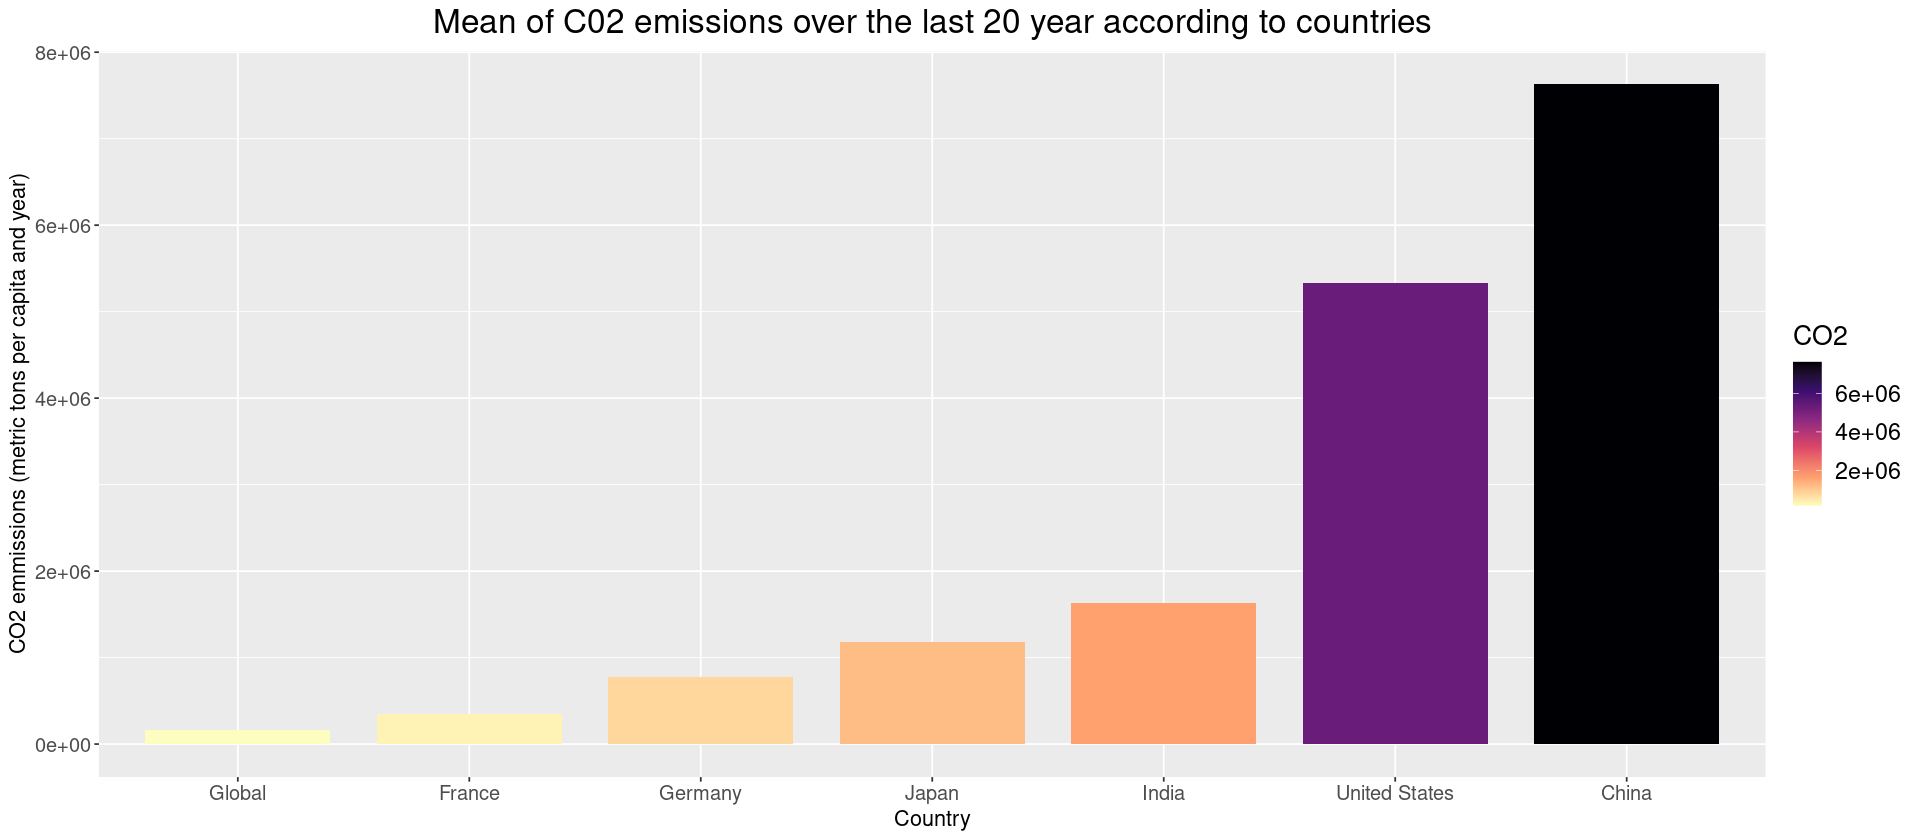

In [6]:
options(repr.plot.width = 16)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Country <- energy$Entity
df_mean <- summarise(group_by(df, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
df <- data.frame(Country = Country, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
top_5 <- head(df, 5)
last_5 <- tail(df,5)
moyenne <- mean(df$CO2)
mean <- data.frame("Country" = "Global", "CO2" = moyenne)
df <- rbind(top_5, fr)
df <- rbind(df,mean)
#df <- rbind(df,last_5)
ggplot(df, aes(x=reorder(Country, CO2), y=CO2, fill=CO2)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  labs(title = "Mean of C02 emissions over the last 20 year according to countries", x = "Country", y = "CO2 emmissions (metric tons per capita and year)") +
  theme(plot.title = element_text(size = 20, hjust = 0.5), 
        axis.text.y = element_text(size = 12),
        axis.title.y = element_text(size = 13),
        axis.text.x = element_text(size = 12),
       axis.title.x = element_text(size = 13),
       legend.text = element_text(size = 14),  # Ajuster la taille du texte de la légende
       legend.title = element_text(size = 16),  # Ajuster la taille du titre de la légende
       legend.position = "right") + 
       scale_fill_viridis_c(option = "A", direction = -1)

Le chargement a nécessité le package : viridisLite


Attachement du package : ‘viridis’


L'objet suivant est masqué depuis ‘package:maps’:

    unemp




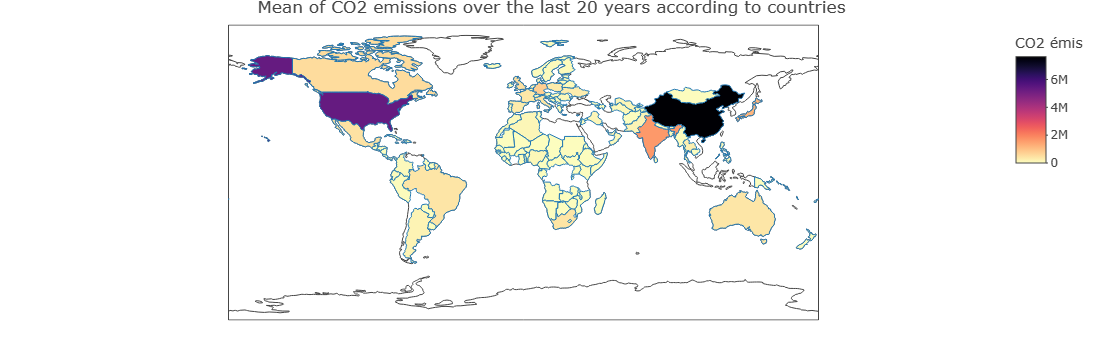

In [7]:
library(viridis)
options(repr.plot.width = 16)
dfa <- energy$Value_co2_emissions_kt_by_country
dfa <-  matrix(dfa, nrow = 2868)
dfa <- as.data.frame(dfa)
colnames(dfa) = list("CO2")
dfa$Country <- energy$Entity
df_mean <- summarise(group_by(dfa, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
dfa <- data.frame(Country = Country, CO2 = CO2)
plot_ly(data = dfa, type = "choropleth", locations = ~Country, locationmode = "country names", z = ~CO2, text = ~paste("Pays: ", Country, "<br>CO2 emissions (metric tons per year): ", CO2),colors = viridis(100, direction = -1, option ="A")) %>%
  colorbar(title = "CO2 émis",colors = viridis(100, direction = -1, option ="A")) %>%
  layout(title = "Mean of CO2 emissions over the last 20 years according to countries")

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidt

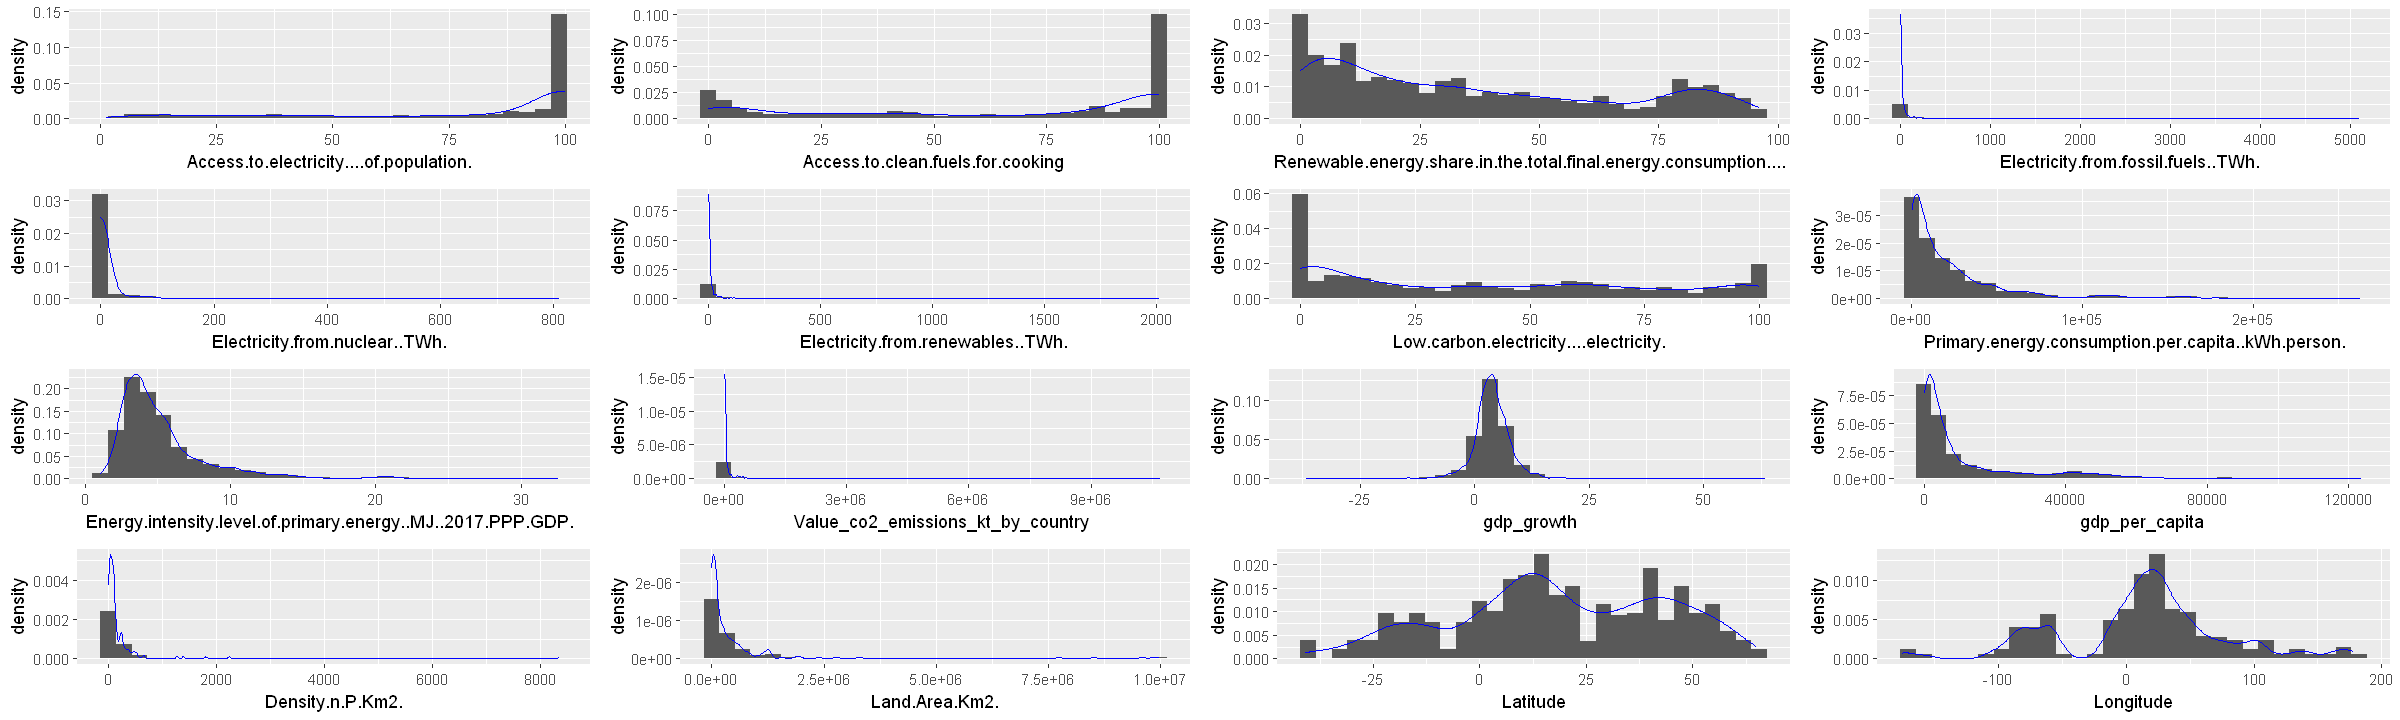

In [79]:
## que des variables quantitatives mis à part Entity et Year
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

In [80]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- log(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."]) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

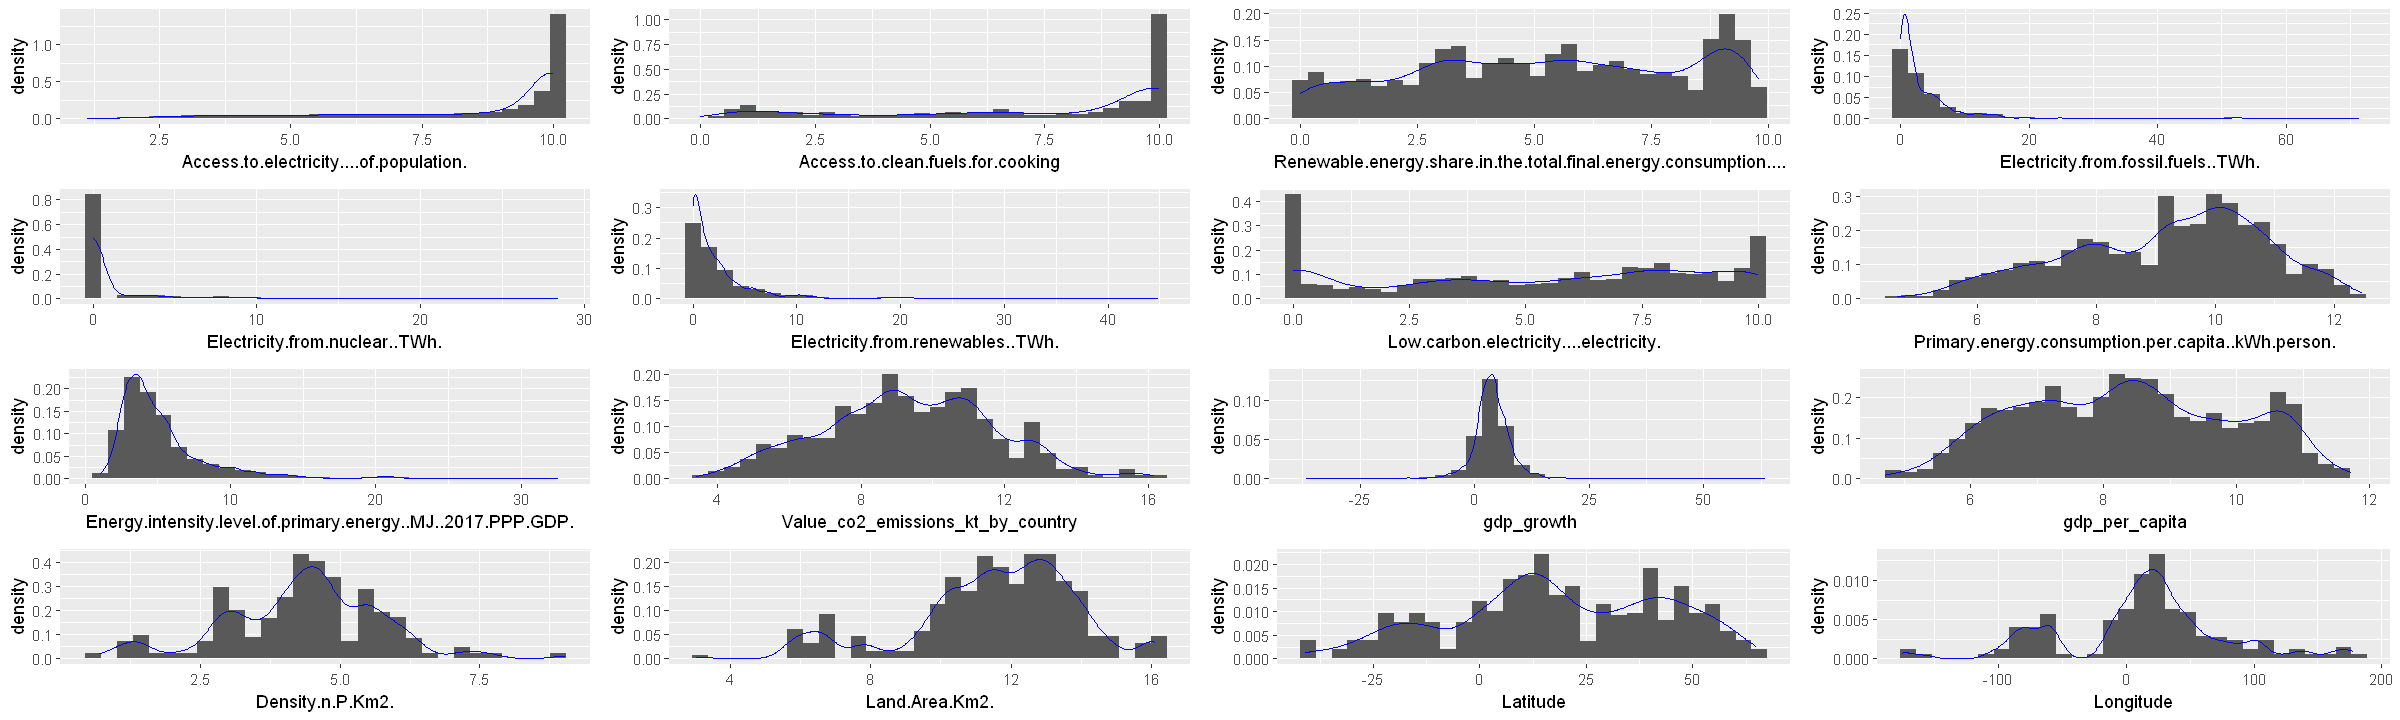

In [81]:
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

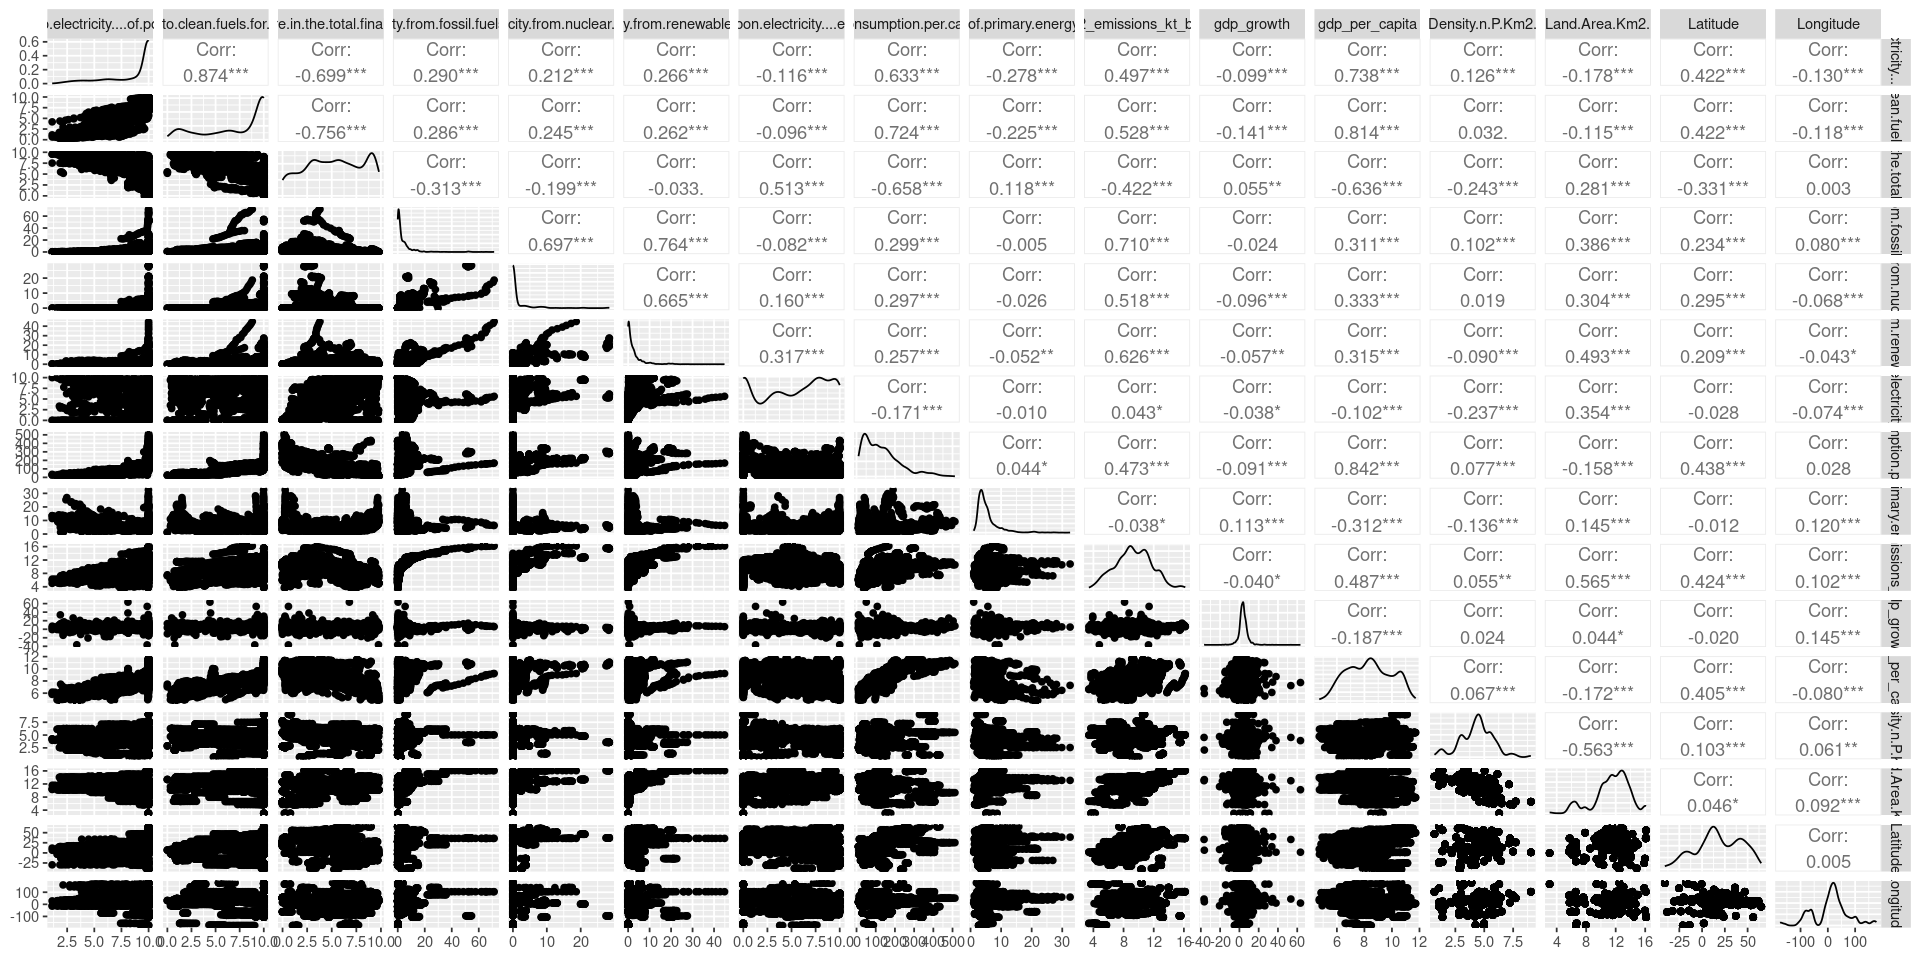

In [53]:
ggpairs(energy[, c(3:18)])

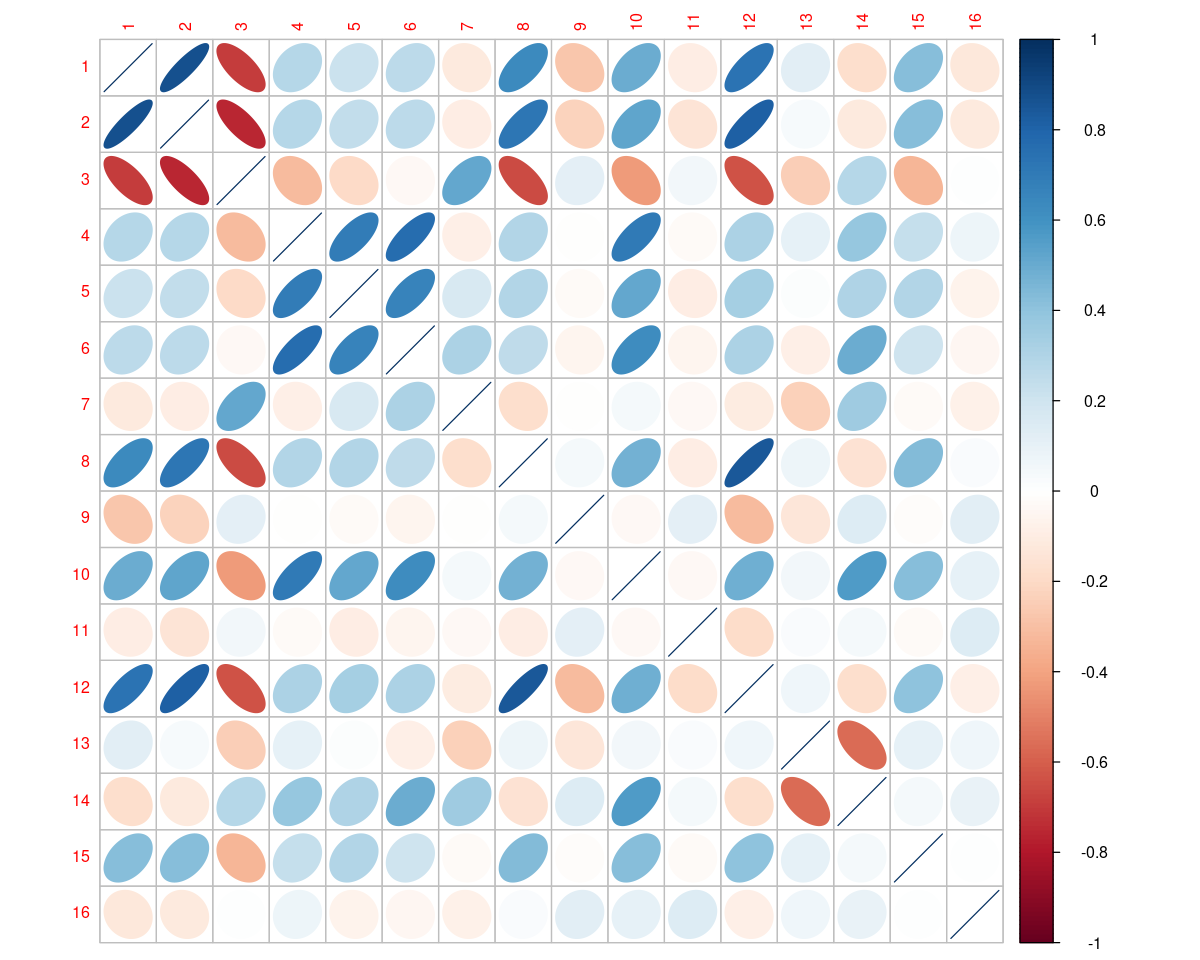

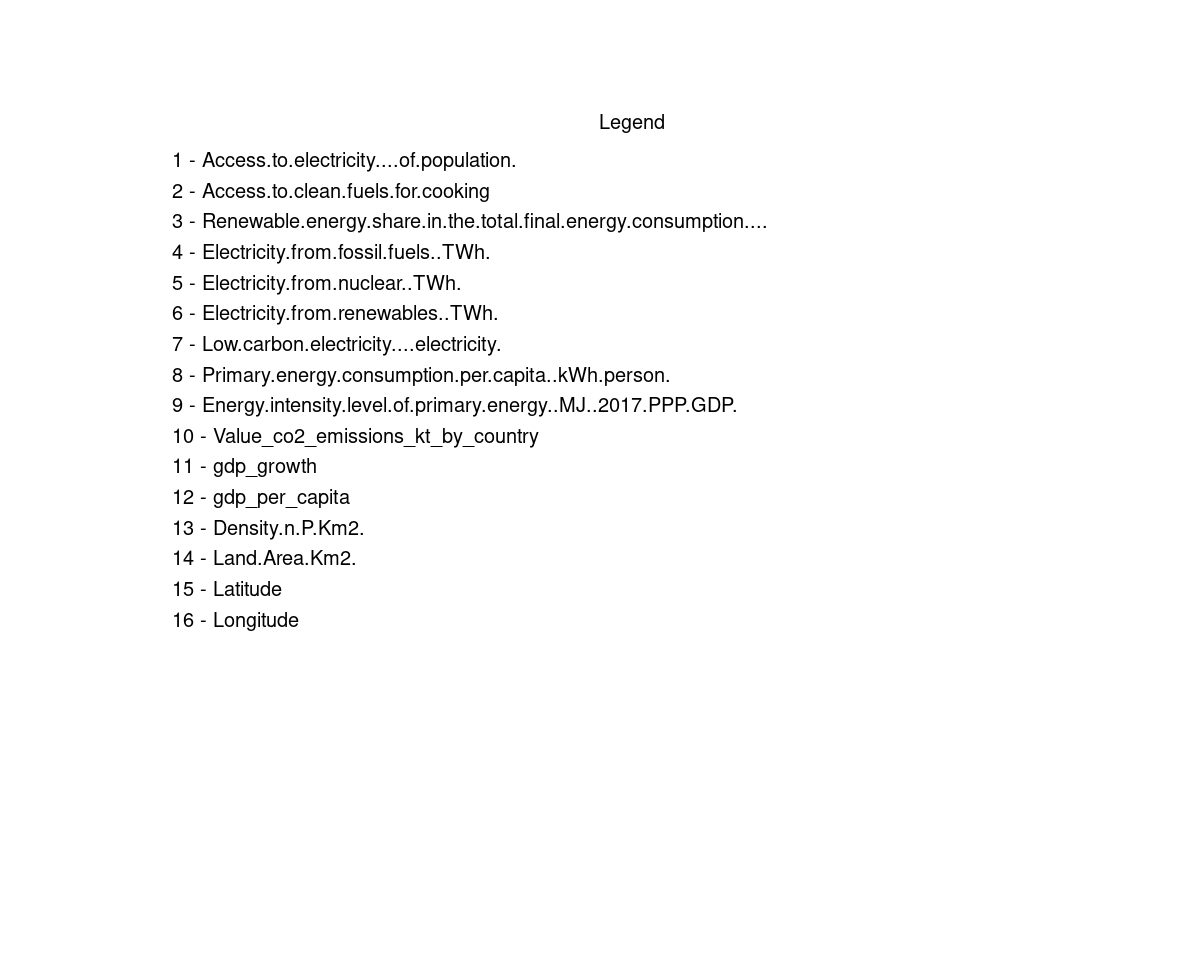

In [18]:
library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 8)
energy2 <- energy
original_names <- colnames(energy2)[3:18]
# Renommer les colonnes
colnames(energy2)[3:18] <- 1:16

# Matrice de corrélation
cor_matrix <- cor(energy2[, c(3:18)])

# Afficher le corrplot avec une taille de police plus grande pour les noms de variables
corrplot(cor_matrix, method = "ellipse", tl.cex = 0.8)

# Légende pour montrer la correspondance entre les numéros et les noms originaux des variables
plot.new()
legend_names <- c(paste(1:16, " - ",original_names, sep = ""))
legend("topright", legend = legend_names, title = "Legend", cex = 1, bty = "n", col = "black")

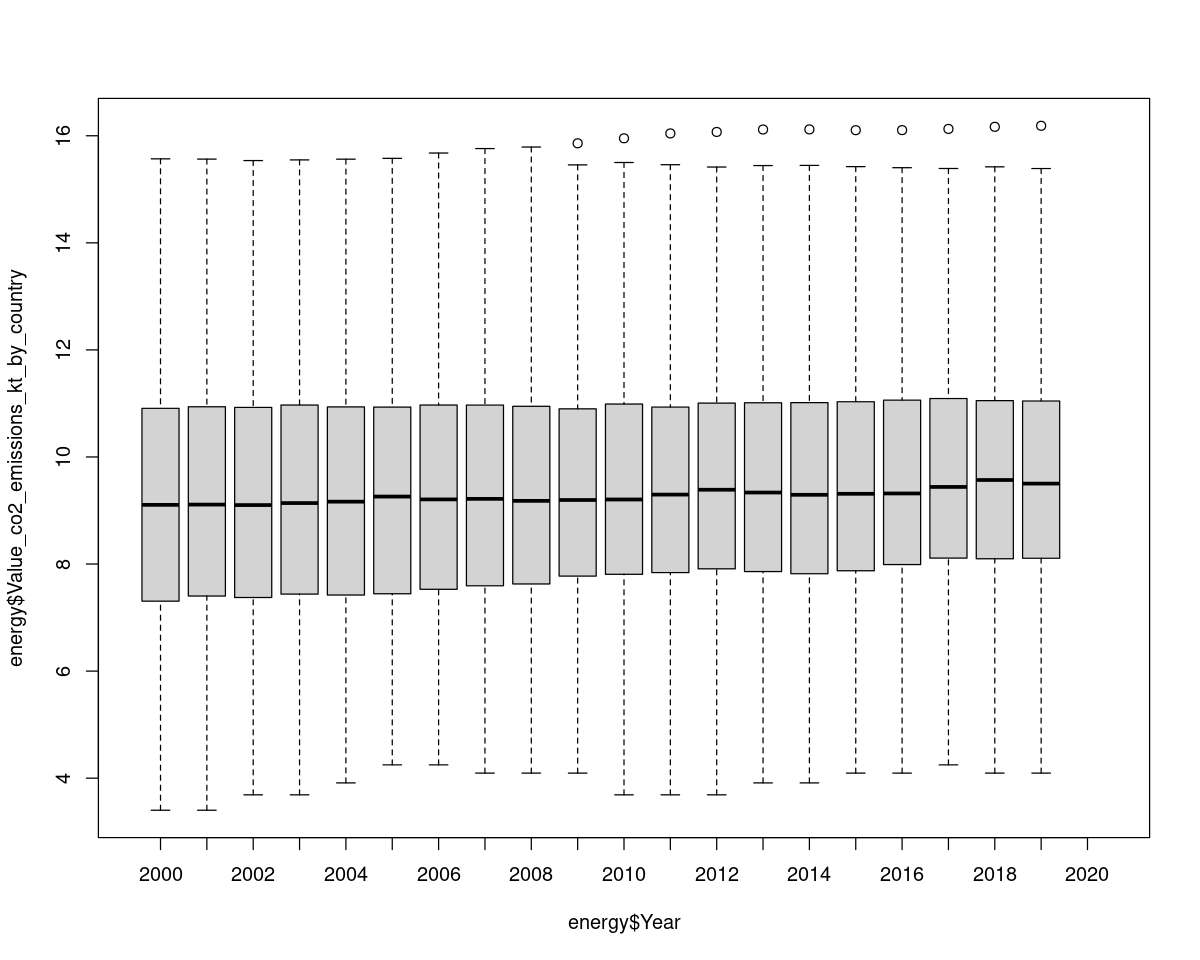

In [19]:
boxplot(energy$Value_co2_emissions_kt_by_country ~ energy$Year, data=energy)

In [82]:
library(forcats)
energy$Entity <- as.factor(energy$Entity)
#energy$Entity <- fct_collapse(energy$Entity, "PIB ++" = c("Australia","Canada","China","Denmark","Finland","France","Germany","Iceland","Ireland","India","Italy","Japan",
                                                      #    "Luxembourg","Netherlands","Norway","Qatar","Singapore","Spain","Sweden","Switzerland","United Arab Emirates",
                                                       #   "United Kingdom","United States","Cyprus"), "PIB +" = c("Algeria","Argentina","Austria","Belgium","Brazil","Cameroon","Colombia",
                           #   "Croatia","Ecuador","Estonia","Greece","Hungary","Israel","Malta","Mexico","Morocco","New Zealand","Nigeria","Oman","Peru","Philippines","Poland","Portugal",
                            #  "Romania","Serbia","Seychelles","Thailand","Slovenia","South Africa","Tunisia","Ukraine","Uruguay"), "PIB -" = c("Armenia","Angola","Antigua and Barbuda","Azerbaijan","Bahrain",
                                                                                                                                           #    "Barbados","Belarus","Belize","Benin","Bhutan","Bosnia and Herzegovina",
                                                                                                                                           #   "Botswana","Cambodia",
                                                                                                                                           #   "Costa Rica","Cuba","Dominica","Dominican Republic","El Salvador","Equatorial Guinea",
                                                                                                                                            #  "Eswatini","Fiji","Gabon","Georgia","Ghana","Grenada","Guatemala","Guinea",
                                                                                                                                            #  "Guinea-Bissau","Guyana","Honduras","Iraq","Jamaica","Jordan","Kenya","Kuwait","Latvia","Lithuania","Maldives","Mauritius","Mongolia","Montenegro",
                                                                                                                                            #  "Namibia","Nauru","Nicaragua","North Macedonia","Pakistan","Panama","Papua New Guinea","Paraguay","Samoa",
                                                                                                                                            #  "Sri Lanka","Suriname","Tajikistan","Tonga","Trinidad and Tobago","Turkmenistan","Uzbekistan","Zimbabwe"),
                            # "PIB --" = c("Afghanistan","Bangladesh","Burkina Faso","Burundi","Central African Republic","Comoros","Chad","Djibouti","Eritrea","Ethiopia","Haiti","Kiribati","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Myanmar","Nepal","Niger","Rwanda","Sao Tome and Principe",
                                         # "Senegal","Sierra Leone","Solomon Islands","Somalia","South Sudan","Sudan","Togo","Uganda","Vanuatu","Zambia"))
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Entity <- energy$Entity
df_mean <- summarise(group_by(df, Entity), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Entity <- df_mean$Entity
df <- data.frame(Entity = Entity, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
intervals <- c(0, 8, 10, 12, 14, 16)
labels <- c("--", "-", "=", "+", "++")
df$u <- cut(df$CO2, breaks = intervals, labels = labels, include.lowest = TRUE)
# Créer un dataframe avec les correspondances entre les pays et les modalités
modalites <- data.frame(Entity = df$Entity, Type = df$u)
# Joindre les deux dataframes en fonction du nom du pays
energy <- merge(energy, modalites, by = "Entity", all.x = TRUE)
# Afficher les premières lignes du dataframe pour vérifier
head(energy)
energy$Period <- fct_collapse(energy$Year, "2000-2004" = c("2000","2001","2002","2003","2004"), "2005-2009" = c("2005","2006","2007","2008","2009"),
                            "2010-2014" = c("2010","2011","2012","2013","2014"), "2015-2020" = c("2015","2016","2017","2018","2019","2020"))             

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2003 3.839076                               
2 Afghanistan 2004 4.479394                               
3 Afghanistan 2005 5.038938                               
4 Afghanistan 2006 5.542444                               
5 Afghanistan 2007 6.004249                               
6 Afghanistan 2008 6.511528                               
  Access.to.clean.fuels.for.cooking
1 3.082207                         
2 3.301515                         
3 3.492850                         
4 3.721559                         
5 3.911521                         
6 4.086563                         
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 6.054750                                                        
2 6.651316                                                        
3 5.820653                                                        
4 5.647123                                                        
5 5.364699                                                        
6 4.601087                                                        
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.5567764                           0                             
2 0.5744563                           0                             
3 0.5830952                           0                             
4 0.4472136                           0                             
5 0.4472136                           0                             
6 0.4358899                           0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.7937254                         8.186653                              
2 0.7483315                         7.932298                              
3 0.7681146                         7.964977                              
4 0.8000000                         8.728716                              
5 0.8660254                         8.885233                              
6 0.7348469                         8.600733                              
  Primary.energy.consumption.per.capita..kWh.person.
1 5.437941                                          
2 5.319253                                          
3 5.529703                                          
4 5.718411                                          
5 5.870087                                          
6 6.409901                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.40                                                       
2 1.20                                                       
3 1.41                                                       
4 1.50                                                       
5 1.53                                                       
6 1.94                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1 7.106606                           8.832278  5.250617       4.094345        
2 6.937314                           1.414118  5.353667       4.094345        
3 7.346010                          11.229715  5.489067       4.094345        
4 7.473069                           5.357403  5.574940       4.094345        
5 7.478735                          13.826320  5.885251       4.094345        
6 8.177516                           3.924984  5.898975       4.094345        
  Land.Area.Km2. Latitude Longitude Type
1 13.38815       33.93911 67.70995  -   
2 13.38815       33.93911 67.70995  -   
3 13.38815       33.93911 67.70995  -   
4 13.38815       33.93911 67.70995  -   
5 13.38815       33.93911 67.70995  -   
6 13.38815       33.93911 67.70995  -

In [83]:
energy$Type <- factor(energy$Type, levels = c("=","--","-","+","++"))

In [84]:
#energy$Entity <- as.factor(energy$Entity)
#energy$Year <- as.factor(energy$Year)
str(energy)

'data.frame':	2868 obs. of  20 variables:
 $ Entity                                                          : Factor w/ 148 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.04 5.54 6 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.49 3.72 3.91 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.82 5.65 5.36 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.557 0.574 0.583 0.447 0.447 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.768 0.8 0.866 ...
 $ Low.carbon.electricity....electricity.                          : num  

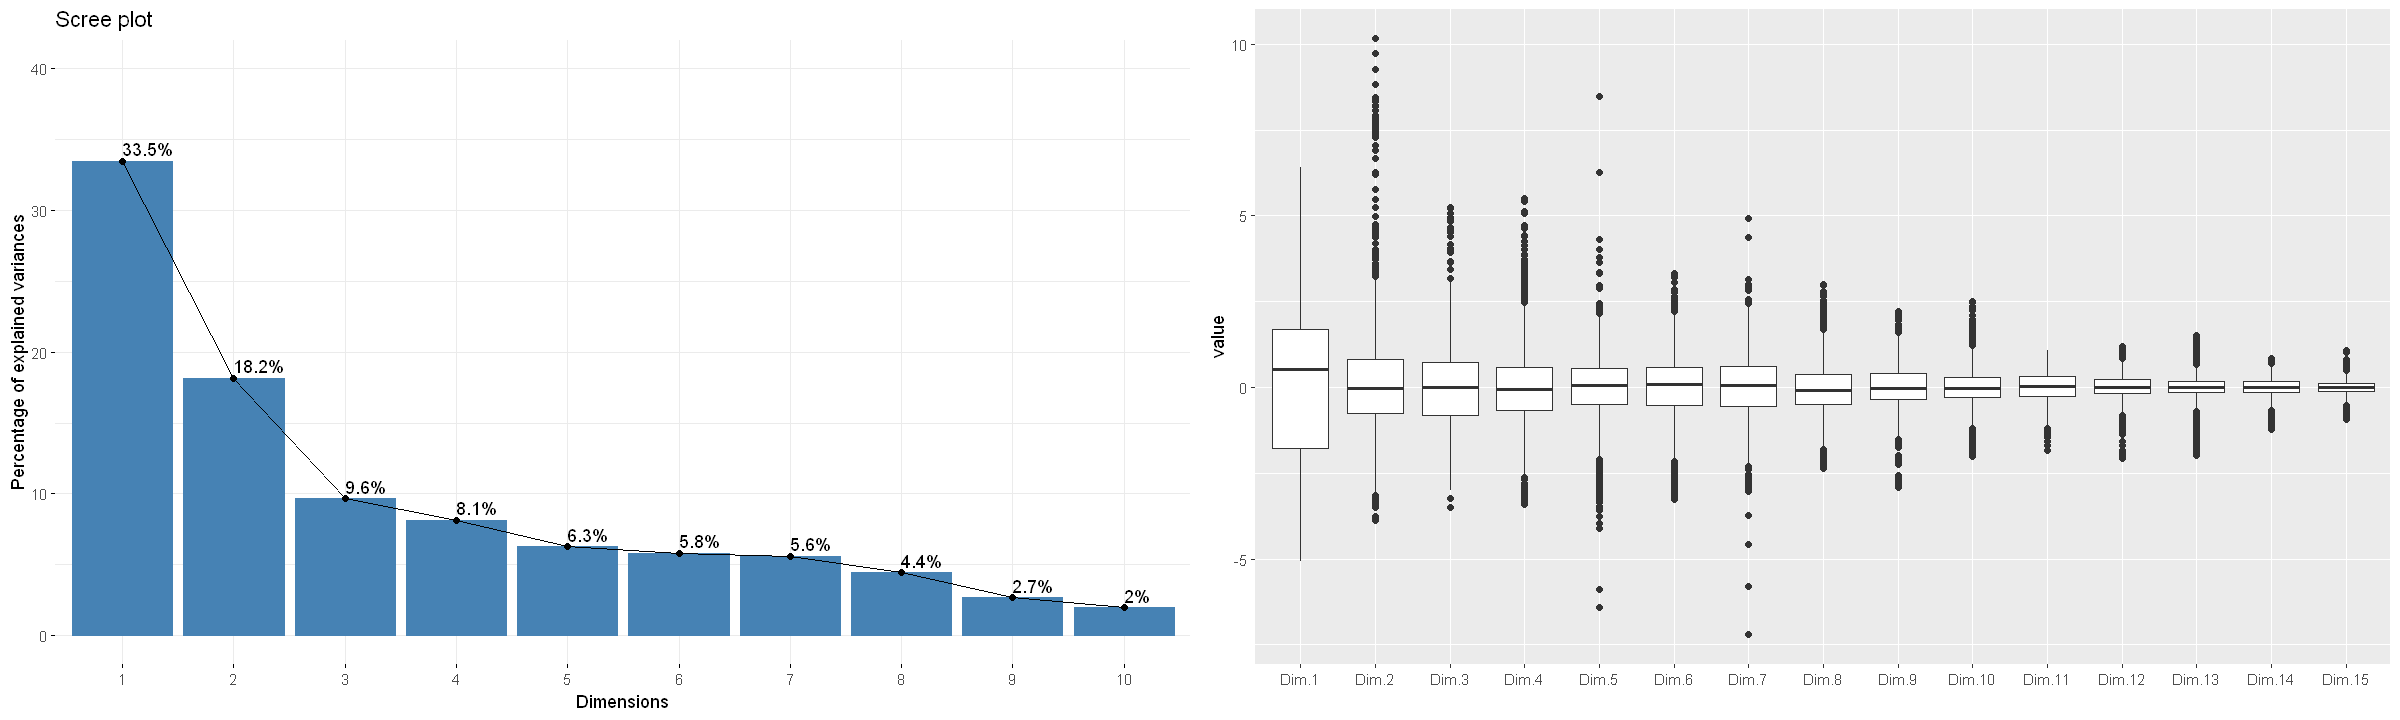

In [85]:
library(FactoMineR)
acp <- PCA(energy, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(1,2,19,20), quanti.sup = 12, ncp = 15)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

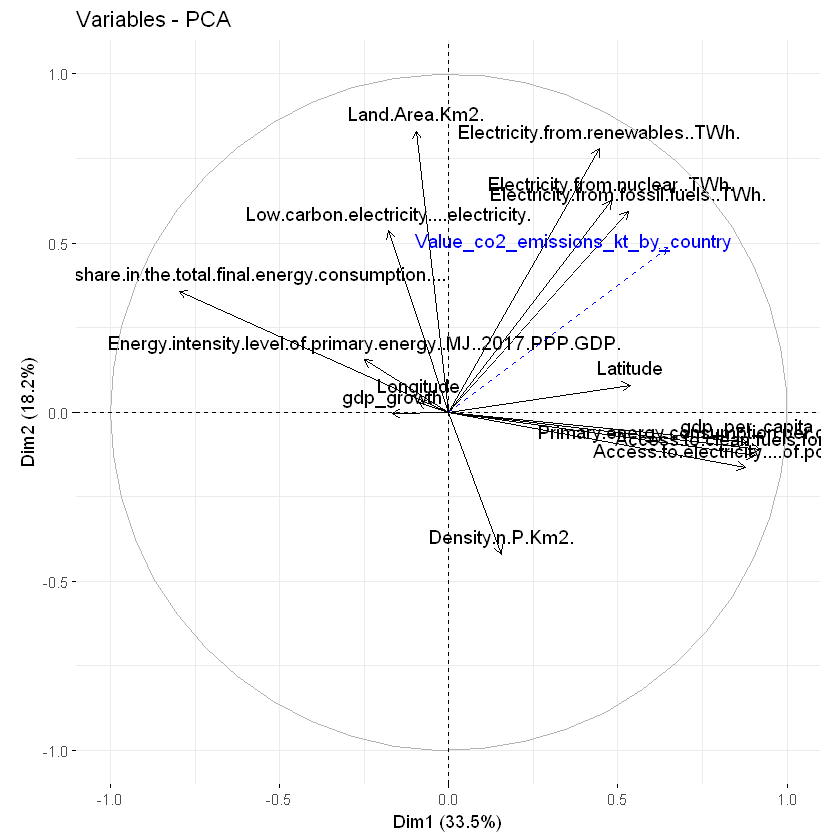

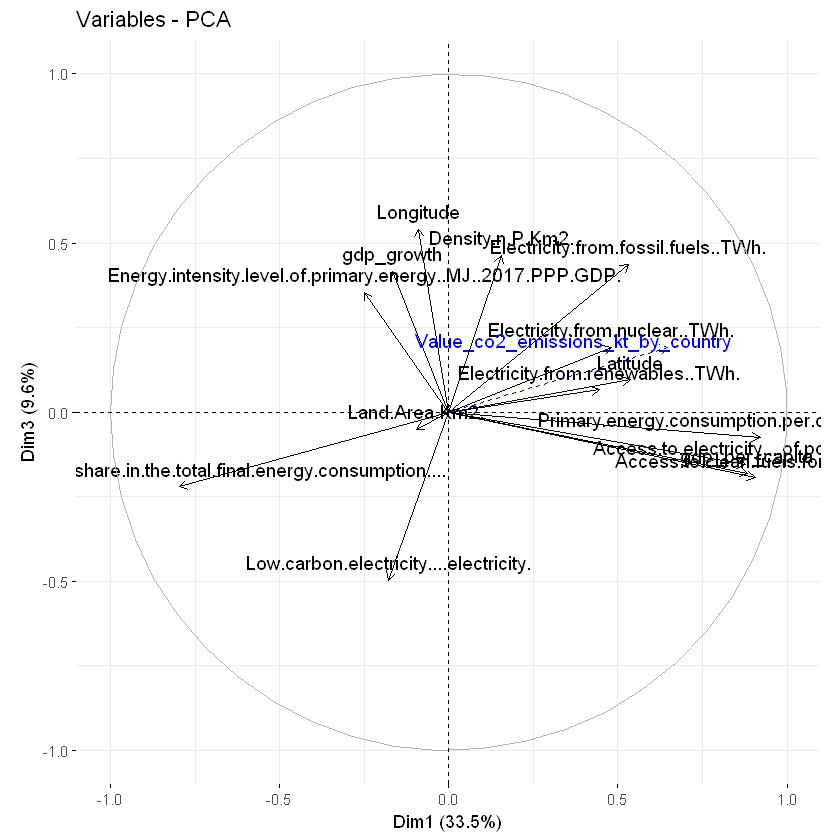

In [68]:
fviz_pca_var(acp)
fviz_pca_var(acp,axes=c(1,3))

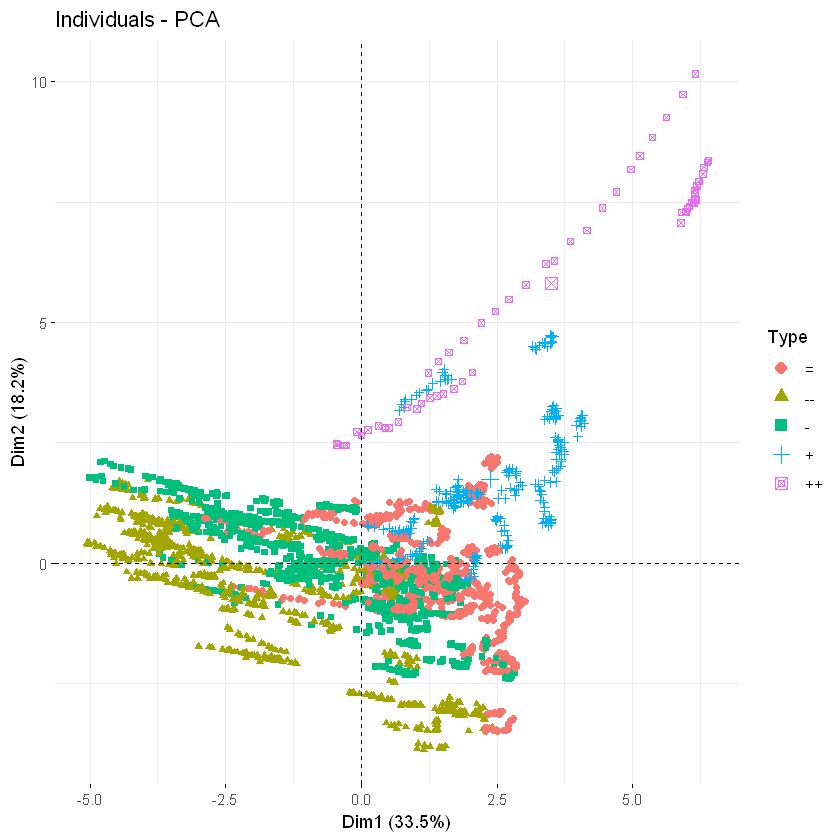

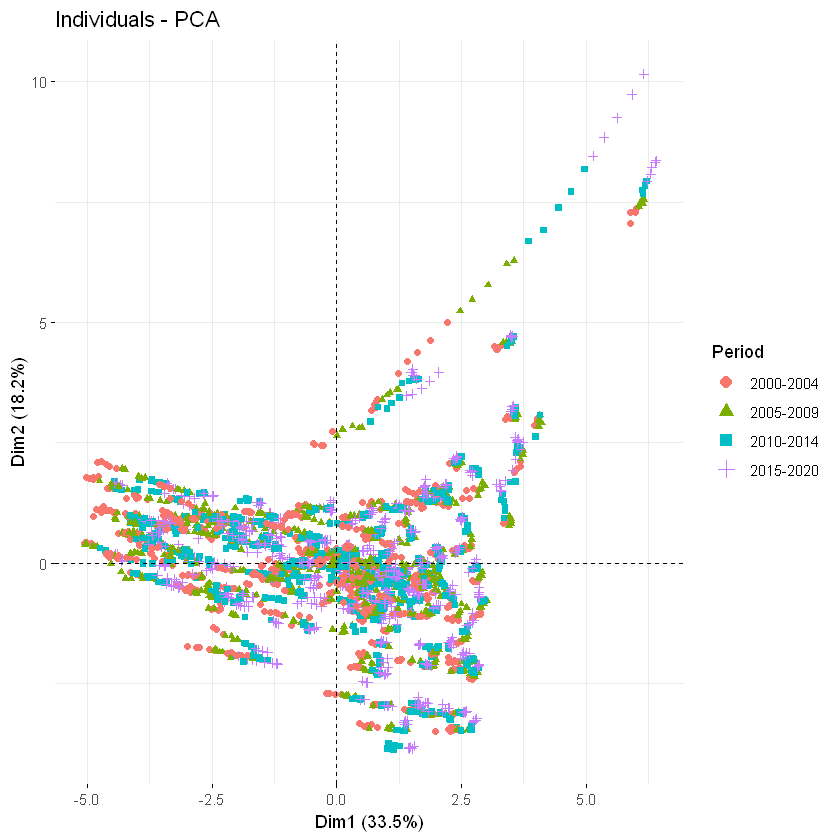

In [69]:
fviz_pca_ind(acp, label="none", habillage=19)
fviz_pca_ind(acp, label="none", habillage=20)

In [86]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(energy) # nombre de lignes dans les données
nvar <- ncol(energy) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 
### pour CO2 emissions
datappr <- energy[appri, -c(6)] 
# construction de l'échantillon test
datestr <- energy[testi, -c(6)] 
# vérification
str(datappr)
str(datestr)

'data.frame':	2294 obs. of  19 variables:
 $ Entity                                                          : Factor w/ 148 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 8 9 10 11 12 14 15 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.04 6 6.51 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.49 3.91 4.09 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.82 5.36 4.6 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.768 0.866 0.735 ...
 $ Low.carbon.electricity....electricity.                          : num  8.19 7.93 7.96 8.89 8.6 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.44

In [87]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 20)+ylim(-1.1, 1.1)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [74]:
### régression linéaire sans sélection de variable
reg.lm <- lm(Value_co2_emissions_kt_by_country ~ . - Entity - Year , data = datappr)
summary(reg.lm)
anova(reg.lm,test="F")


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ . - Entity - 
    Year, data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04343 -0.17052  0.00977  0.19584  1.65008 

Coefficients:
                                                                   Estimate
(Intercept)                                                      -1.172e+01
Access.to.electricity....of.population.                           1.234e-01
Access.to.clean.fuels.for.cooking                                -5.655e-03
Renewable.energy.share.in.the.total.final.energy.consumption.... -6.910e-02
Electricity.from.nuclear..TWh.                                   -1.075e-02
Electricity.from.renewables..TWh.                                -2.228e-02
Low.carbon.electricity....electricity.                           -3.226e-02
Primary.energy.consumption.per.capita..kWh.person.                4.315e-01
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       1.225e-02
gdp_growth               

Df  
Access.to.electricity....of.population.                             1
Access.to.clean.fuels.for.cooking                                   1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.nuclear..TWh.                                      1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1
gdp_growth                                                          1
gdp_per_capita                                                      1
Density.n.P.Km2.                                                    1
Land.Area.Km2.                                                      1
Latitude                                                            1
Longitude                                                           1
Type                                                                4
Period                                                              3
Residuals                                                        2272
                                                                 Sum Sq      
Access.to.electricity....of.population.                          3162.7408271
Access.to.clean.fuels.for.cooking                                 422.6204740
Renewable.energy.share.in.the.total.final.energy.consumption....    7.4402402
Electricity.from.nuclear..TWh.                                   2117.2212809
Electricity.from.renewables..TWh.                                1602.4771610
Low.carbon.electricity....electricity.                              1.4473248
Primary.energy.consumption.per.capita..kWh.person.                  6.0194802
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        56.9939983
gdp_growth                                                         11.1969087
gdp_per_capita                                                      0.6902619
Density.n.P.Km2.                                                   23.6465210
Land.Area.Km2.                                                   5296.3914140
Latitude                                                            2.9423416
Longitude                                                           0.8830105
Type                                                               31.7851424
Period                                                              2.6048739
Residuals                                                         223.8935645
                                                                 Mean Sq     
Access.to.electricity....of.population.                          3162.7408271
Access.to.clean.fuels.for.cooking                                 422.6204740
Renewable.energy.share.in.the.total.final.energy.consumption....    7.4402402
Electricity.from.nuclear..TWh.                                   2117.2212809
Electricity.from.renewables..TWh.                                1602.4771610
Low.carbon.electricity....electricity.                              1.4473248
Primary.energy.consumption.per.capita..kWh.person.                  6.0194802
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        56.9939983
gdp_growth                                                         11.1969087
gdp_per_capita                                                      0.6902619
Density.n.P.Km2.                                                   23.6465210
Land.Area.Km2.                                                   5296.3914140
Latitude                                                            2.9423416
Longitude                                                           0.8830105
Type                                                                7.9462856
Period                                                              0.8682913
Residuals                                                           0.09854

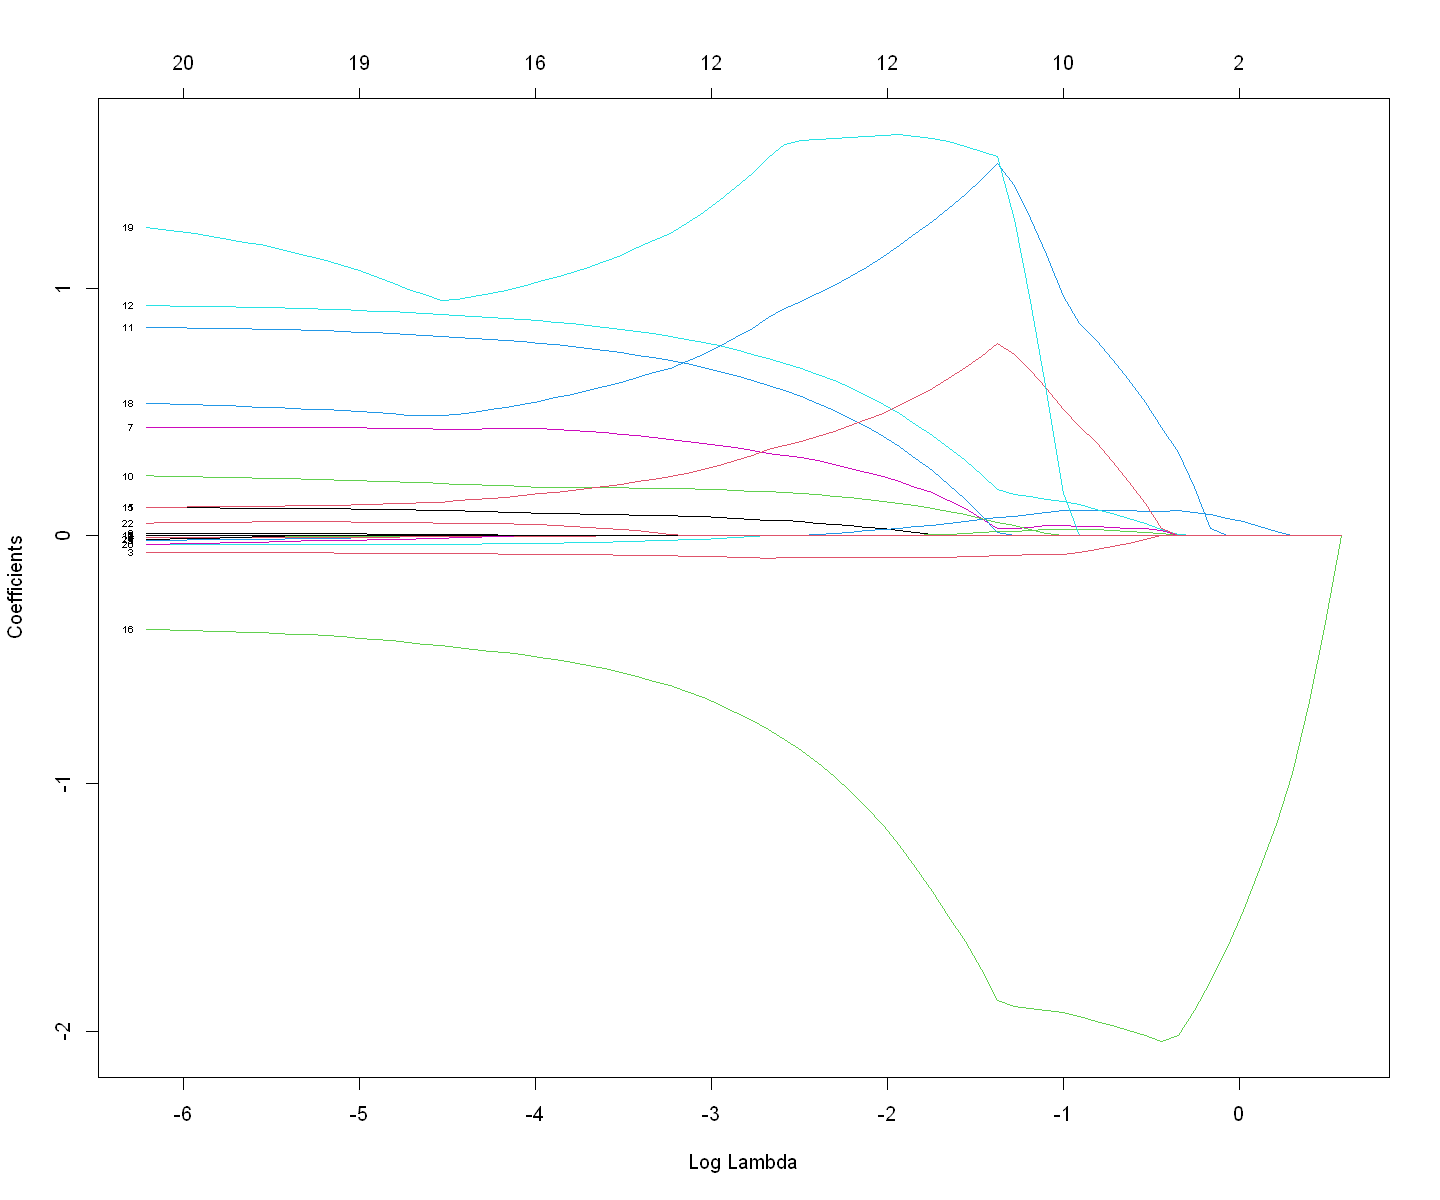

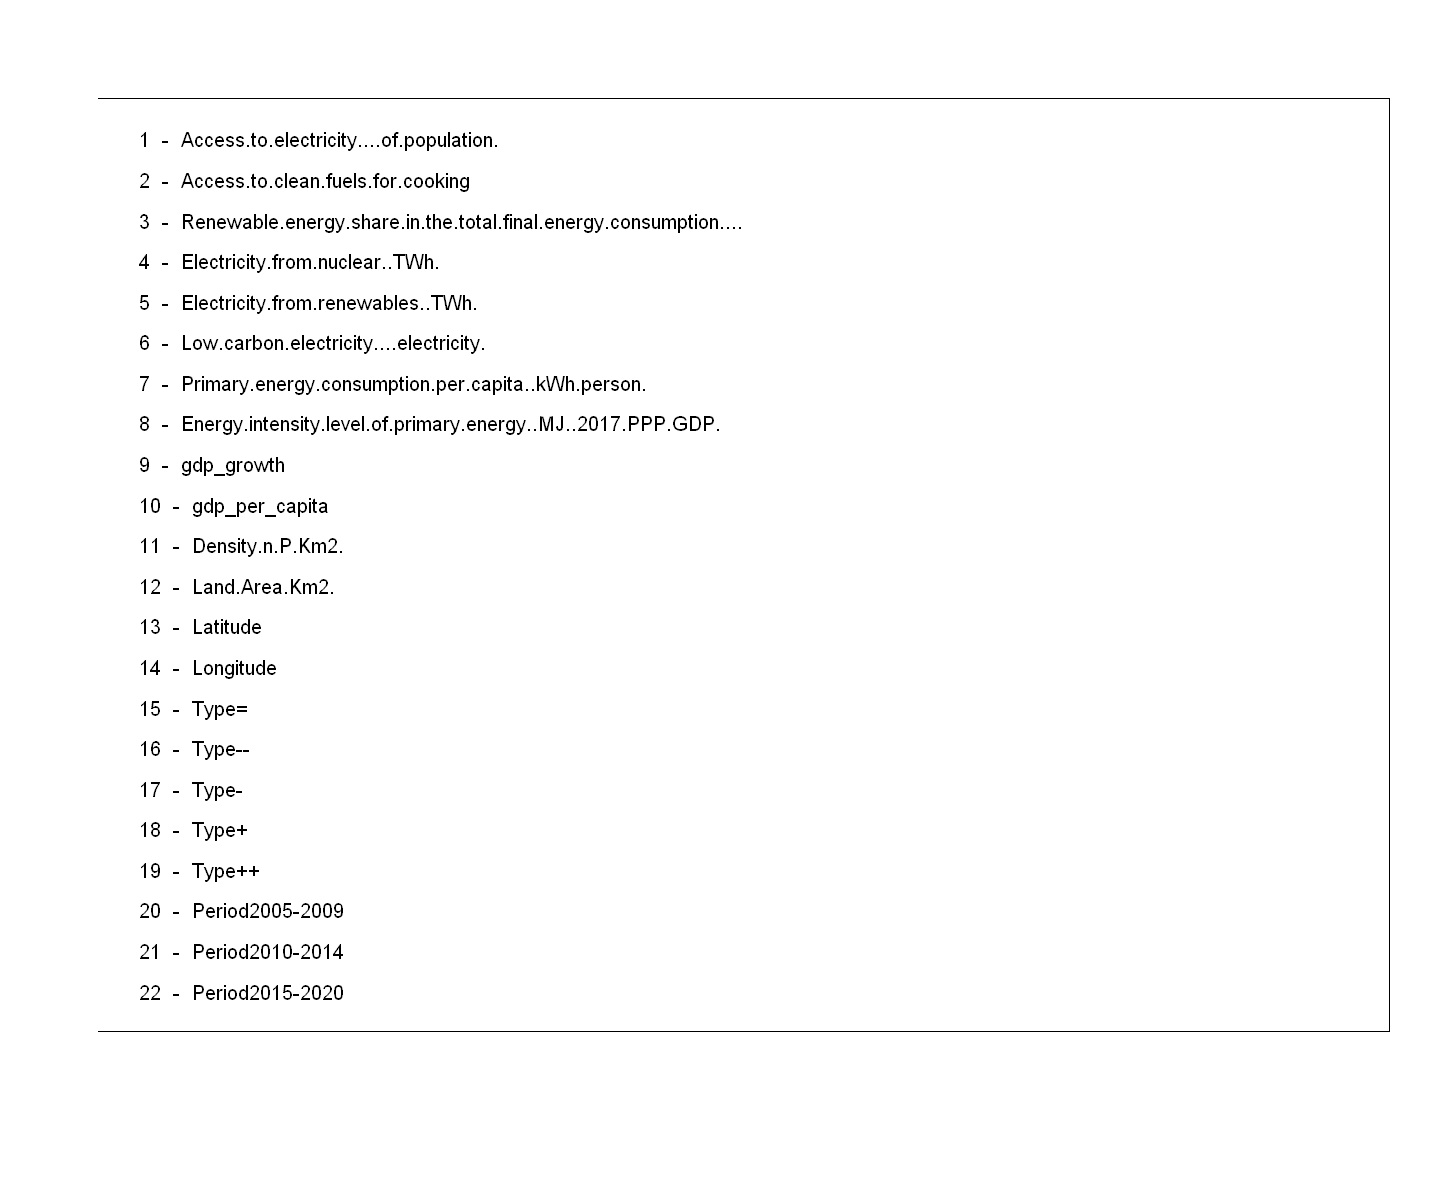

In [75]:
### Lasso
library(glmnet)
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1 - Entity - Year, data = datappr)
reg.lasso <- glmnet(y = datappr$Value_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)

plot.new()
legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

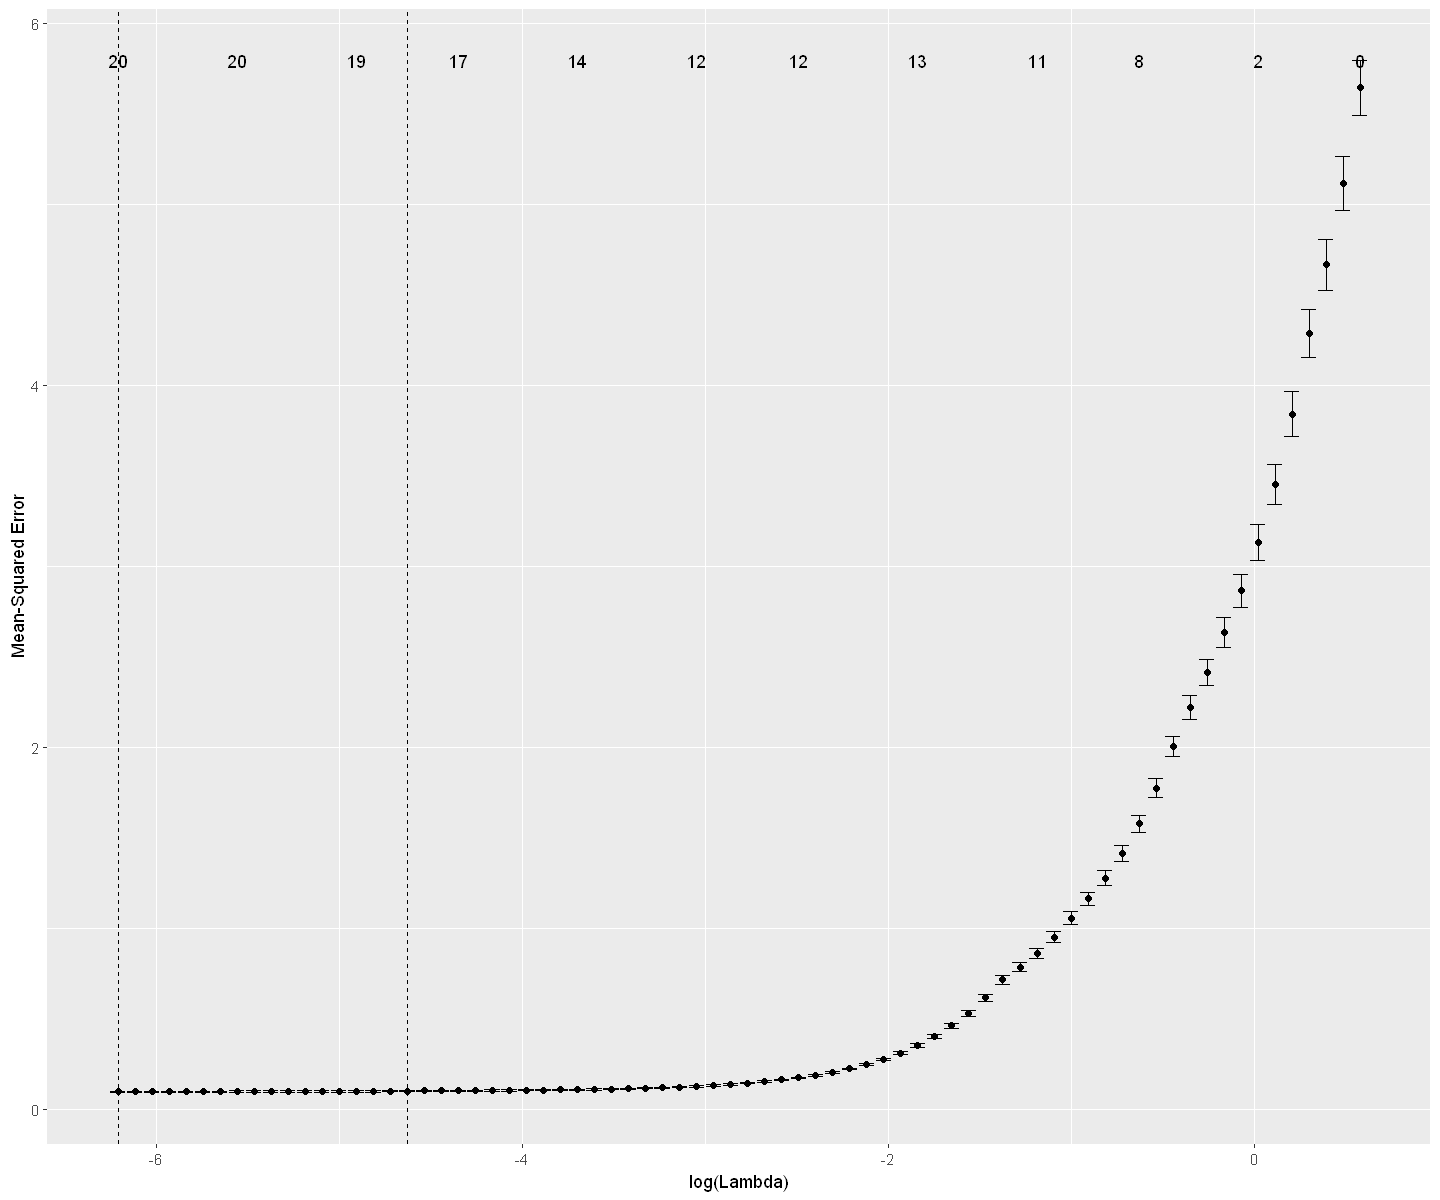

In [76]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 11], x = x.mat)
autoplot(reg.lasso.cv)

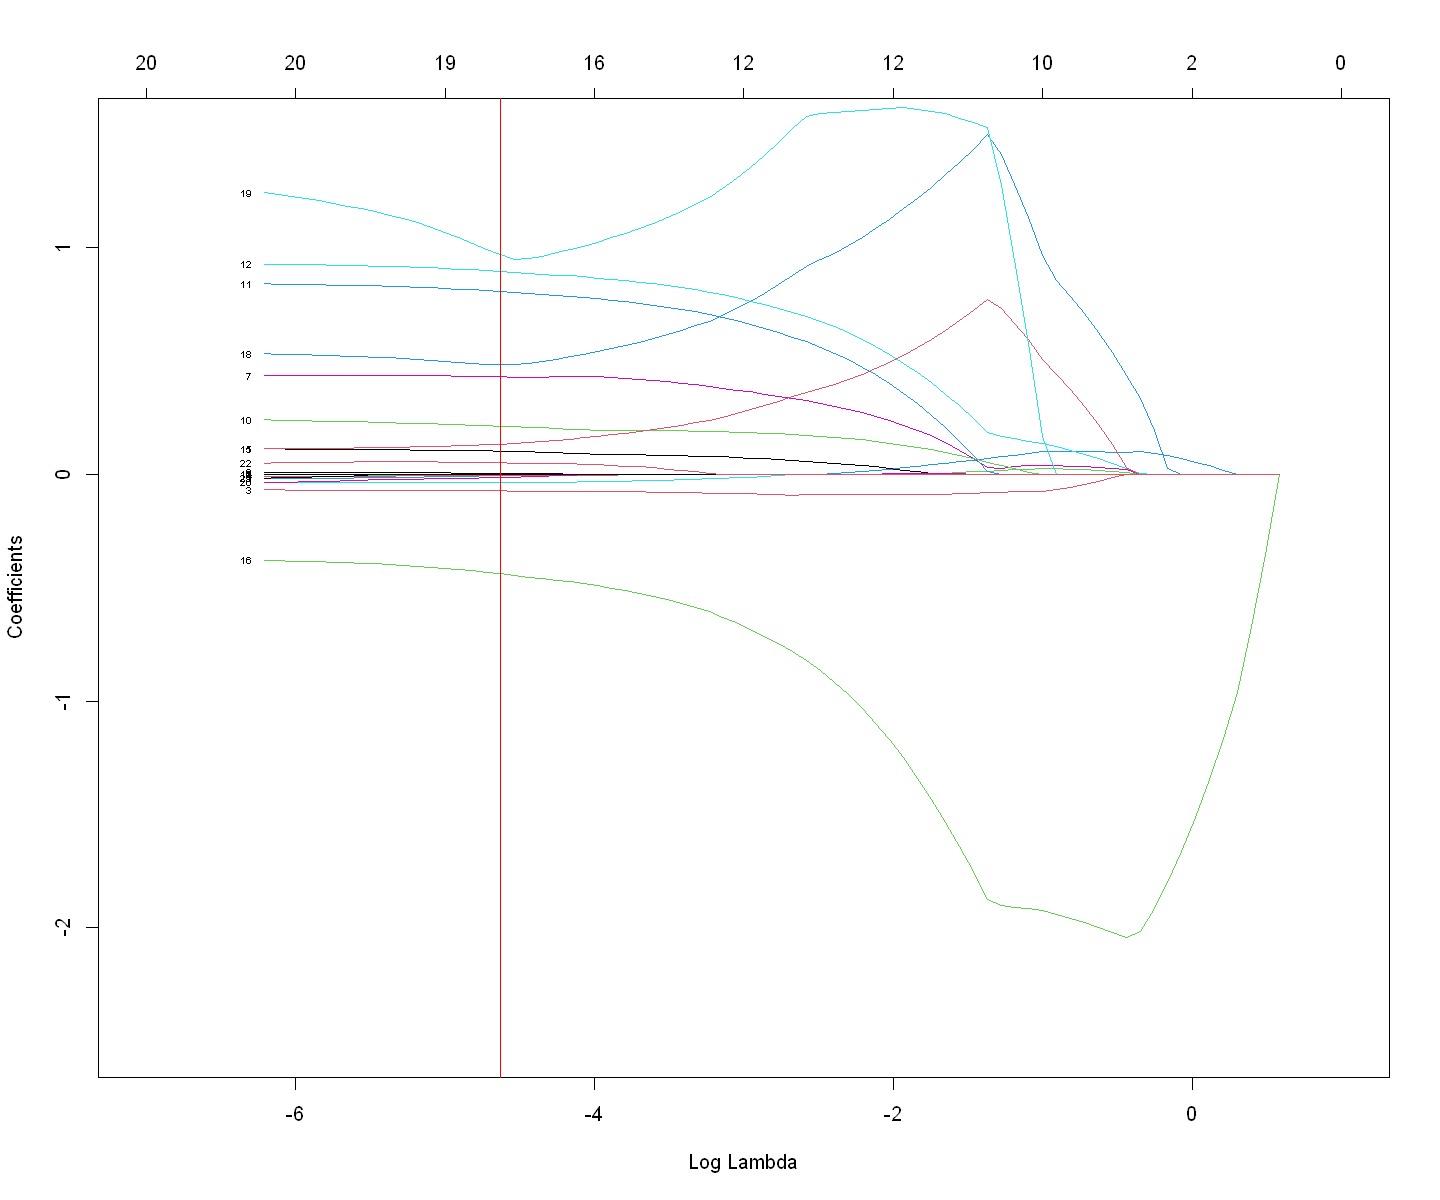

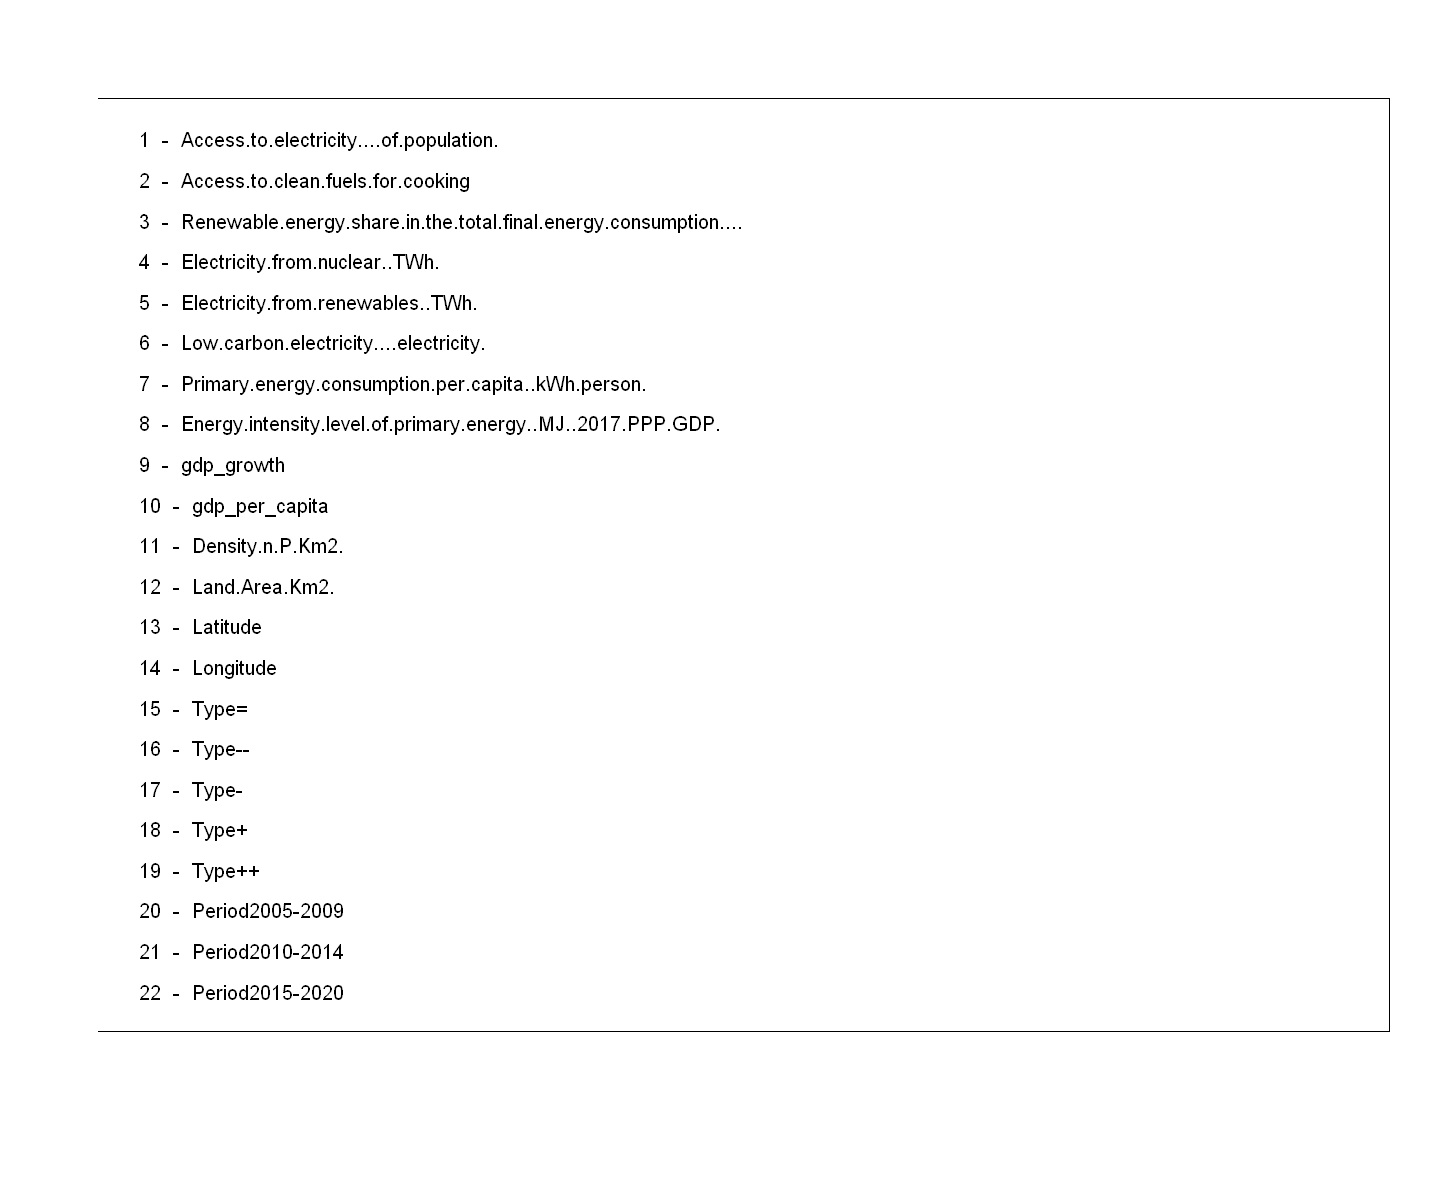

In [77]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,1),ylim=c(-2.5,1.5))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")
plot.new()
legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

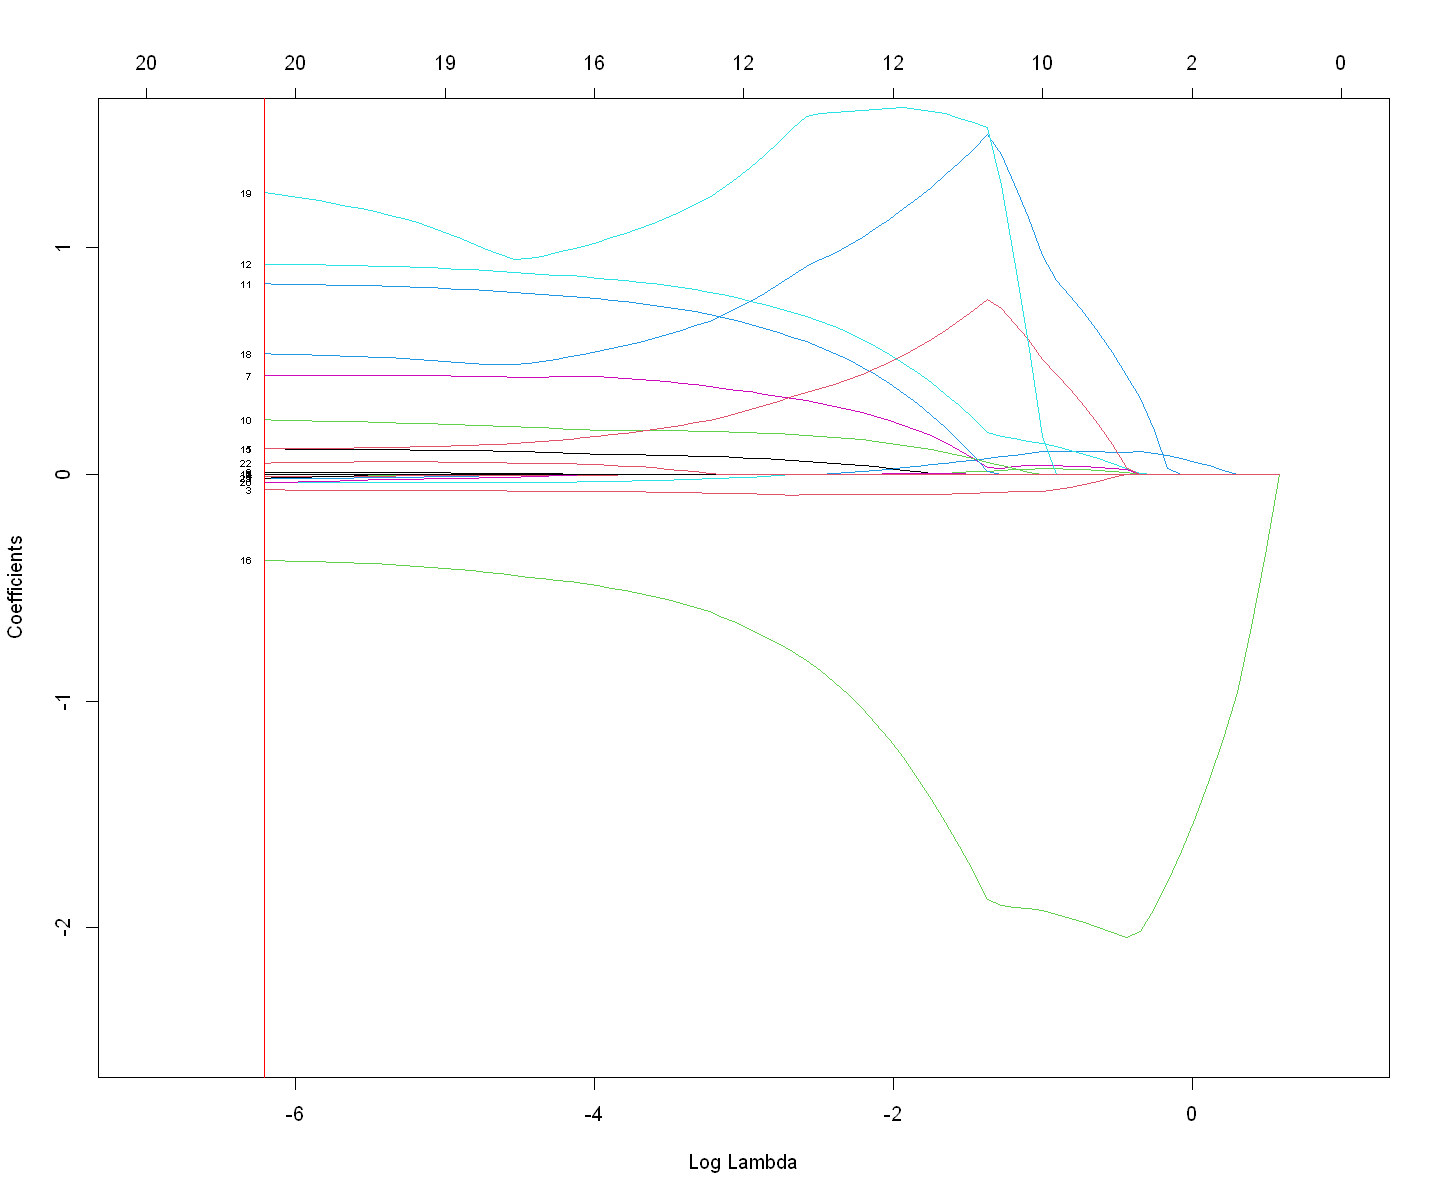

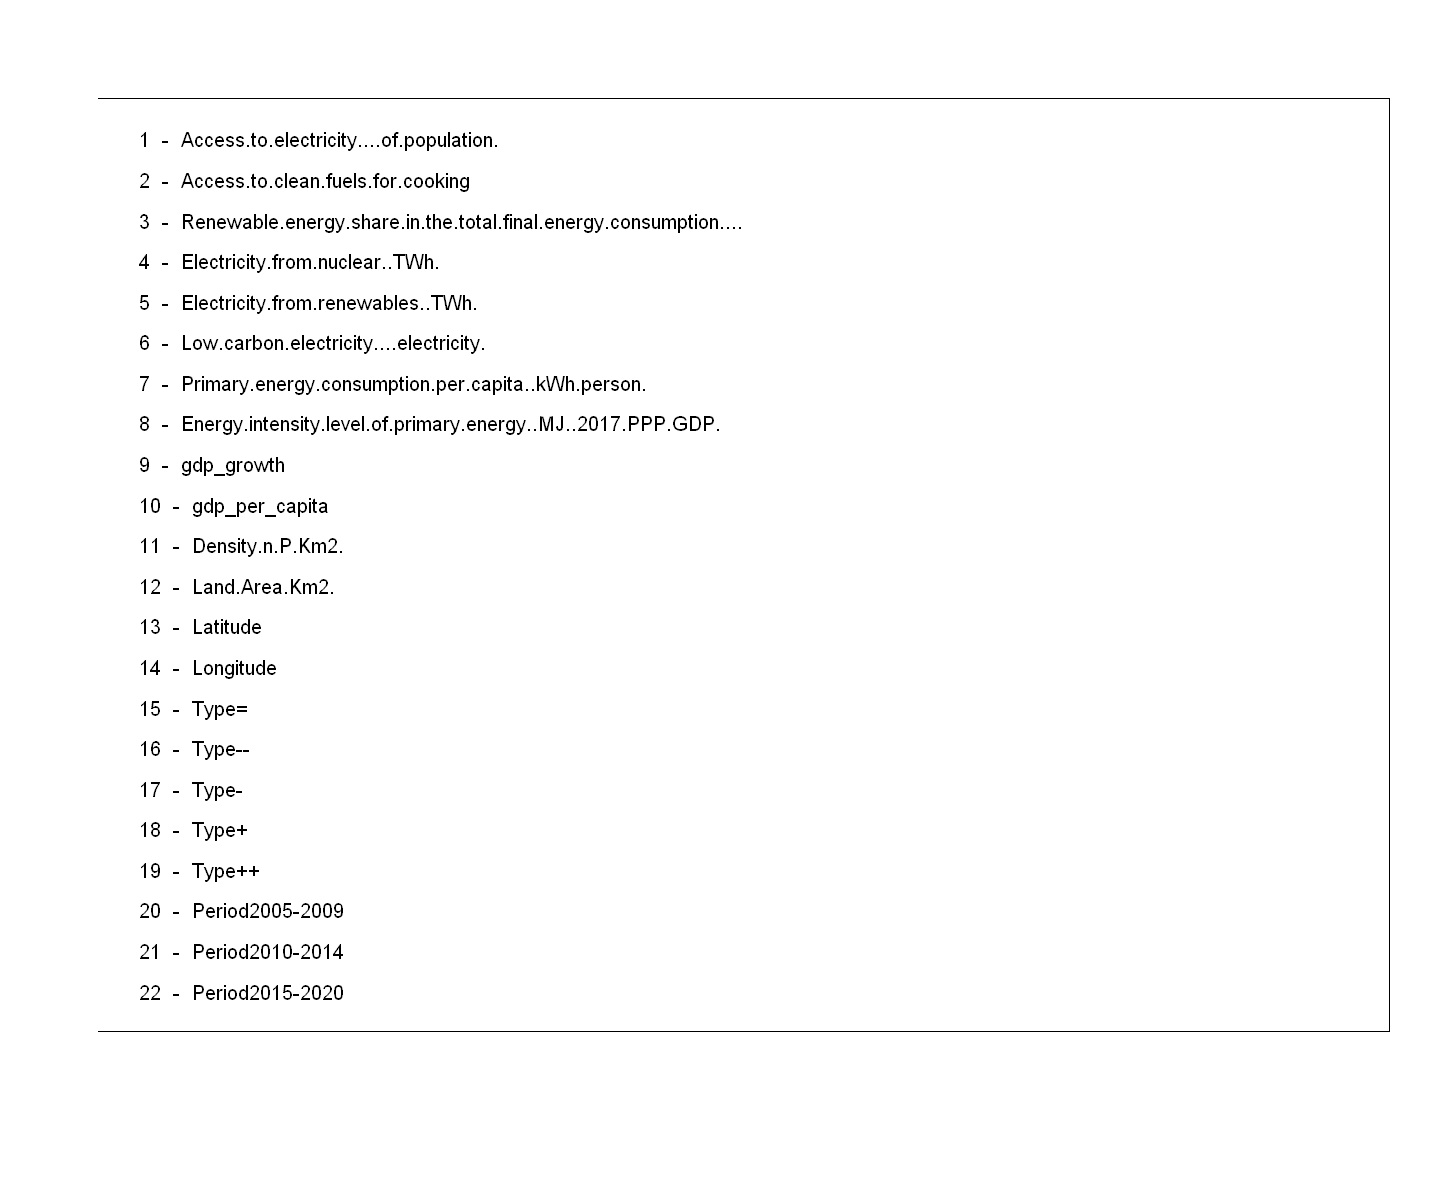

In [78]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,1),ylim=c(-2.5,1.5))
abline(v=log(reg.lasso.cv$lambda.min),col="red")
plot.new()
legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

In [79]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ 
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Value_co2_emissions_kt_by_country-predict(aov(Value_co2_emissions_kt_by_country ~ . - Entity - Year, data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 0.0998116


Call:  cv.glmnet(x = x.mat, y = datappr[, 11]) 

Measure: Mean-Squared Error 

      Lambda Index Measure       SE Nonzero
min 0.002008    74  0.1005 0.004002      20
1se 0.009764    57  0.1041 0.003830      18


In [80]:
### critère AIC linéaire
reg.glm.step <- step(reg.lm, direction = "backward")
summary(reg.glm.step)
anova(reg.glm.step)

Start:  AIC=-5293.87
Value_co2_emissions_kt_by_country ~ (Entity + Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + Type + Period) - Entity - Year

                                                                   Df Sum of Sq
- Access.to.clean.fuels.for.cooking                                 1      0.09
- Longitude                                                         1      0.18
<none>                                                                         
- Electricity.from.nuclear..TWh.                                    1      1.33
- Per


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Access.to.electricity....of.population. + 
    Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + Type + Period, data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04827 -0.17065  0.00854  0.19720  1.65261 

Coefficients:
                                                                   Estimate
(Intercept)                                                      -1.171e+01
Access.to.electricity....of.population.                           1.207e-01
Renewable.energy.share.in.the.total.final.energy.consumption.... -6.703e-02
Electricity.from.nuclear..TWh.       

Df  
Access.to.electricity....of.population.                             1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.nuclear..TWh.                                      1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1
gdp_growth                                                          1
gdp_per_capita                                                      1
Density.n.P.Km2.                                                    1
Land.Area.Km2.                                                      1
Latitude                                                            1
Longitude                                                           1
Type                                                                4
Period                                                              3
Residuals                                                        2273
                                                                 Sum Sq      
Access.to.electricity....of.population.                          3162.7408271
Renewable.energy.share.in.the.total.final.energy.consumption....  124.9774609
Electricity.from.nuclear..TWh.                                   2260.0735936
Electricity.from.renewables..TWh.                                1715.0627809
Low.carbon.electricity....electricity.                             12.5304457
Primary.energy.consumption.per.capita..kWh.person.                 26.8876741
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        44.8908127
gdp_growth                                                          8.4853540
gdp_per_capita                                                      1.7624255
Density.n.P.Km2.                                                   13.7838689
Land.Area.Km2.                                                   5337.6593548
Latitude                                                            2.9145939
Longitude                                                           0.9273144
Type                                                               31.6607525
Period                                                              2.6540283
Residuals                                                         223.9835377
                                                                 Mean Sq     
Access.to.electricity....of.population.                          3.162741e+03
Renewable.energy.share.in.the.total.final.energy.consumption.... 1.249775e+02
Electricity.from.nuclear..TWh.                                   2.260074e+03
Electricity.from.renewables..TWh.                                1.715063e+03
Low.carbon.electricity....electricity.                           1.253045e+01
Primary.energy.consumption.per.capita..kWh.person.               2.688767e+01
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      4.489081e+01
gdp_growth                                                       8.485354e+00
gdp_per_capita                                                   1.762425e+00
Density.n.P.Km2.                                                 1.378387e+01
Land.Area.Km2.                                                   5.337659e+03
Latitude                                                         2.914594e+00
Longitude                                                        9.273144e-01
Type                                                             7.915188e+00
Period                                                           8.846761e-01
Residuals                                                        9.854093e-02
                                                                 F value     
Access.to.electricity....of.population.                          32095.706556
Renewable.energy.share.in.the.total.final.energy.consumption....  1

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


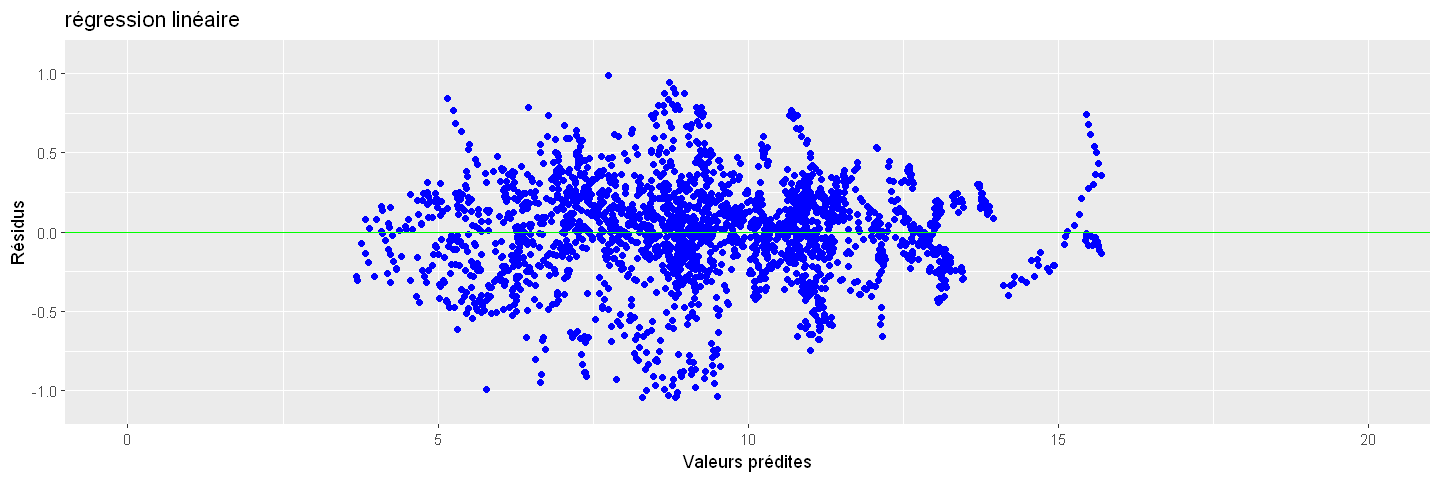

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


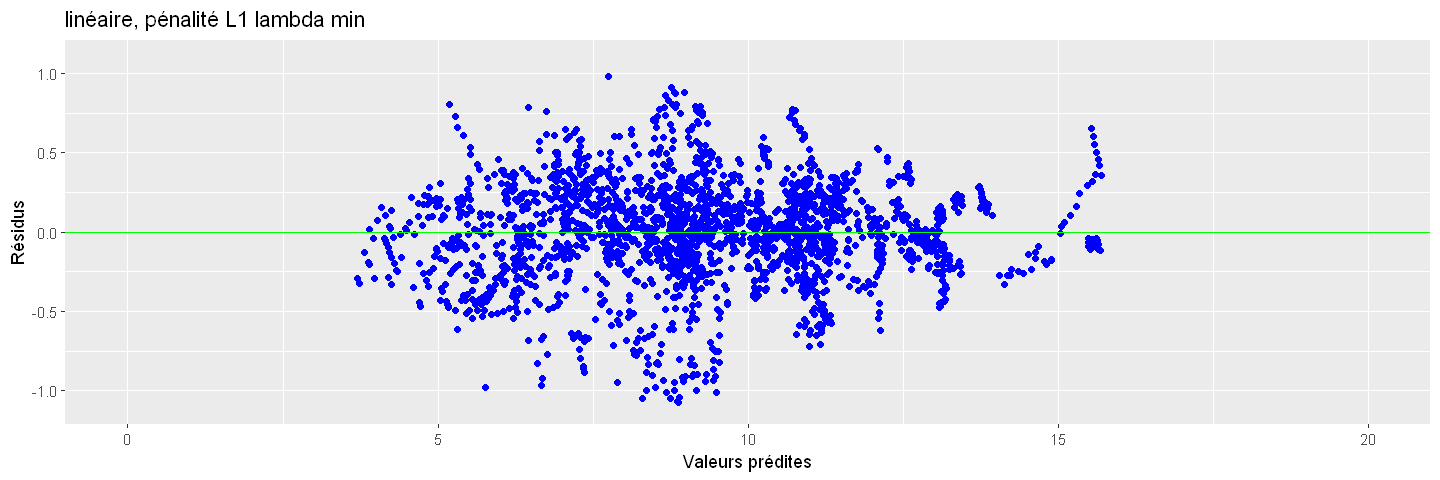

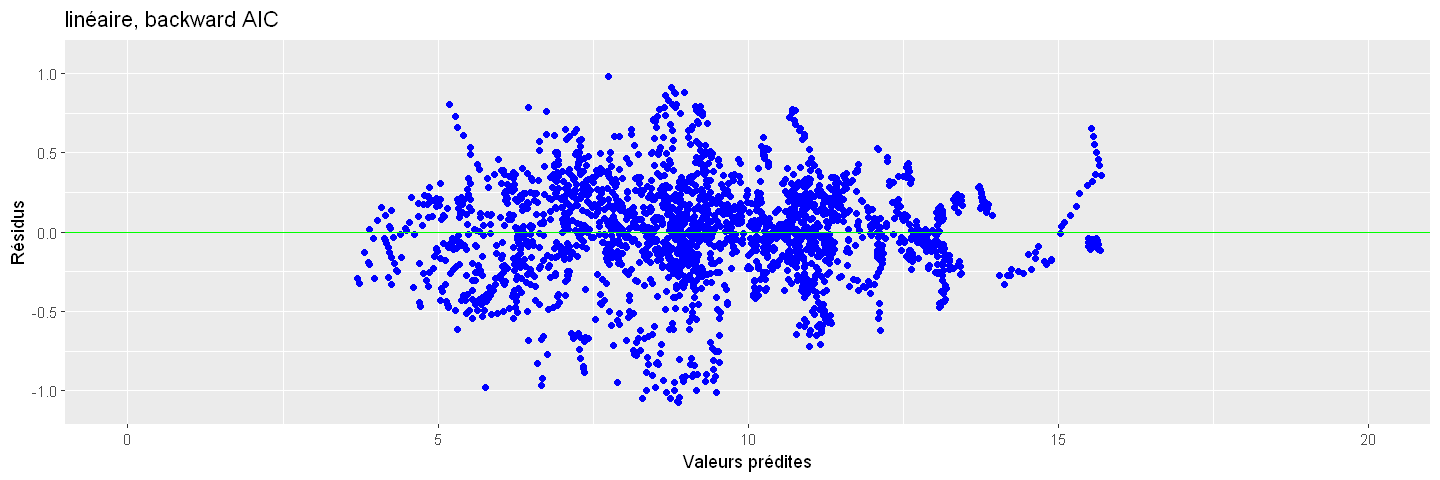

In [81]:
### linéaire pas de sélection
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
### Lasso lambda min
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Value_co2_emissions_kt_by_country - fit.lasso
### AIC
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
g1<-gplot.res(fit.lm, res.lm, "régression linéaire")
g2<-gplot.res(fit.lasso, res.lasso, "linéaire, pénalité L1 lambda min")
g3<-gplot.res(fit.lasso, res.lasso, "linéaire, backward AIC")
g1
g2
g3

In [82]:
# Calcul des prévisions pour le modèle linéaire complet
pred.glm <- predict(reg.lm, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09864353

In [86]:
# Calcul des prévisions pour le modèle linéaire pénalisation Lasso
x.test <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1 - Entity - Year, data = datestr)
reg.lasso.cv.test <- cv.glmnet(y = datestr[, 11], x = x.test)
fit.lasso <- predict(reg.lasso.cv.test, s = "lambda.min", newx = x.test)
# Erreur quadratique moyenne de prévision (MSE)
sum((fit.lasso - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09505097

In [85]:
# Calcul des prévisions pour le modèle linéaire backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09877281

In [96]:
### Conclusion de partie 1 : le meilleur modèle est le Lasso

In [87]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.002"

23 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -1.149153e+01
Access.to.electricity....of.population.                           1.138247e-01
Access.to.clean.fuels.for.cooking                                 .           
Renewable.energy.share.in.the.total.final.energy.consumption.... -6.749598e-02
Electricity.from.nuclear..TWh.                                   -7.942277e-03
Electricity.from.renewables..TWh.                                -1.796674e-02
Low.carbon.electricity....electricity.                           -3.343139e-02
Primary.energy.consumption.per.capita..kWh.person.                4.358269e-01
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       1.023395e-02
gdp_growth                                                       -6.704740e-03
gdp_per_capita                                                    2.412620e-01
Density.n.

In [19]:
library(e1071)

In [21]:
svm.reg.lin.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Entity - Year - Type - Period, type = "eps-regression", data = datappr, kernel = "lin", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5))
summary(svm.reg.lin.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  1.5

- best performance: 0.1555182 

- Detailed performance results:
  cost     error dispersion
1  1.0 0.1555610 0.02268911
2  1.5 0.1555182 0.02270094
3  2.0 0.1555722 0.02269788
4  2.5 0.1555502 0.02268729
5  3.0 0.1555415 0.02268760
6  3.5 0.1555366 0.02267248
7  4.0 0.1555702 0.02267929
8  4.5 0.1555512 0.02266423
9  5.0 0.1555651 0.02270478


Warning message:
“Removed 27 rows containing missing values (`geom_point()`).”


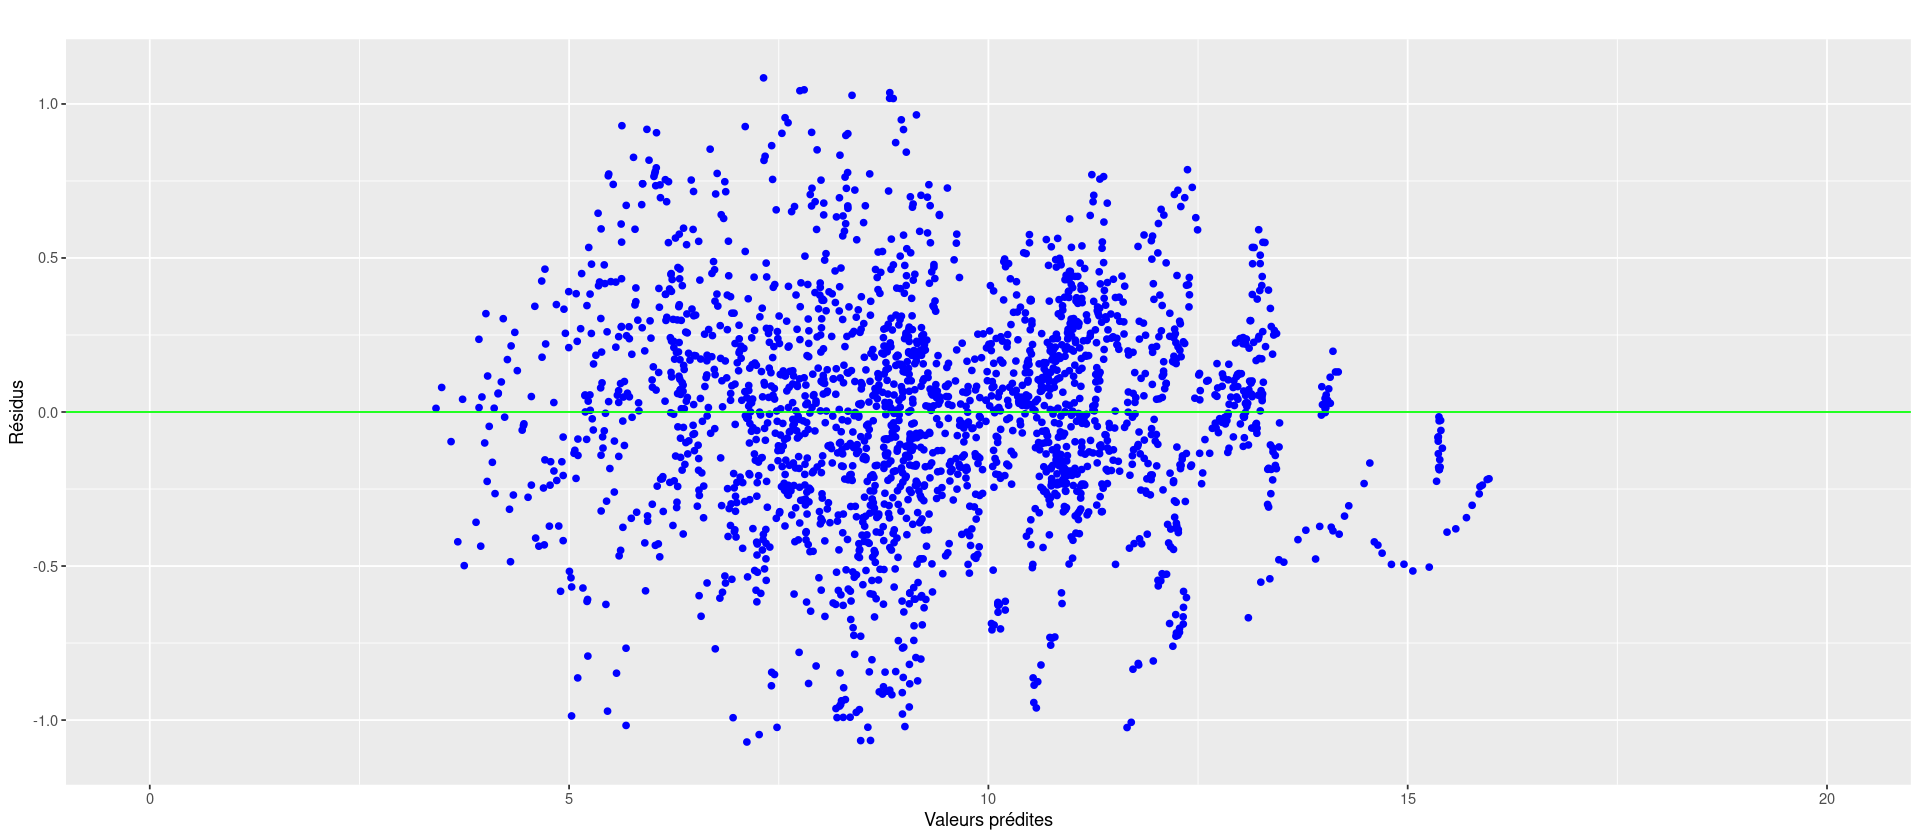

In [22]:
fit.svmr=svm.reg.lin.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [23]:
svm.reg.poly <- svm(Value_co2_emissions_kt_by_country ~ . - Entity - Year - Type - Period, type = "eps-regression", data = datappr, kernel = "poly")
summary(svm.reg.poly)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ . - Country - Year, 
    data = datappr, type = "eps-regression", kernel = "poly")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.07142857 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  1040






Warning message:
“Removed 52 rows containing missing values (`geom_point()`).”


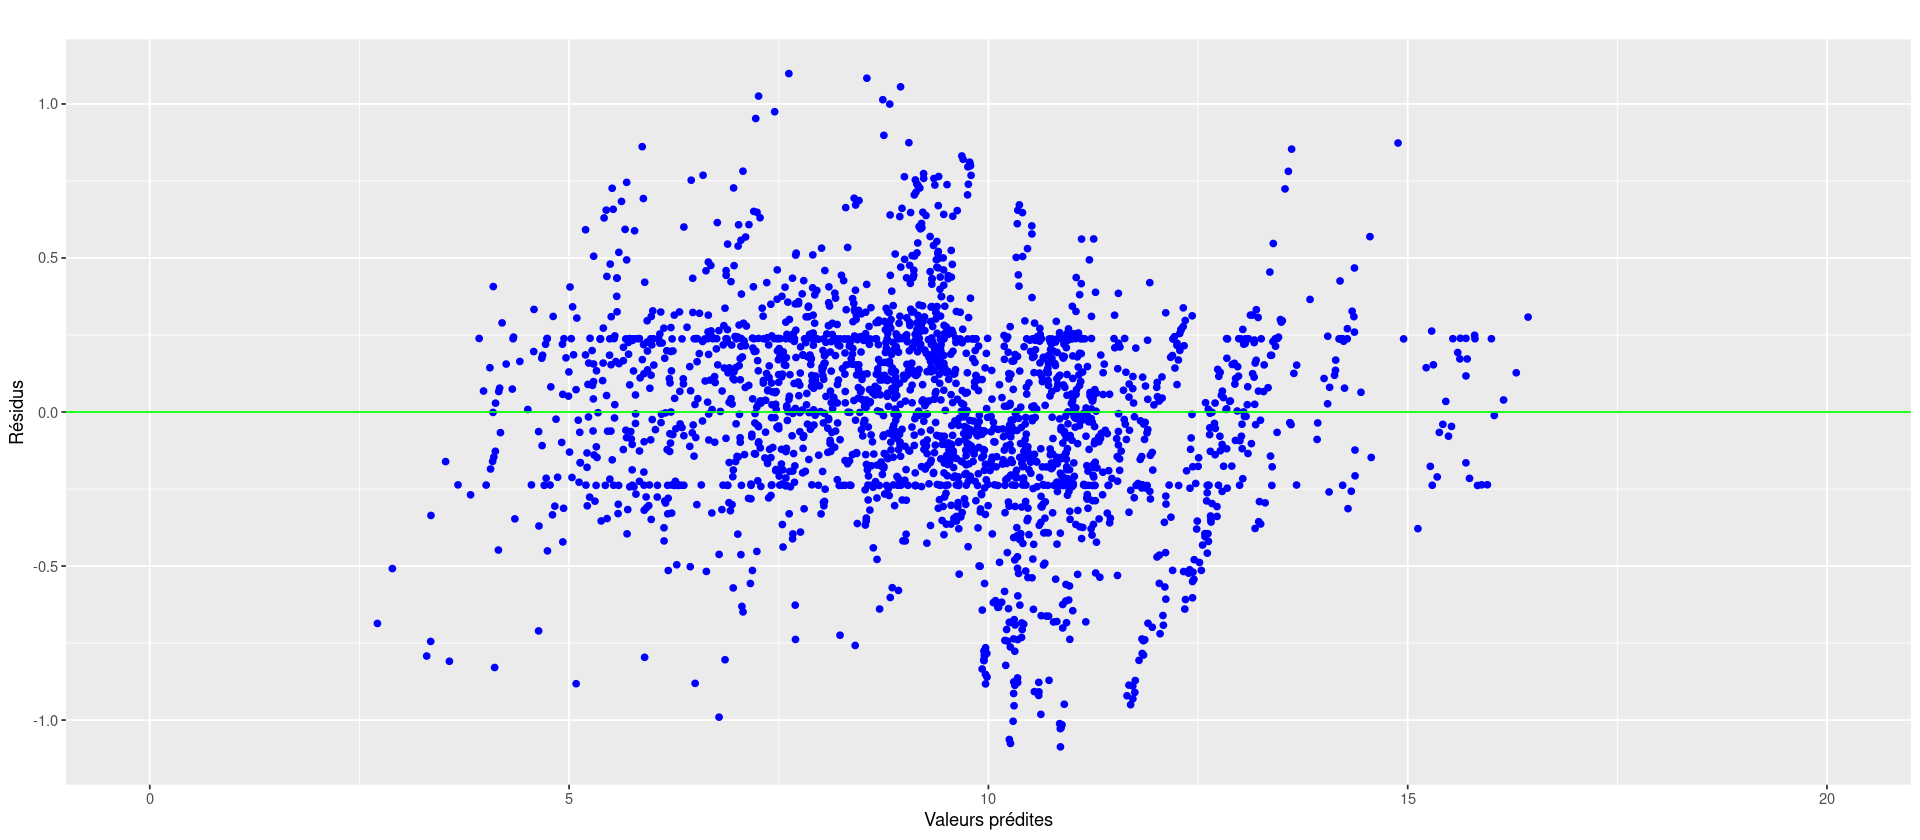

In [24]:
fit.svmr=svm.reg.poly$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [25]:
svm.reg.poly.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Entity - Year - Type - Period, type = "eps-regression", data = datappr, kernel = "poly", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5), coef0 = -5:5, gamma = seq(0.02, 0.1, by = 0.02), degree = 1:4)
summary(svm.reg.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree gamma coef0 cost
      3  0.06     5  1.5

- best performance: 0.03301648 

- Detailed performance results:
     degree gamma coef0 cost        error   dispersion
1         1  0.02    -5  1.0 1.578607e-01 2.351624e-02
2         2  0.02    -5  1.0 1.461119e+07 1.062041e+06
3         3  0.02    -5  1.0 8.436027e+04 1.859508e+04
4         4  0.02    -5  1.0 3.611895e+10 2.622720e+09
5         1  0.04    -5  1.0 1.563163e-01 2.285931e-02
6         2  0.04    -5  1.0 5.799240e+07 4.202106e+06
7         3  0.04    -5  1.0 1.381389e+06 2.981100e+05
8         4  0.04    -5  1.0 1.430757e+11 1.036671e+10
9         1  0.06    -5  1.0 1.561432e-01 2.268033e-02
10        2  0.06    -5  1.0 1.294855e+08 9.401788e+06
11        3  0.06    -5  1.0 7.413498e+06 1.398283e+06
12        4  0.06    -5  1.0 3.212576e+11 2.306000e+10
13        1  0.08    -5  1.0 1.560302e-01 2.267176e-02
14        2  0.08   

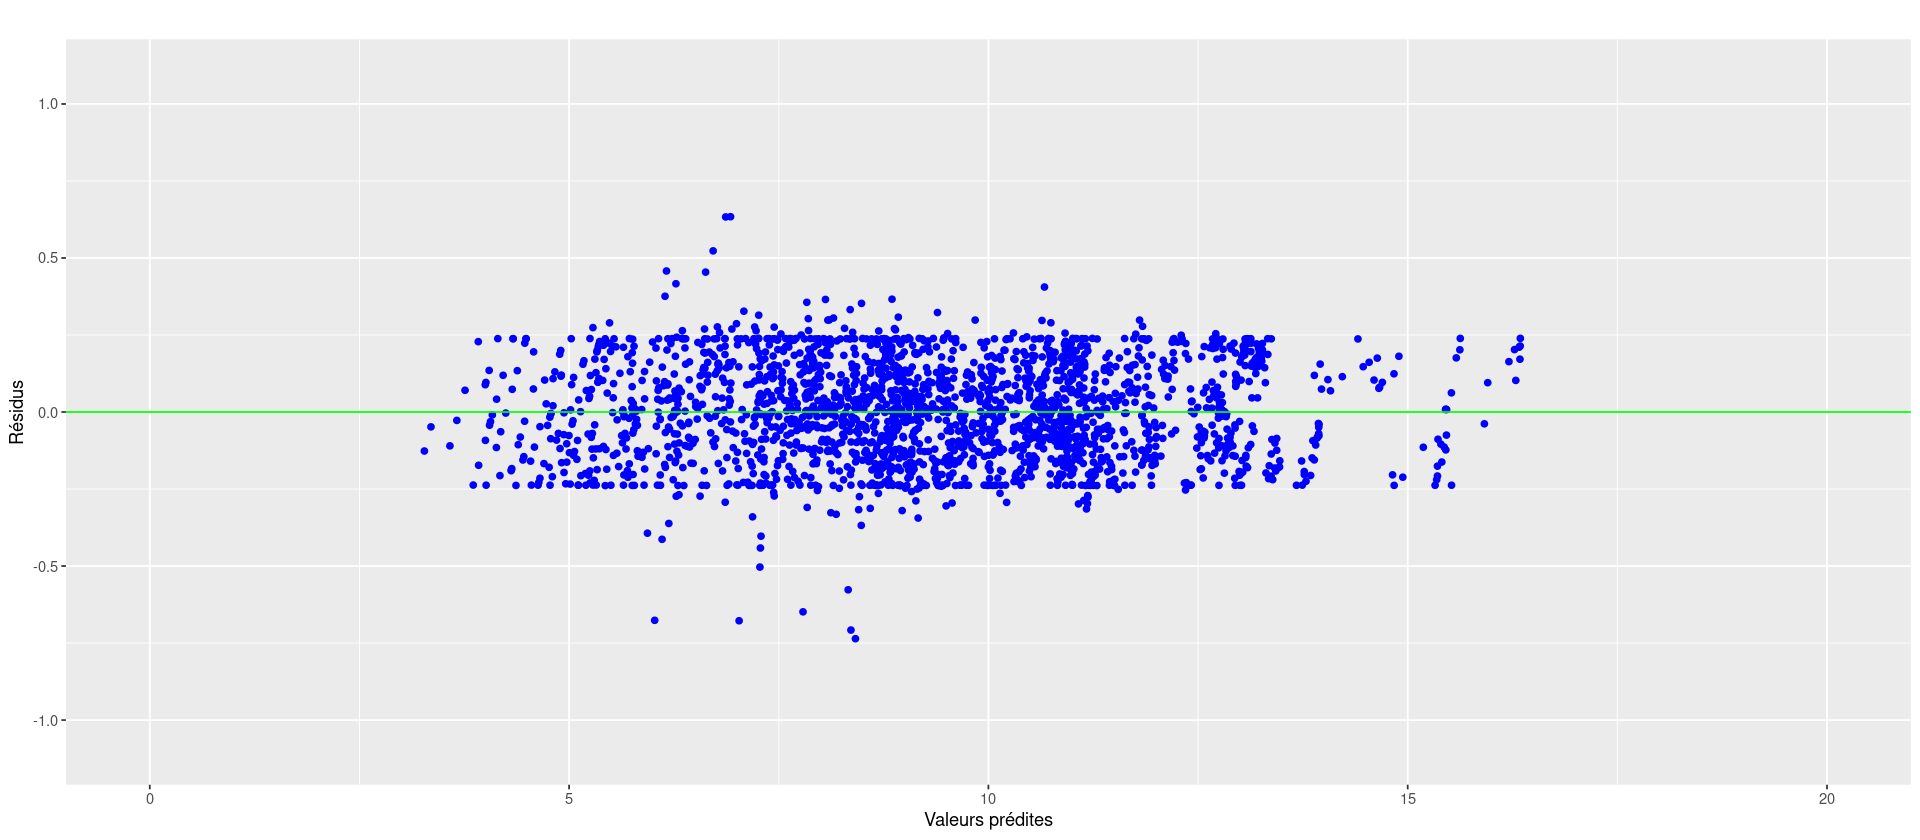

In [26]:
fit.svmr=svm.reg.poly.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [27]:
svm.reg.rad <- svm(Value_co2_emissions_kt_by_country ~ . - Entity - Year - Type - Period, type = "eps-regression", data = datappr, kernel = "radial")
summary(svm.reg.rad)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ . - Country - Year, 
    data = datappr, type = "eps-regression", kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.07142857 
    epsilon:  0.1 


Number of Support Vectors:  459






Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


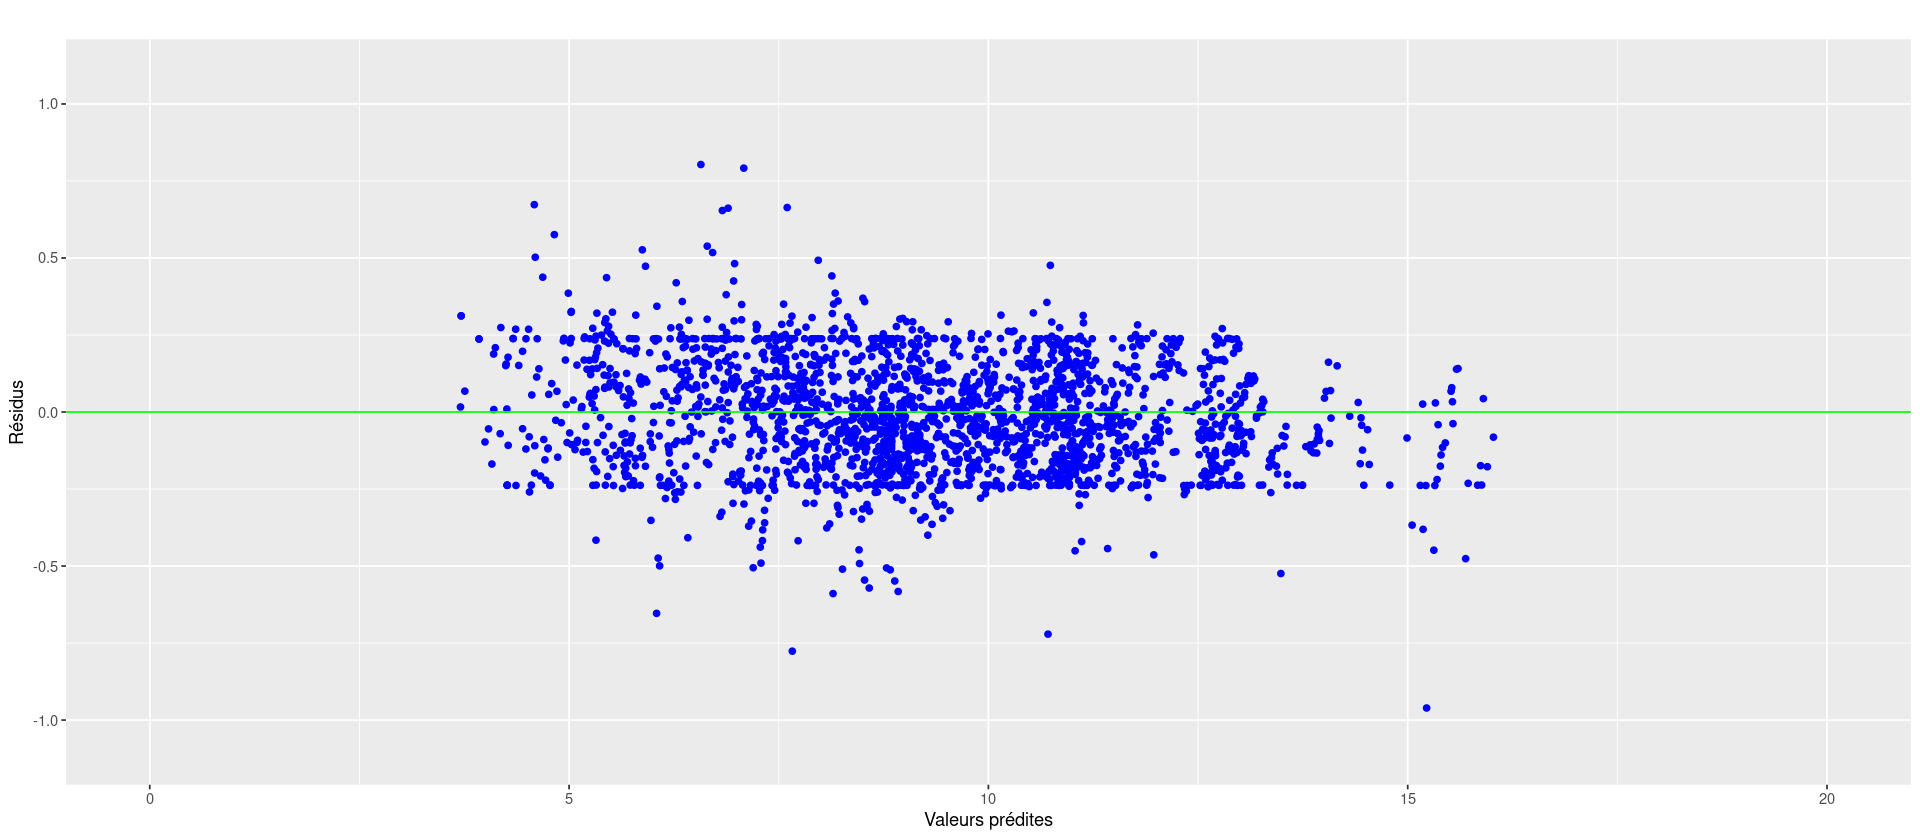

In [28]:
fit.svmr=svm.reg.rad$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [34]:
svm.reg.rad.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Entity - Year - Type - Period, type = "eps-regression", data = datappr, kernel = "radial", cost = c(1, 5, 10, 20, 100), gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02  100

- best performance: 0.03425156 

- Detailed performance results:
   gamma cost      error  dispersion
1   0.02    1 0.07245589 0.012064791
2   0.04    1 0.06462480 0.017783842
3   0.06    1 0.06179194 0.020526981
4   0.08    1 0.06202331 0.021865565
5   0.10    1 0.06695124 0.022861169
6   0.02    5 0.04699642 0.008501067
7   0.04    5 0.04463811 0.017058028
8   0.06    5 0.04692718 0.022042770
9   0.08    5 0.05075529 0.023053092
10  0.10    5 0.05545047 0.024330838
11  0.02   10 0.04109162 0.008656753
12  0.04   10 0.04263057 0.017286539
13  0.06   10 0.04647141 0.021807151
14  0.08   10 0.05058380 0.022916840
15  0.10   10 0.05517446 0.024294448
16  0.02   20 0.03783358 0.008848242
17  0.04   20 0.04161449 0.016953860
18  0.06   20 0.04623848 0.021720992
19  0.08   20 0.05034788 0.023239278
20  0.10   20 0.05500161 0.024197357
21  0.02  100 0.03425156 0.007377152
22

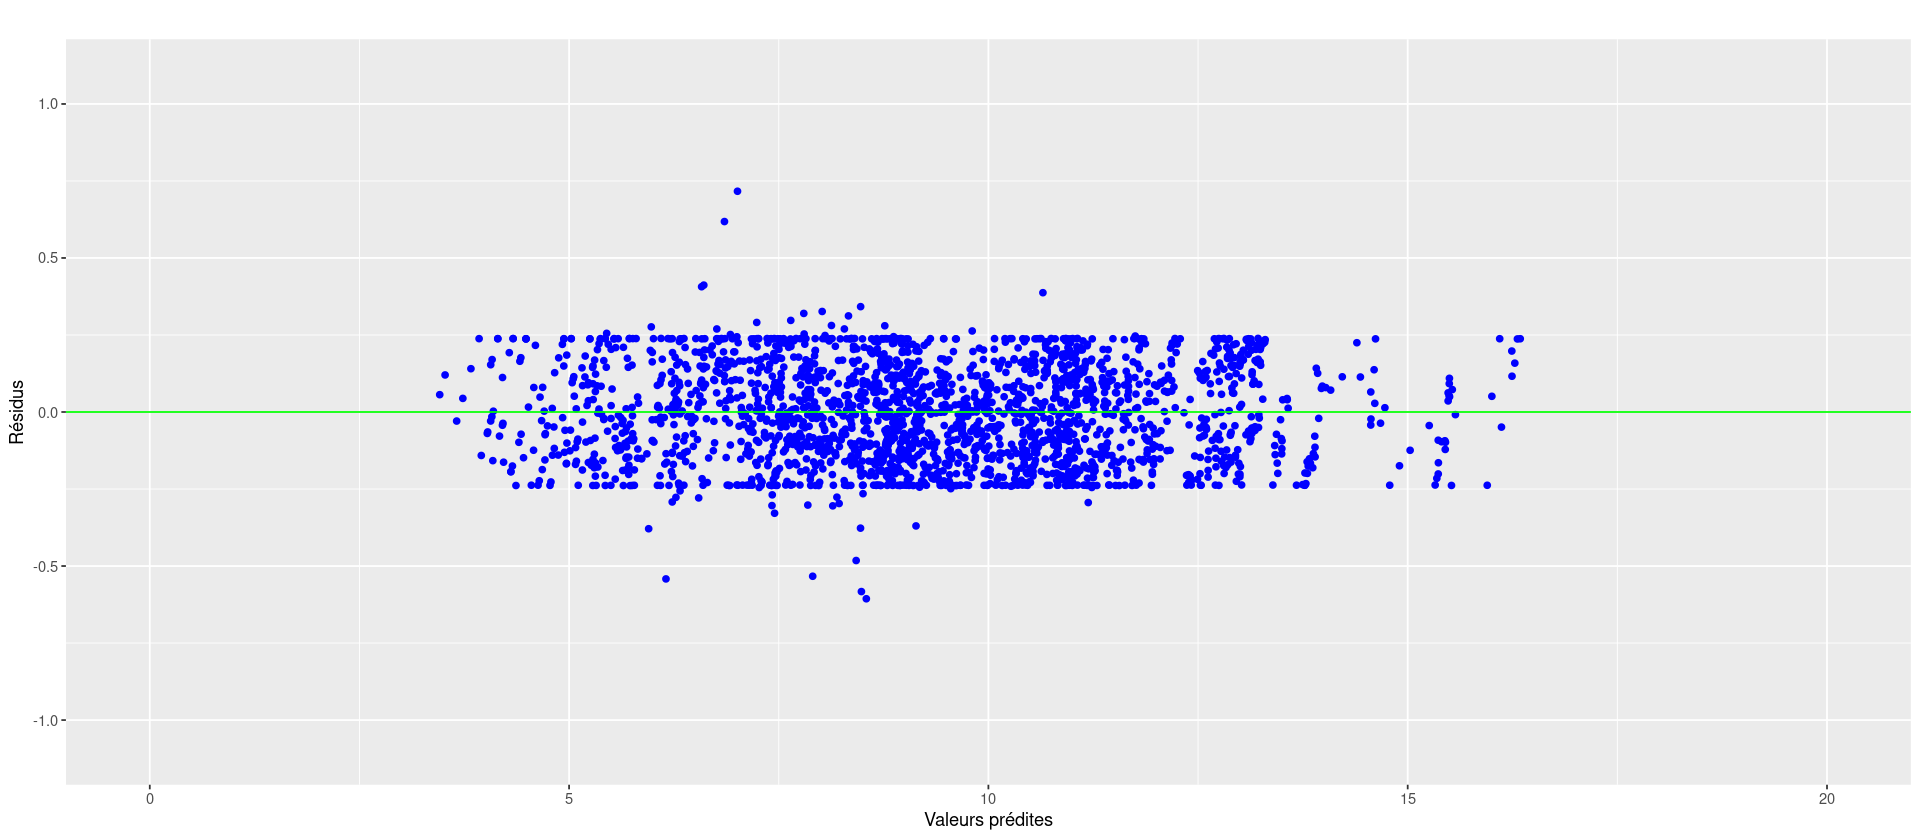

In [35]:
fit.svmr=svm.reg.rad.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [36]:
pred.svmr.lin.tune=predict(svm.reg.lin.tune$best.model,newdata=datestr)
pred.svmr.poly = predict(svm.reg.poly, newdata=datestr)
pred.svmr.poly.tune = predict(svm.reg.poly.tune$best.model, newdata = datestr)
pred.svmr.rad = predict(svm.reg.rad, newdata=datestr)
pred.svmr.rad.tune = predict(svm.reg.rad.tune$best.model, newdata = datestr)

paste("Tuned linear kernel:",sum((pred.svmr.lin.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default polynomial kernel:",sum((pred.svmr.poly-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned polynomial kernel:",sum((pred.svmr.poly.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default radial kernel:",sum((pred.svmr.rad-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned radial kernel:",sum((pred.svmr.rad.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")

[1] "Tuned linear kernel: 0.16044659628599"

[1] "Default polynomial kernel: 0.215802249390441"

[1] "Tuned polynomial kernel: 0.0346346071750091"

[1] "Default radial kernel: 0.0650436133015688"

[1] "Tuned radial kernel: 0.0349294697223709"

In [28]:
### conclusion partie 2 : Tuned polynomial  et radial sont les meilleurs avec une erreur de généralisation de 0.034
### meilleur aussi que Lasso avec lambda min (pour rappel : 0.09)

In [88]:
library(rpart) 

In [102]:
tree.reg=rpart(Value_co2_emissions_kt_by_country ~ . - Entity - Year ,data=datappr,control=rpart.control(cp=0.001))

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


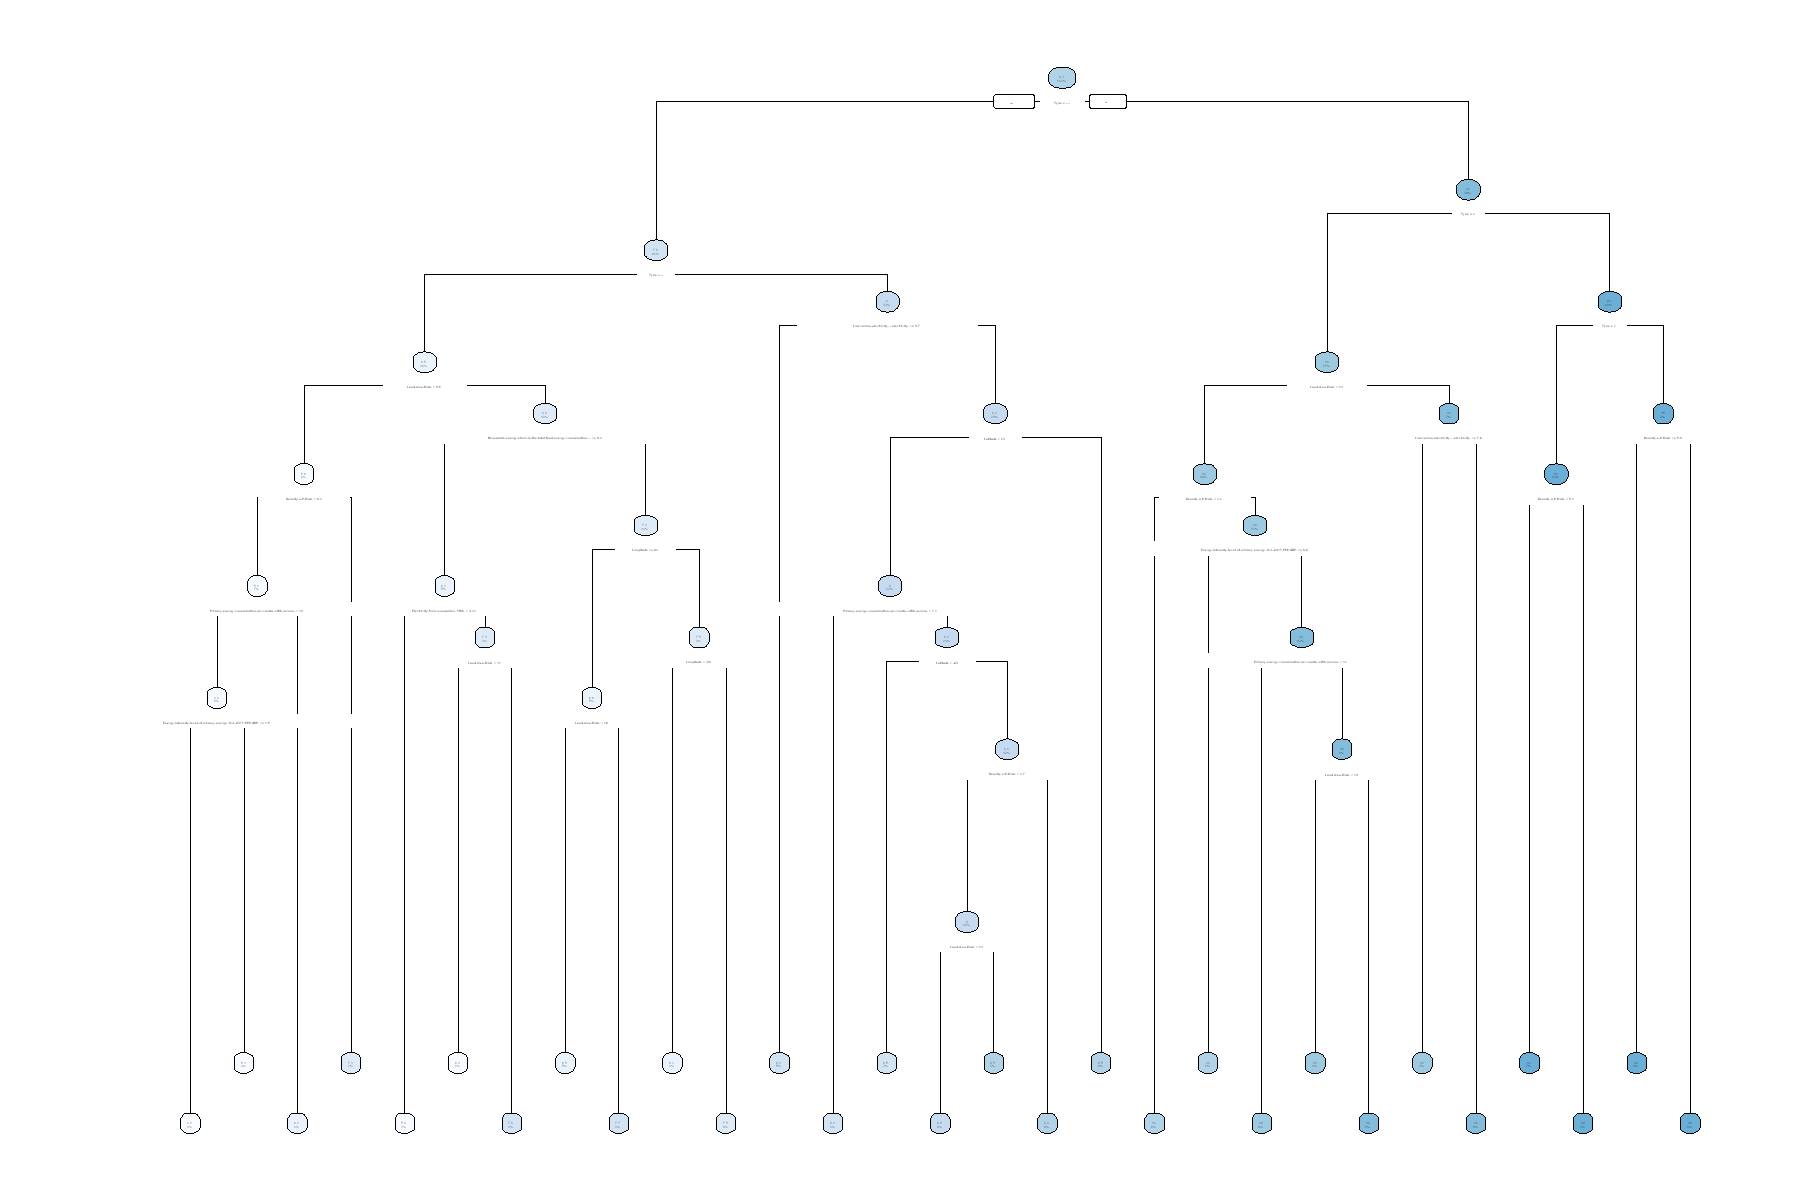

In [90]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

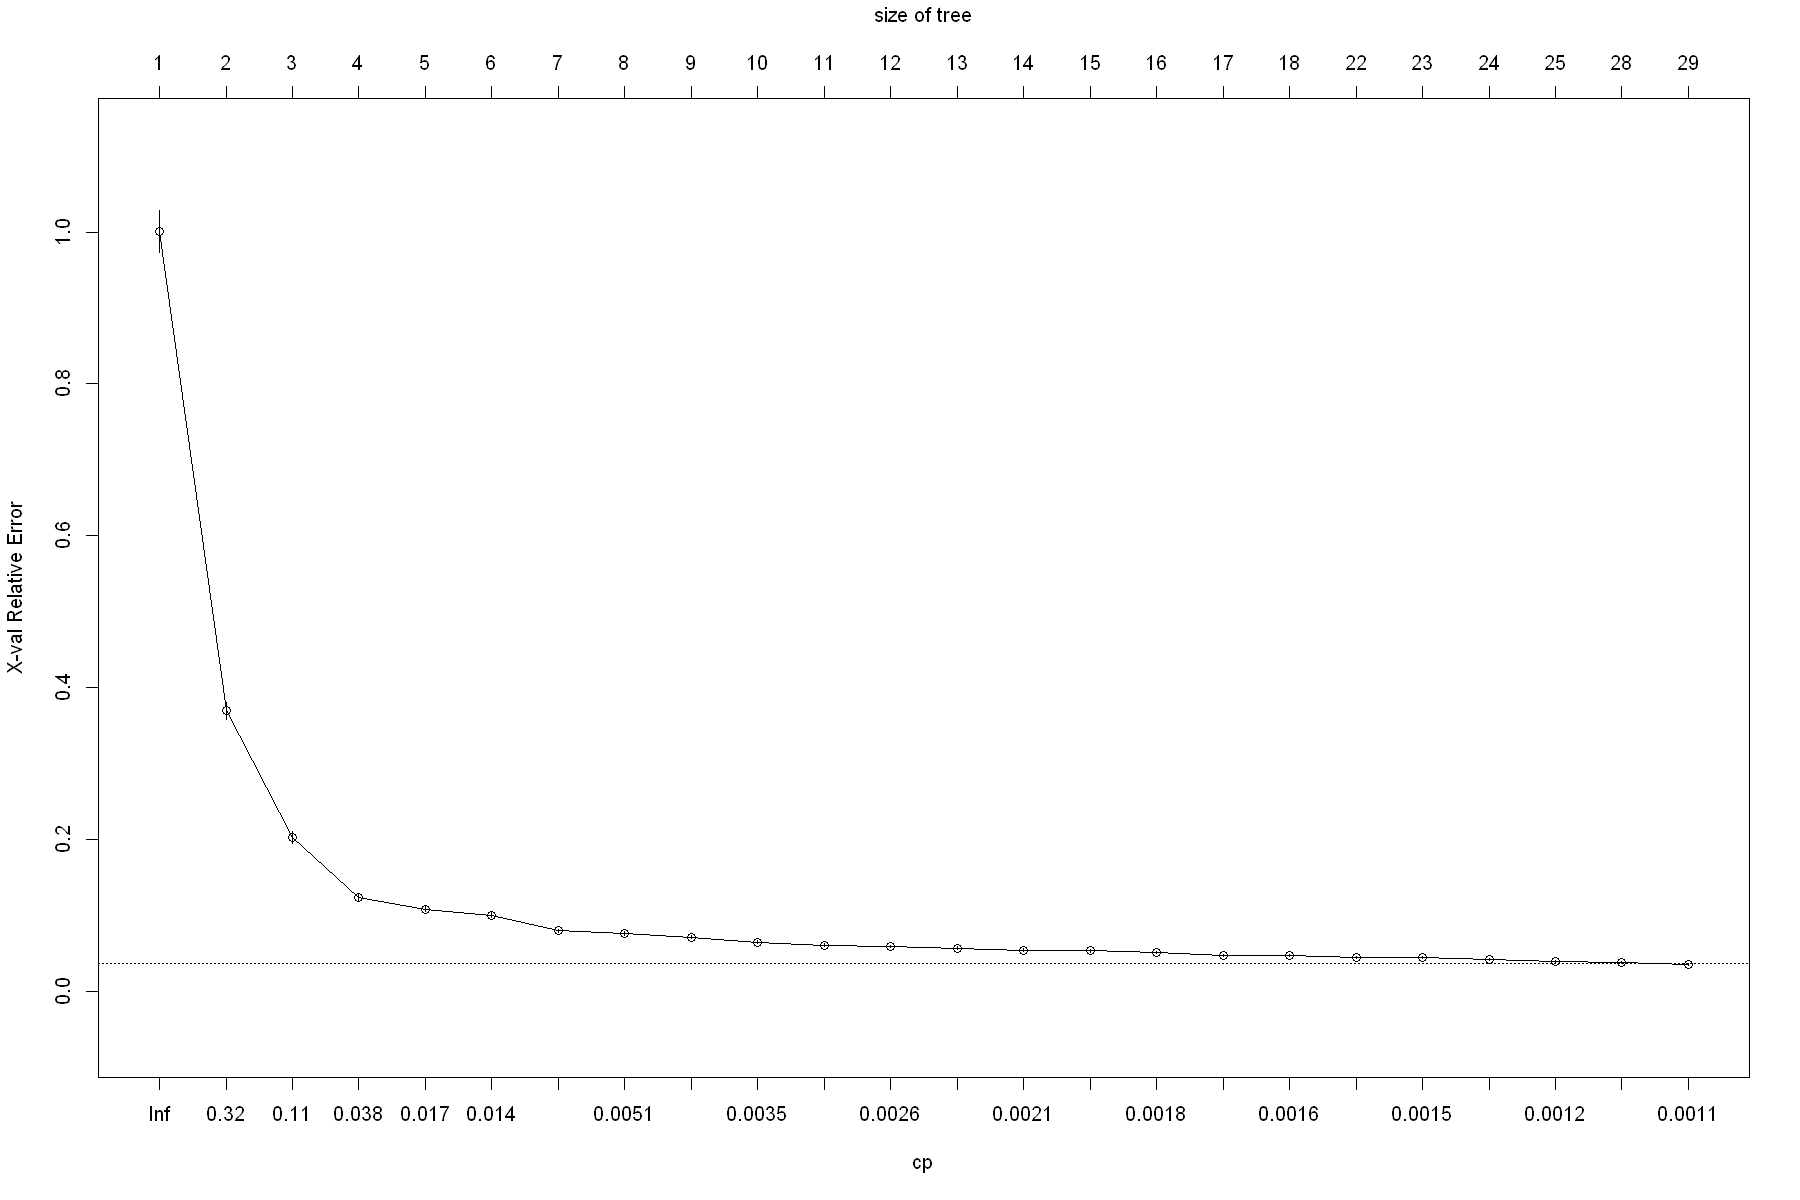

In [91]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"Value_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

[1] 0.001051734

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


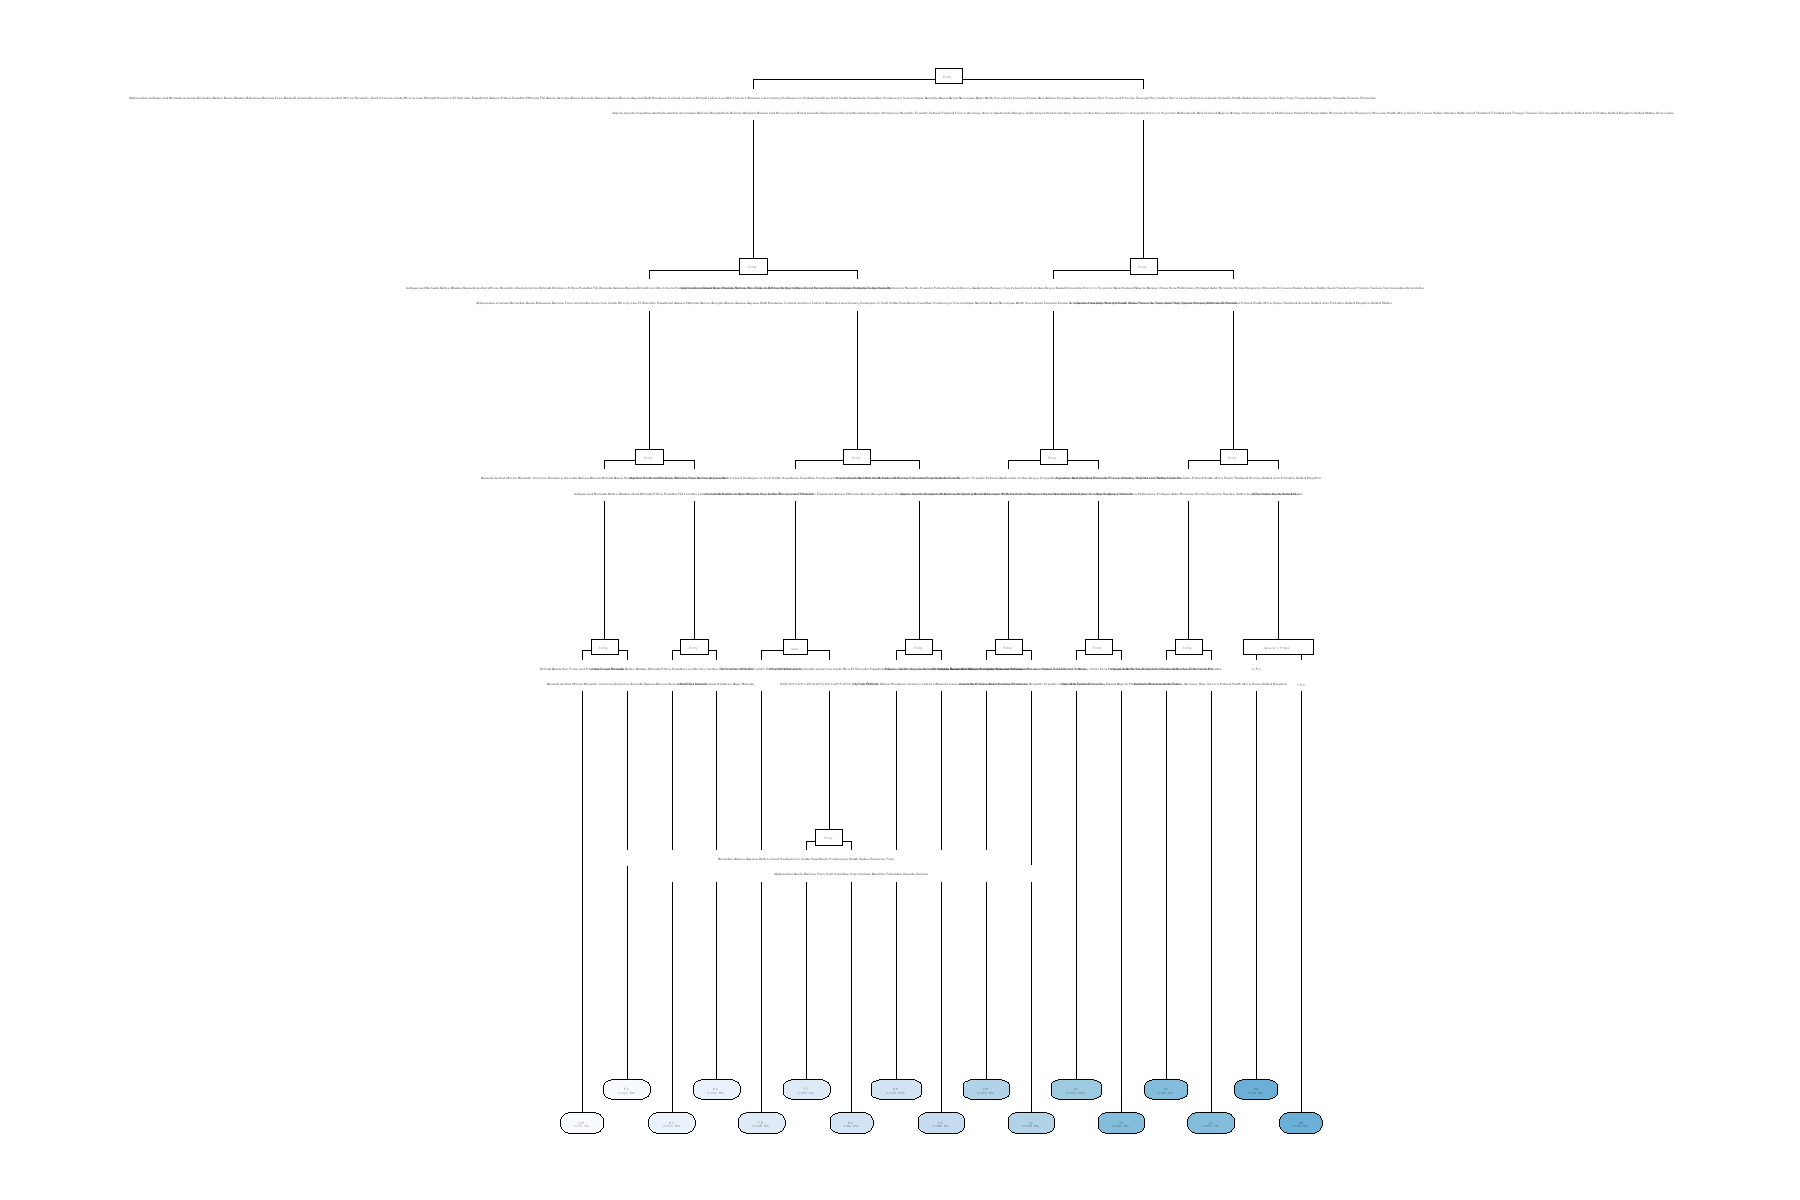

In [92]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



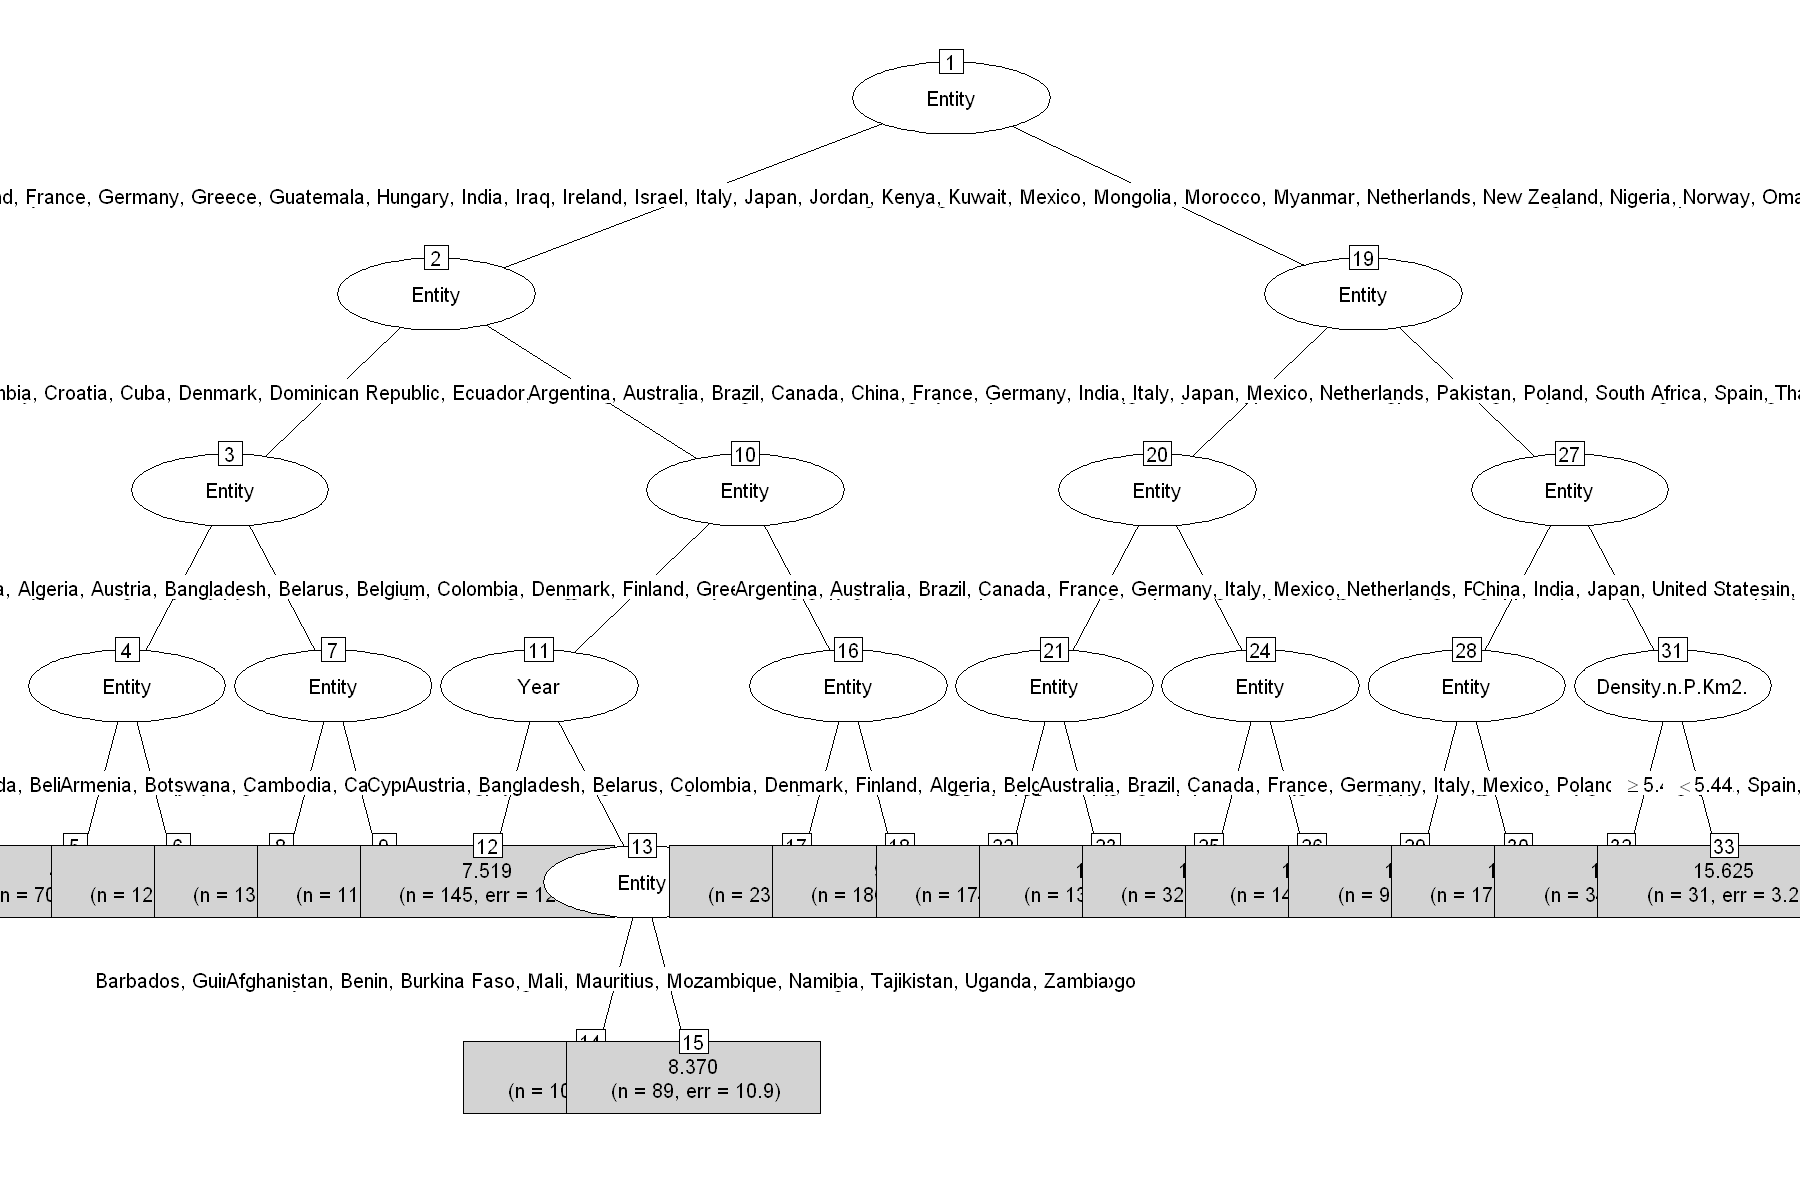

In [93]:
library(partykit)
plot(as.party(tree.reg), type="simple")

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


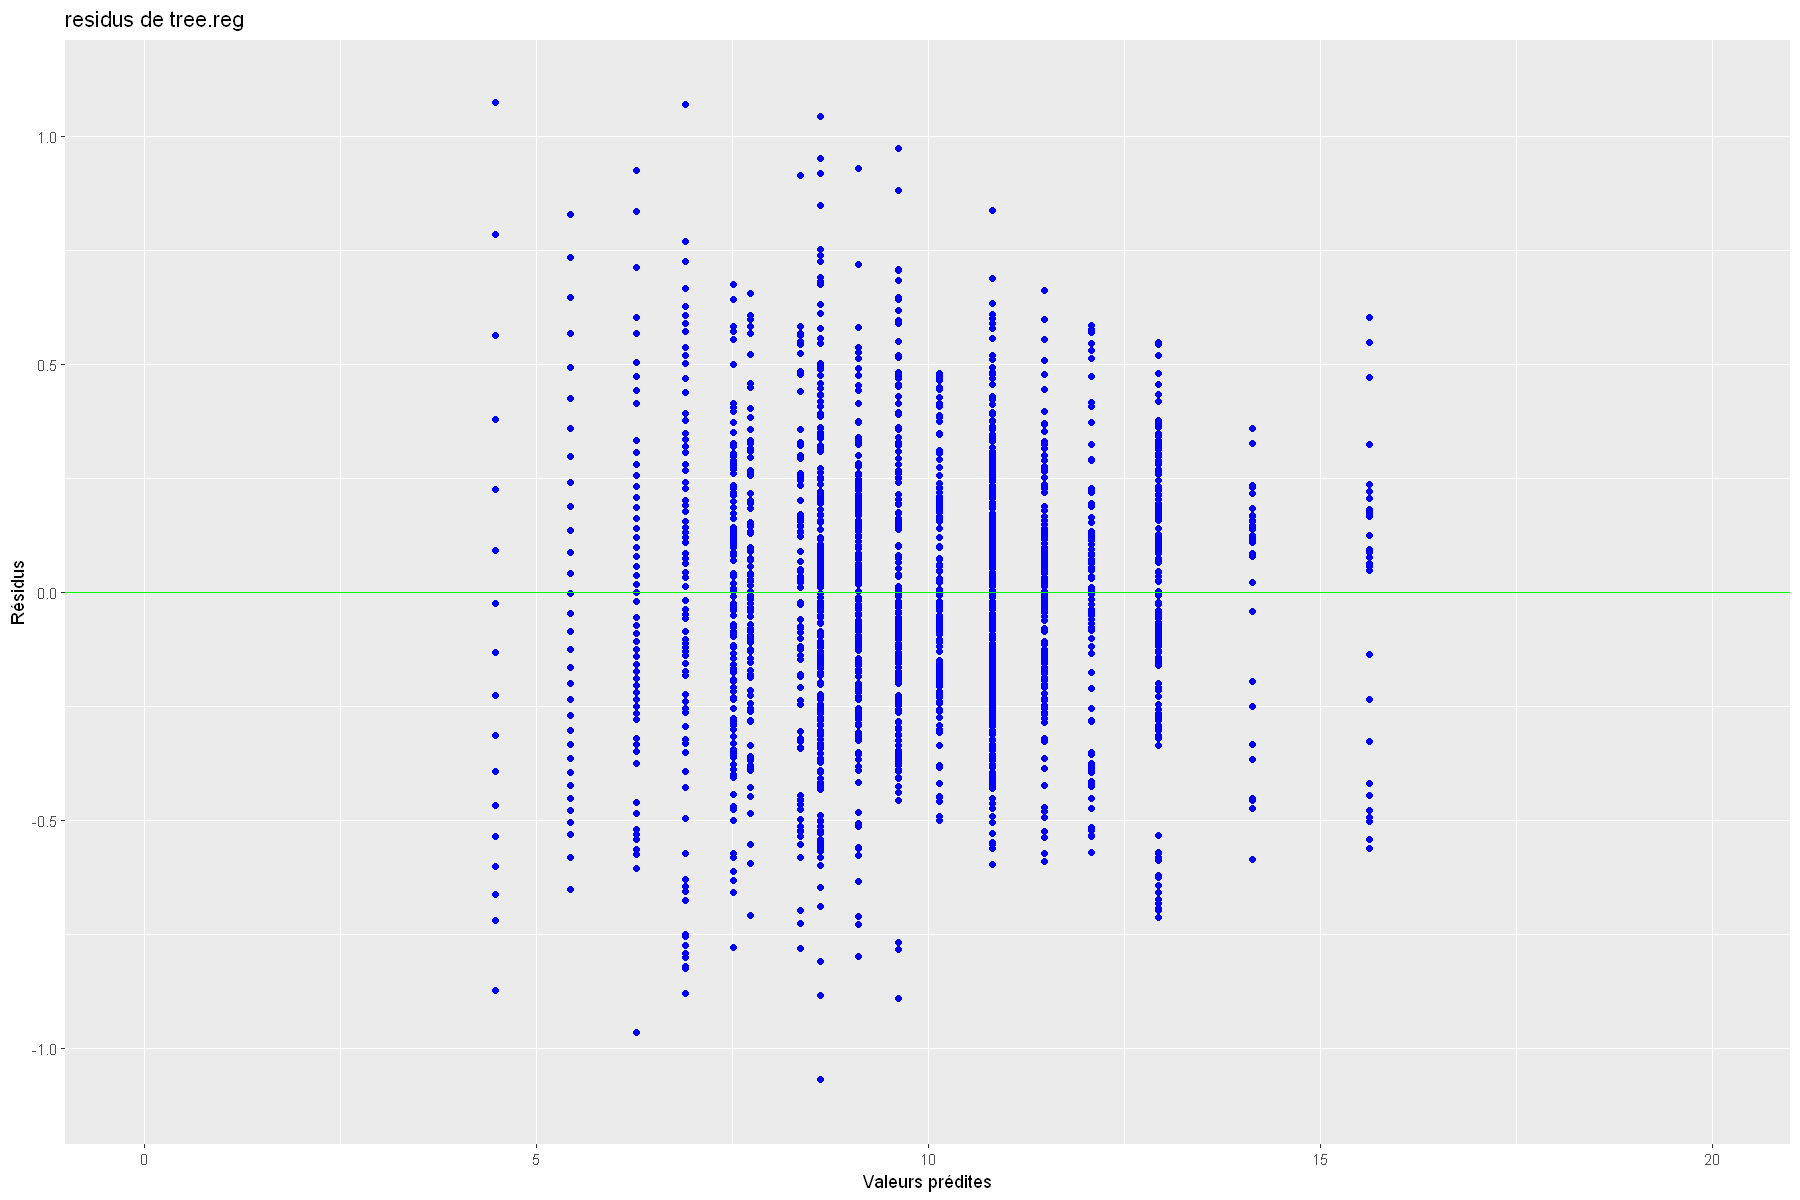

In [94]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

In [95]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.1038574

In [96]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:dplyr':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin




In [105]:
rf.reg=randomForest(Value_co2_emissions_kt_by_country~ . - Entity - Year, data=datappr,xtest=datestr[,-c(1,2,11)],ytest=datestr[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01685     0.30 |   0.0142     0.24 |
 100 |  0.01537     0.27 |  0.01462     0.25 |
 150 |  0.01467     0.26 |  0.01425     0.25 |
 200 |  0.01443     0.26 |  0.01409     0.24 |
 250 |  0.01419     0.25 |  0.01412     0.24 |
 300 |  0.01421     0.25 |  0.01432     0.25 |
 350 |   0.0141     0.25 |  0.01419     0.24 |
 400 |  0.01407     0.25 |   0.0141     0.24 |
 450 |  0.01396     0.25 |  0.01413     0.24 |
 500 |  0.01397     0.25 |  0.01412     0.24 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


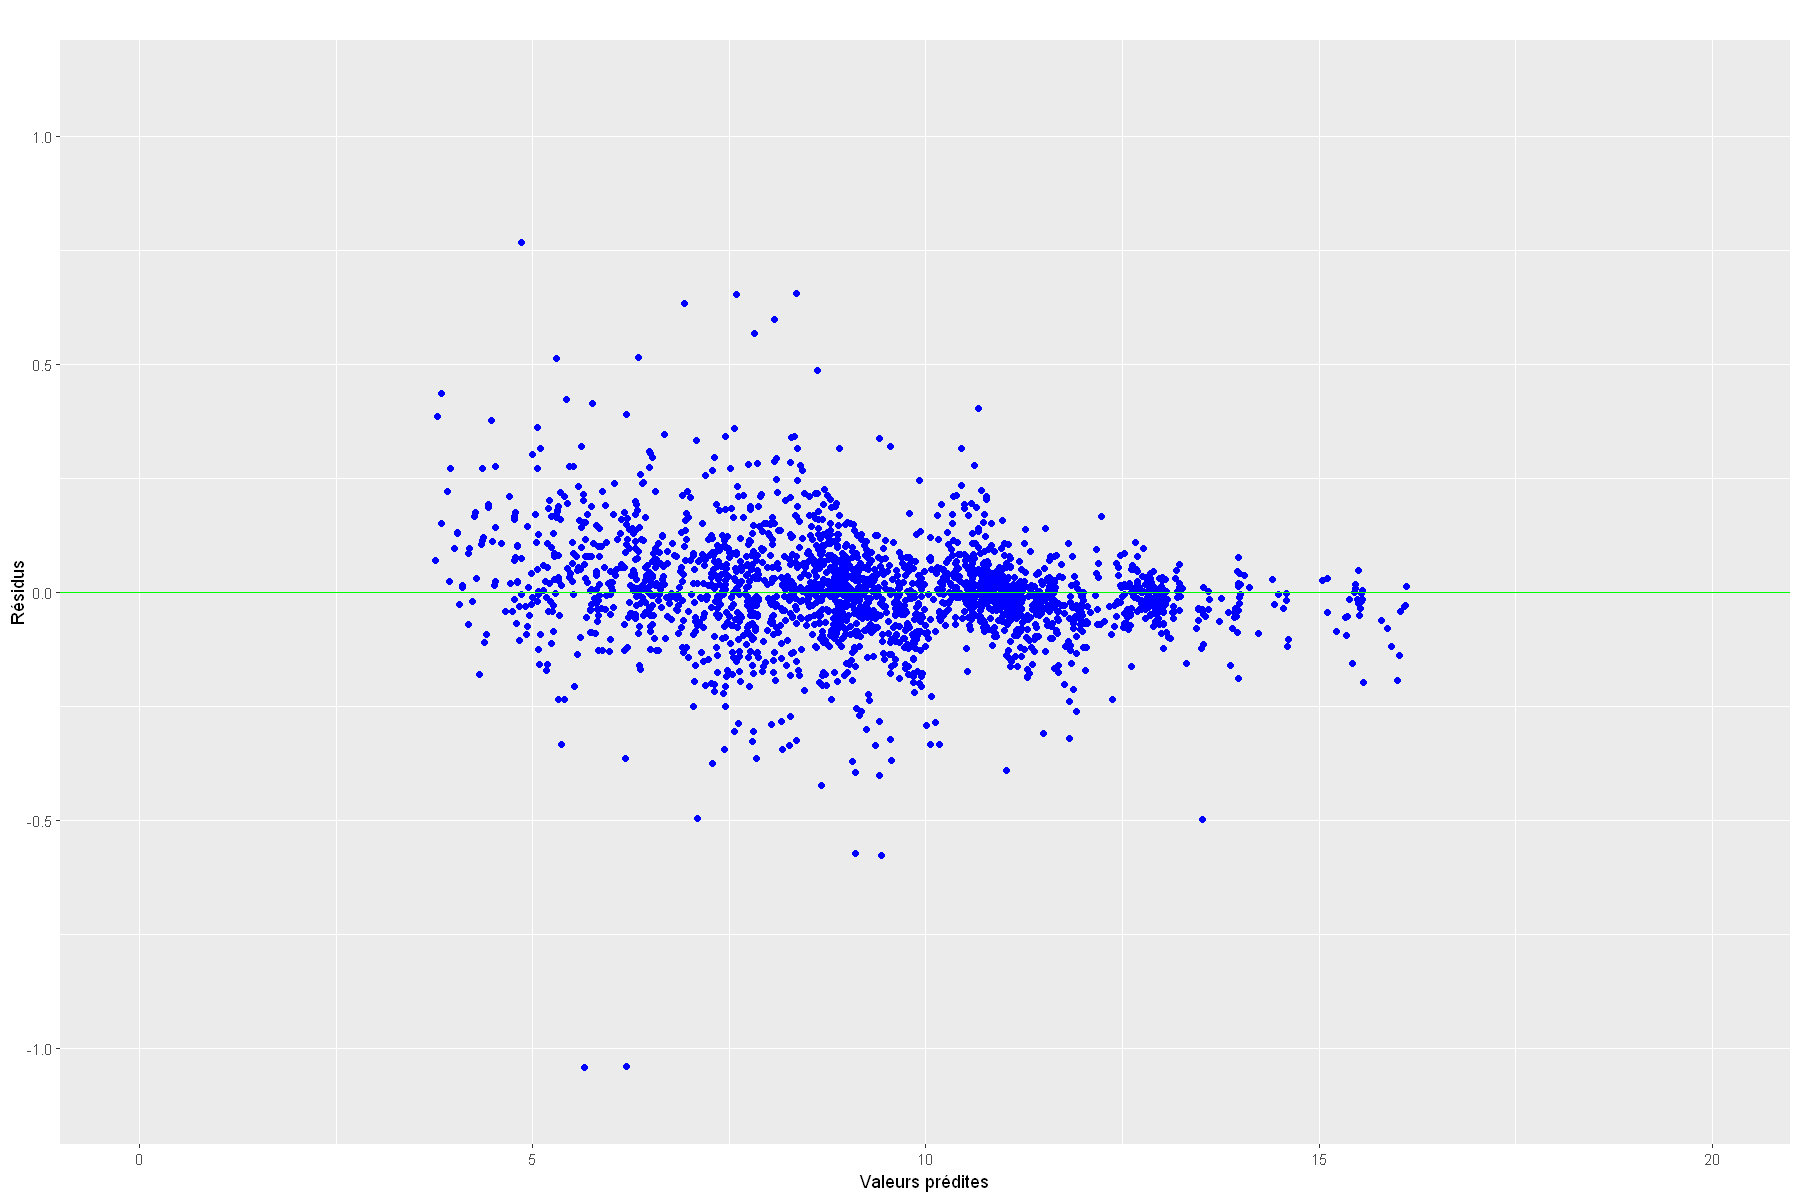

In [106]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.rfr,res.rfr,titre="")

Type 
                                                           51.69 
                                                          Period 
                                                           33.15 
                                                Density.n.P.Km2. 
                                                           32.45 
                                                  Land.Area.Km2. 
                                                           29.06 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                           28.01 
                          Low.carbon.electricity....electricity. 
                                                           27.60 
                                                       Longitude 
                                                           25.81 
                               Electricity.from.renewables..TWh. 
                                                           23.39 
                                                        Latitude 
                                                           22.30 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                           18.96 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                           18.24 
                                                  gdp_per_capita 
                                                           16.13 
                                  Electricity.from.nuclear..TWh. 
                                                           15.80 
                               Access.to.clean.fuels.for.cooking 
                                                           15.26 
                         Access.to.electricity....of.population. 
                                                           14.46 
                                                      gdp_growth 
                                                            7.05

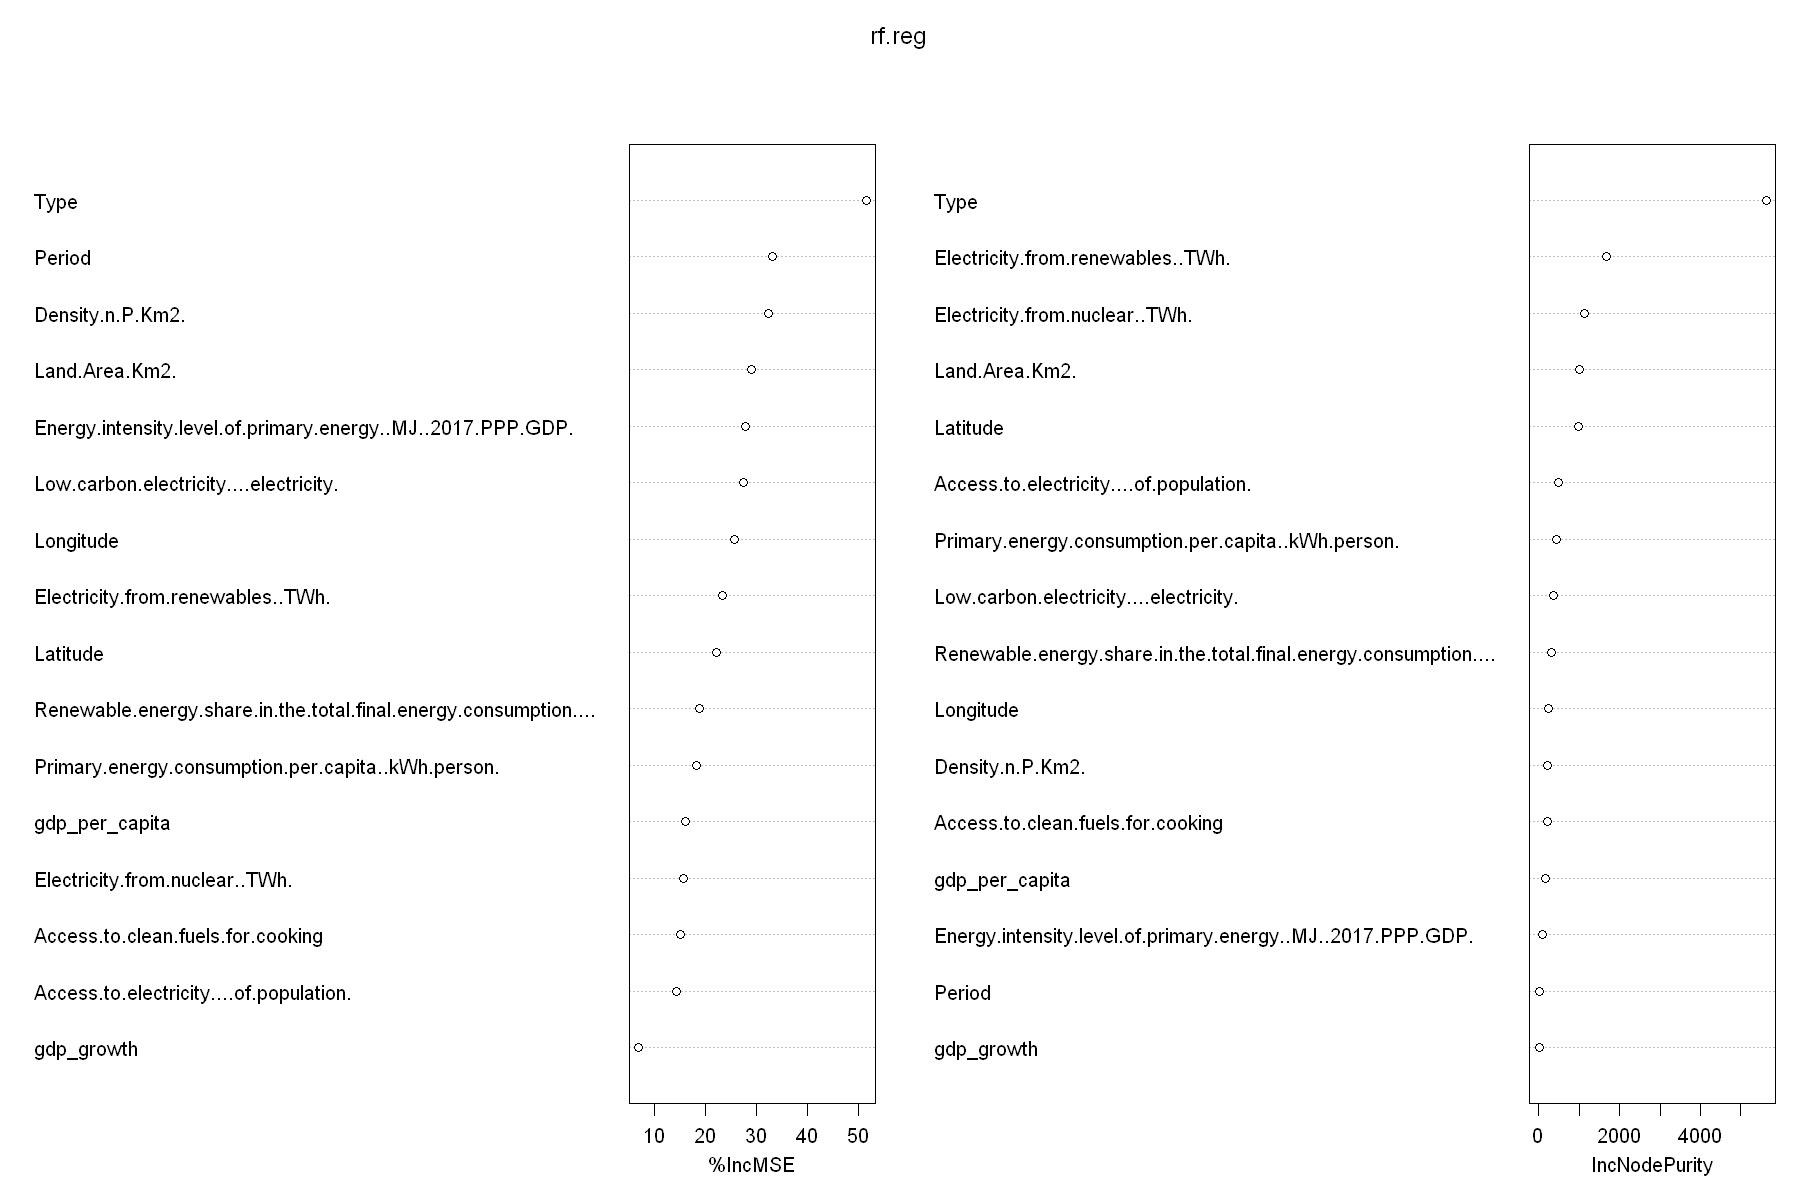

In [107]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg)

Le chargement a nécessité le package : randomForestSRC


 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attachement du package : 'randomForestSRC'


L'objet suivant est masqué depuis 'package:purrr':

    partial




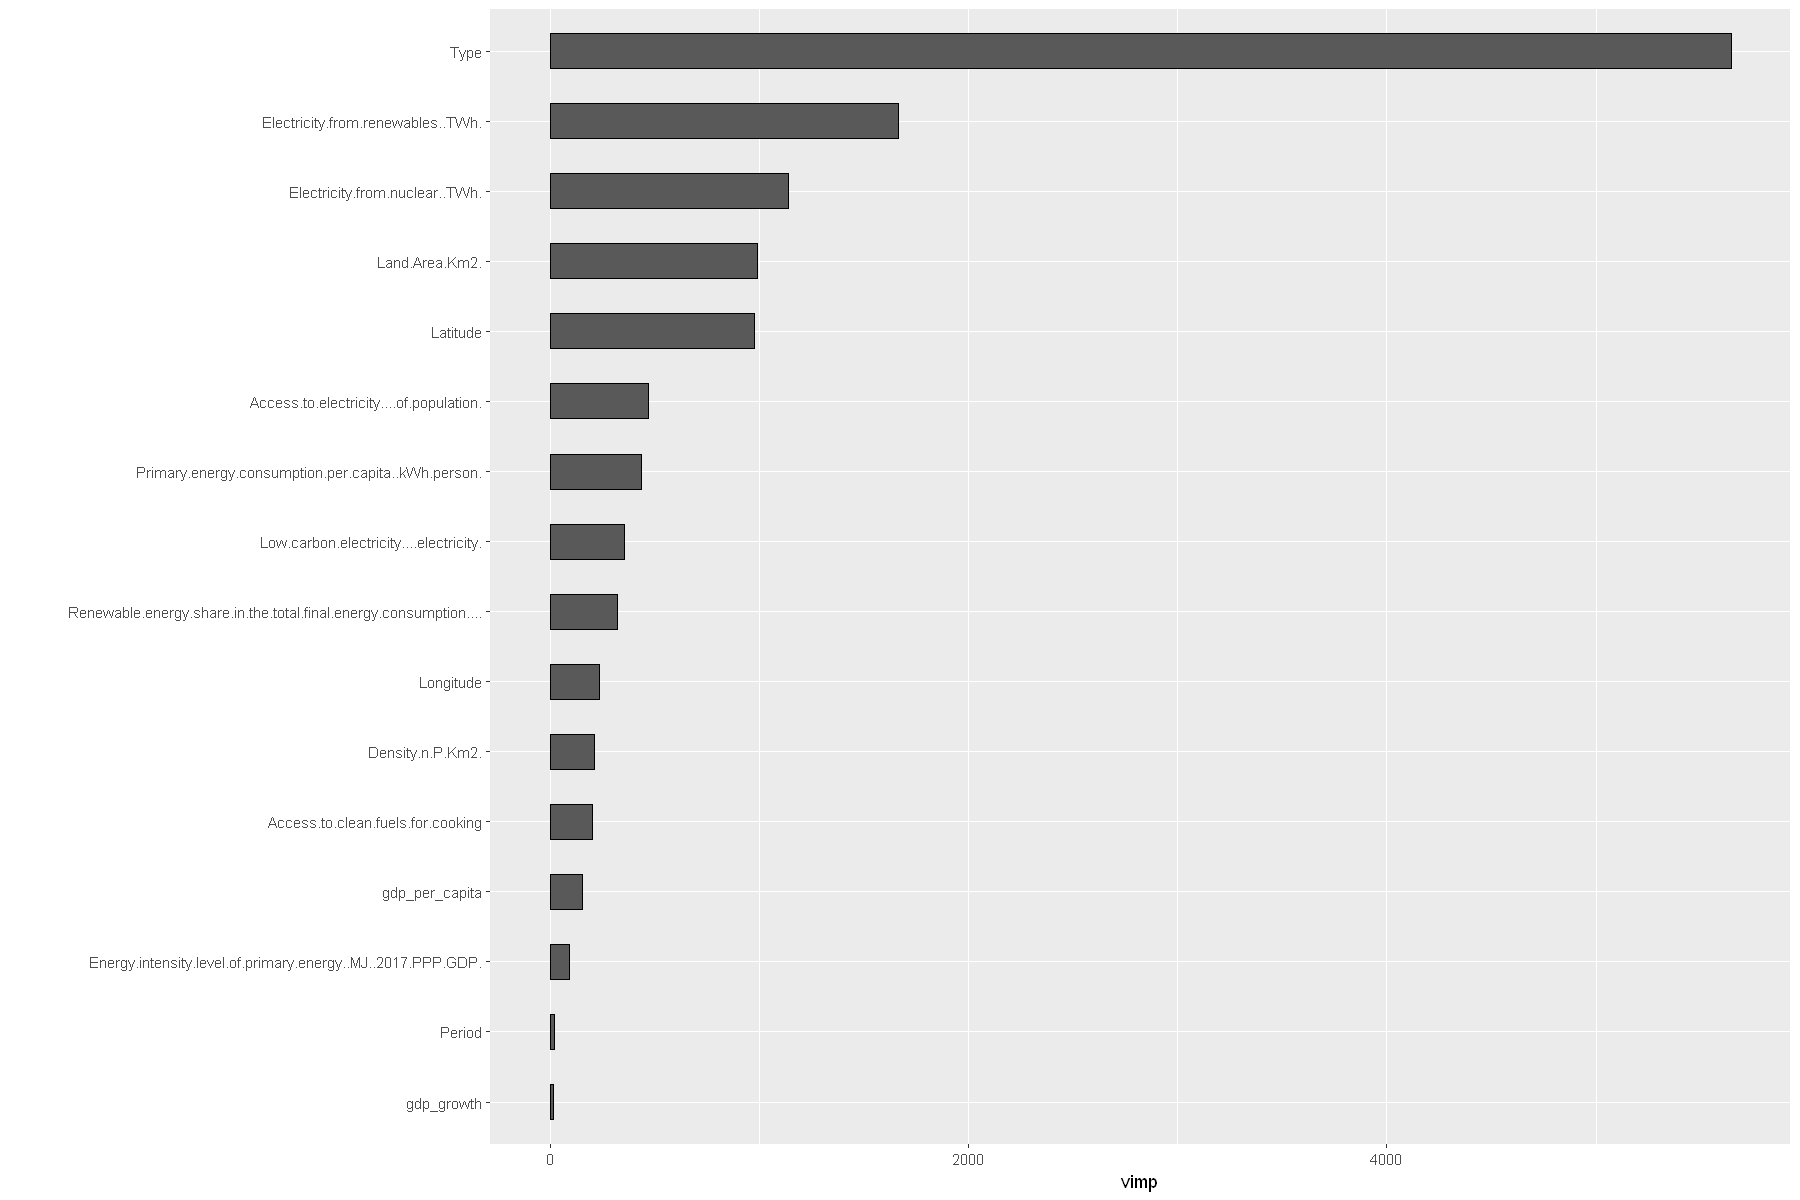

In [108]:
library(ggRandomForests)
plot(gg_vimp(rf.reg))

In [109]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.01412028

In [52]:
### conclusion : Random Forest mieux que toutes les méthodes précédemment implémentées, erreur : 0.014

In [16]:
install.packages("gbm")
library(gbm)

Installation du package dans ‘/home/apommier/R/libs’
(car ‘lib’ n'est pas spécifié)



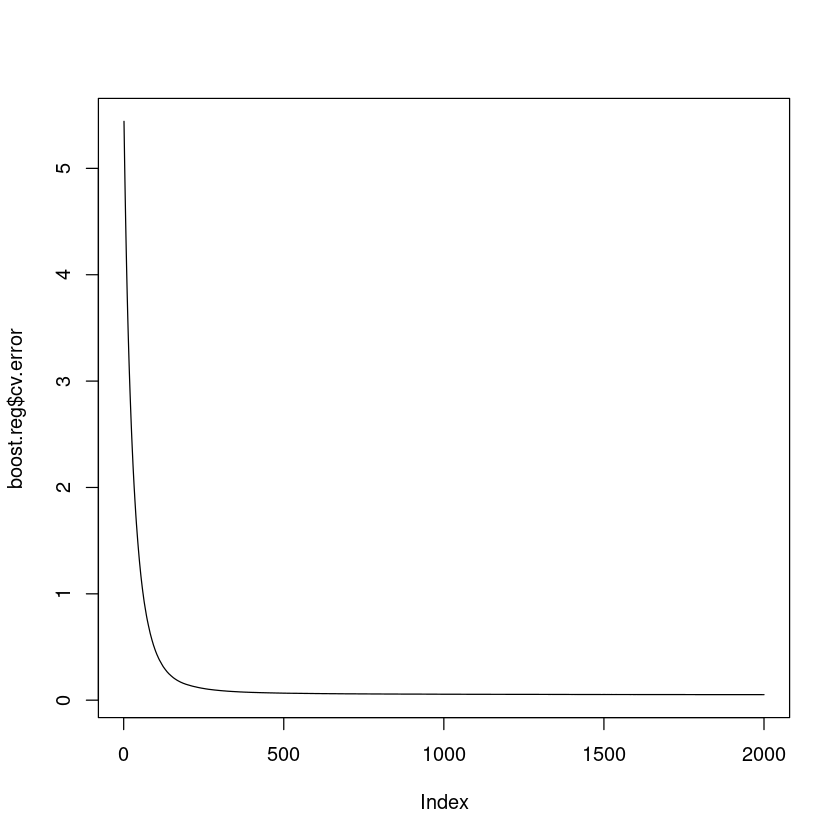

In [27]:
boost.reg = gbm(Value_co2_emissions_kt_by_country ~ . - Type - Period, data = datappr, distribution = "gaussian", n.trees = 2000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

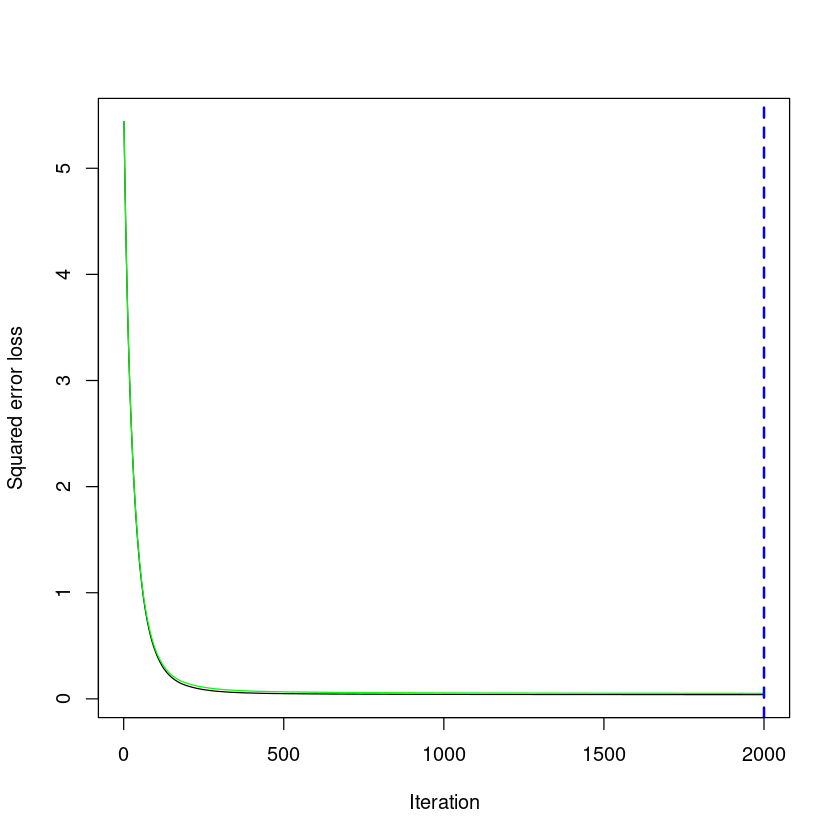

In [28]:
best.iter=gbm.perf(boost.reg,method="cv")

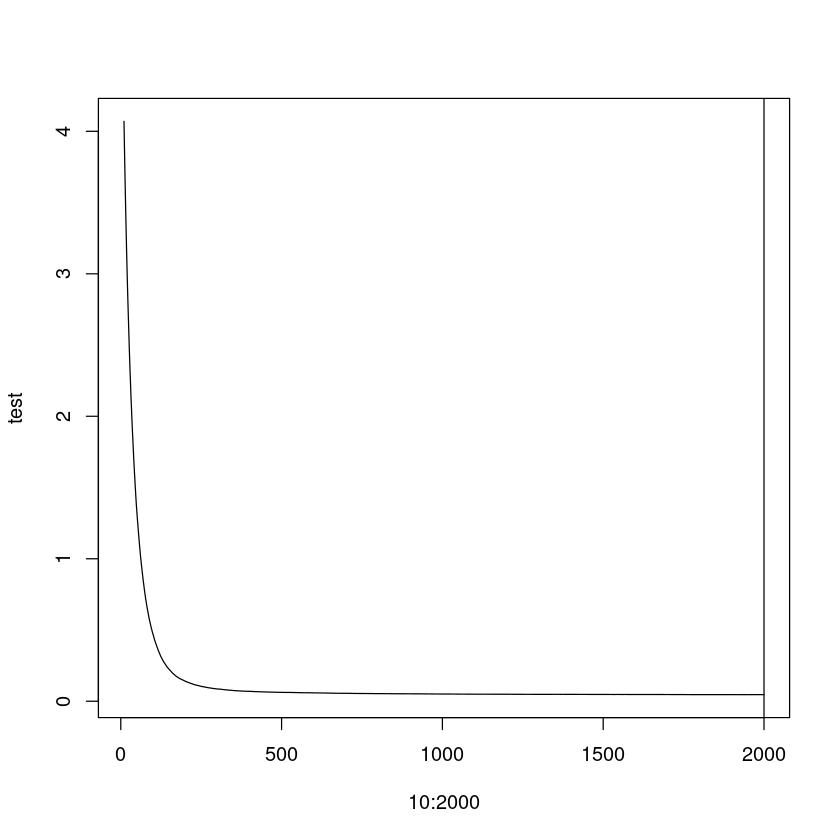

In [31]:
test=numeric()
for (i in 10:2000){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:2000,test,type="l")
abline(v=best.iter)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


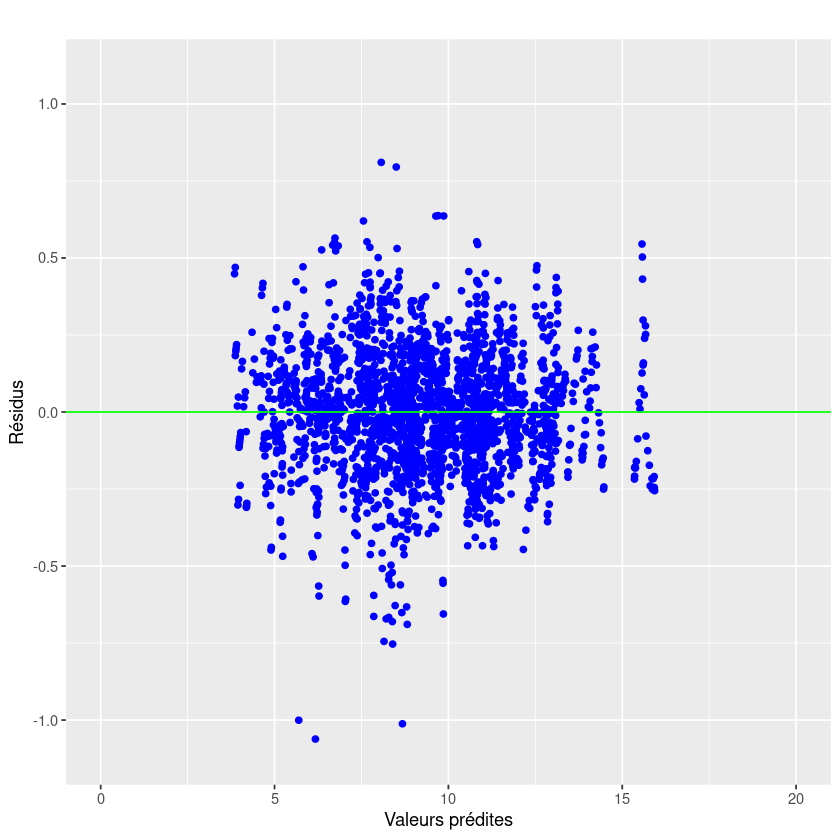

In [32]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.boostr,res.boostr,titre="")

In [33]:
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=best.iter)
# Erreur quadratique moyenne de prévision
sum((pred.boostr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.04612539

In [25]:
## moins bien que random forest, moins bien  que poly et radial tunned, mieux que ML tout de même

In [88]:
library(MASS)
library(nnet)


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:plotly':

    select


L'objet suivant est masqué depuis 'package:dplyr':

    select




In [15]:
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(Value_co2_emissions_kt_by_country~ . - Entity - Year,data=datappr,size=10,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:plotly':

    select


L'objet suivant est masqué depuis 'package:dplyr':

    select




# weights:  231
initial  value 192635.068894 
iter  10 value 8139.380777
iter  20 value 5493.289820
iter  30 value 3894.908132
iter  40 value 3181.120023
iter  50 value 2798.876920
iter  60 value 2191.054300
iter  70 value 1866.196014
iter  80 value 1627.053753
iter  90 value 1498.868828
iter 100 value 1360.454578
iter 110 value 1185.845146
iter 120 value 1093.720849
iter 130 value 989.051852
iter 140 value 854.710788
iter 150 value 752.362709
iter 160 value 620.303080
iter 170 value 556.755380
iter 180 value 495.624042
iter 190 value 449.684281
iter 200 value 403.345607
iter 210 value 364.382485
iter 220 value 333.548063
iter 230 value 318.473438
iter 240 value 305.113505
iter 250 value 286.999605
iter 260 value 276.026279
iter 270 value 266.292552
iter 280 value 259.511931
iter 290 value 253.519781
iter 300 value 248.315173
iter 310 value 242.439955
iter 320 value 236.777254
iter 330 value 232.698001
iter 340 value 229.483874
iter 350 value 226.733257
iter 360 value 222.565406
iter 3

a 21-10-1 network with 231 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -1.15   -0.06    0.16    0.03    0.23   -0.03    0.11    0.41   -0.08   -0.01 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.80    0.11    0.45    0.01    0.00   -1.10    0.11    0.19    0.02    0.41 
i20->h1 i21->h1 
   0.52    0.39 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -3.17    0.10    0.06   -0.02    0.02   -0.03   -0.03    0.07   -0.02    0.00 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.03    0.16    0.17    0.01    0.00   -0.83   -0.69    1.13    0.10    0.03 
i20->h2 i21->h2 
   0.16    0.31 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -0.16   -0.20    0.22   -0.13    0.40    0.12   -0.59    0.26   -0.20   -0.02 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15

size decay
3 3    1

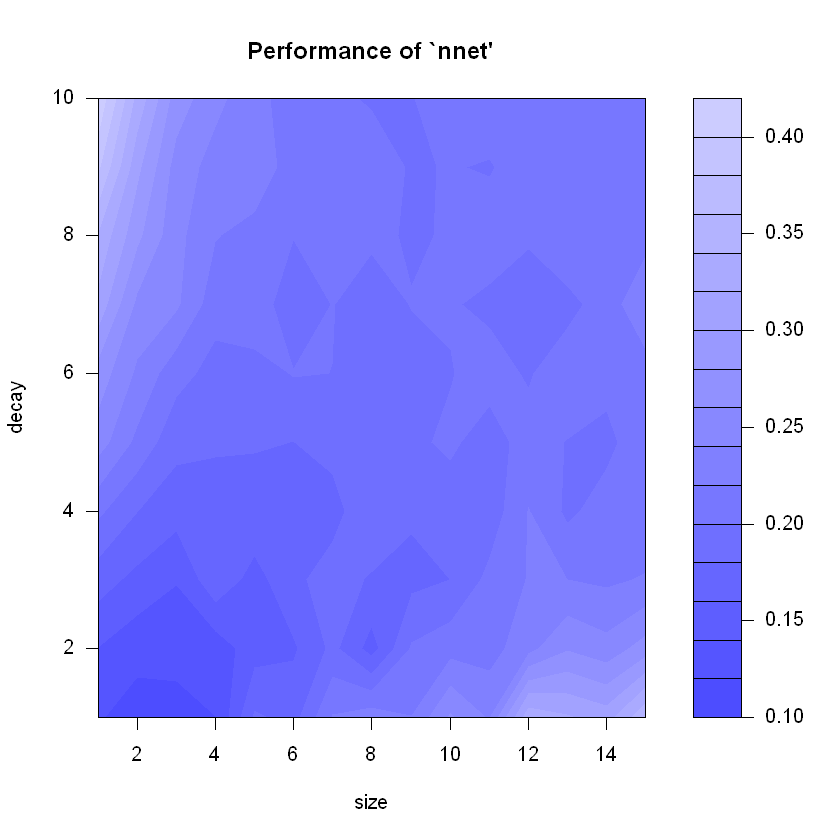

In [16]:
library(e1071)
neur.tune = tune.nnet(Value_co2_emissions_kt_by_country ~ . - Entity - Year,data=datappr,size=1:15,decay=1:10,maxit=200,linout=TRUE)
plot(neur.tune)
neur.tune$best.parameters

# weights:  70
initial  value 201952.045029 
iter  10 value 10406.499105
iter  20 value 8597.113106
iter  30 value 5632.484221
iter  40 value 4424.369083
iter  50 value 3990.502026
iter  60 value 3309.877463
iter  70 value 2461.218573
iter  80 value 2055.148007
iter  90 value 1656.122941
iter 100 value 1106.367350
iter 110 value 894.924883
iter 120 value 727.572026
iter 130 value 580.715562
iter 140 value 516.635496
iter 150 value 474.393695
iter 160 value 465.231575
iter 170 value 464.615088
iter 180 value 461.134526
iter 190 value 444.771960
iter 200 value 426.982187
iter 210 value 408.342881
iter 220 value 386.200960
iter 230 value 373.362653
iter 240 value 364.523817
iter 250 value 360.787708
iter 260 value 360.132778
iter 270 value 359.574533
iter 280 value 358.983873
iter 290 value 357.425939
iter 300 value 356.318471
iter 310 value 355.980391
iter 320 value 355.367558
iter 330 value 355.044199
iter 340 value 354.515447
iter 350 value 353.571496
iter 360 value 352.671629
iter 370

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


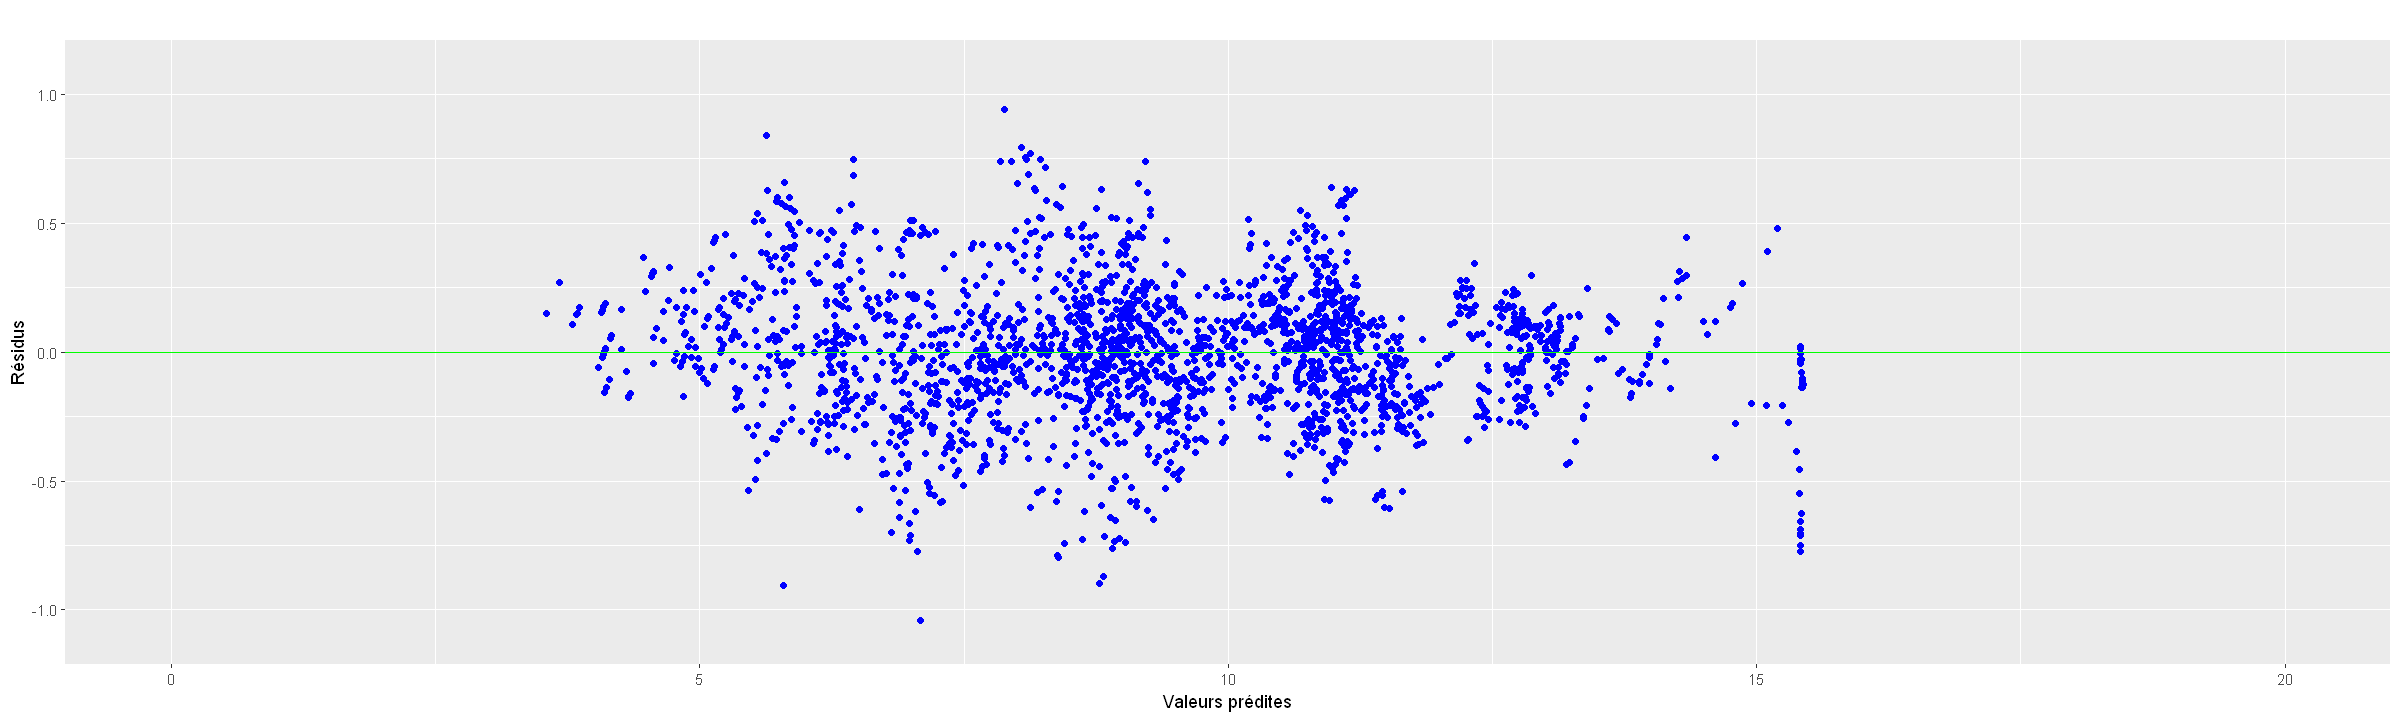

In [89]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country~ . - Entity - Year,data=datappr,size=3,decay=1,linout=TRUE,maxit=500)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.nnetr,res.nnetr,titre="")

In [90]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.0660743

Conclusion : 1er : random forest (0.014)
             2nd : svm poly et radial tunned (0.034)
             3ème : boosting : (0.046)
             4ème : rdN : (0.066)
             5ème : ML Lasso : (0.095)
             6ème : CART : (0.1)

In [ ]:
### complétion des données manquantes grâce à l'algo missforest

In [2]:
# Lecture des données
energy <- read.table("energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)
dim(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

[1] 3649   21

In [3]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", "", energy$Density.n.P.Km2.))

In [4]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- sqrt(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."])

In [5]:
library(forcats)
energy$Entity <- as.factor(energy$Entity)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 3649)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Entity <- energy$Entity
df_mean <- summarise(group_by(df, Entity), mean_value = mean(CO2, na.rm = TRUE))
CO2 <- df_mean$mean_value
Entity <- df_mean$Entity
df <- data.frame(Entity = Entity, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
intervals <- c(0, 8, 10, 12, 14, 16)
labels <- c("--", "-", "=", "+", "++")
df$u <- cut(df$CO2, breaks = intervals, labels = labels, include.lowest = TRUE)
# Créer un dataframe avec les correspondances entre les pays et les modalités
modalites <- data.frame(Entity = df$Entity, Type = df$u)
# Joindre les deux dataframes en fonction du nom du pays
energy <- merge(energy, modalites, by = "Entity", all.x = TRUE)
# Afficher les premières lignes du dataframe pour vérifier
energy$Period <- fct_collapse(energy$Year, "2000-2004" = c("2000","2001","2002","2003","2004"), "2005-2009" = c("2005","2006","2007","2008","2009"),
                            "2010-2014" = c("2010","2011","2012","2013","2014"), "2015-2020" = c("2015","2016","2017","2018","2019","2020"))
summary(energy)

                 Entity          Year     
 Afghanistan        :  21   2013   : 175  
 Albania            :  21   2014   : 175  
 Algeria            :  21   2015   : 175  
 Angola             :  21   2016   : 175  
 Antigua and Barbuda:  21   2017   : 175  
 Argentina          :  21   2018   : 175  
 (Other)            :3523   (Other):2599  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   : 1.119                          Min.   : 0.000                   
 1st Qu.: 7.733                          1st Qu.: 4.814                   
 Median : 9.918                          Median : 9.119                   
 Mean   : 8.619                          Mean   : 7.244                   
 3rd Qu.:10.000                          3rd Qu.:10.000                   
 Max.   :10.000                          Max.   :10.000                   
 NA's   :10                              NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 M

In [6]:
energy$Type <- factor(energy$Type, levels = c("=","--","-","+","++"))
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
energy <- subset(energy, select = -Year)
energy <- subset(energy, select = -Entity)
str(energy)

'data.frame':	3649 obs. of  18 variables:
 $ Access.to.electricity....of.population.                         : num  1.27 2.02 3.07 3.84 4.48 ...
 $ Access.to.clean.fuels.for.cooking                               : num  2.49 2.68 2.86 3.08 3.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.71 6.75 6.15 6.05 6.65 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.4 0.3 0.361 0.557 0.574 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.557 0.707 0.748 0.794 0.748 ...
 $ Low.carbon.electricity....electricity.                          : num  8.12 9.21 9.01 8.19 7.93 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  17.4 15.4 14.5 15.2 14.3 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_c

In [7]:
missing_data <- colMeans(is.na(energy)) * 100

# Trier les résultats par ordre décroissant
sorted_missing_data <- sort(missing_data, decreasing = TRUE)

# Afficher les résultats de manière propre
cat("Pourcentage de données manquantes par variable (ordre décroissant):\n")
for (i in seq_along(sorted_missing_data)) {
  cat(names(sorted_missing_data)[i], ": ", sprintf("%.2f", sorted_missing_data[i]), "%\n")
}
head(energy)

Pourcentage de données manquantes par variable (ordre décroissant):
Value_co2_emissions_kt_by_country :  11.73 %
gdp_growth :  8.69 %
gdp_per_capita :  7.73 %
Type :  6.93 %
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. :  5.67 %
Renewable.energy.share.in.the.total.final.energy.consumption.... :  5.32 %
Access.to.clean.fuels.for.cooking :  4.63 %
Electricity.from.nuclear..TWh. :  3.45 %
Low.carbon.electricity....electricity. :  1.15 %
Electricity.from.fossil.fuels..TWh. :  0.58 %
Electricity.from.renewables..TWh. :  0.58 %
Access.to.electricity....of.population. :  0.27 %
Density.n.P.Km2. :  0.03 %
Land.Area.Km2. :  0.03 %
Latitude :  0.03 %
Longitude :  0.03 %
Primary.energy.consumption.per.capita..kWh.person. :  0.00 %
Period :  0.00 %


Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
1 1.270272                                2.489980                         
2 2.018557                                2.683282                         
3 3.067435                                2.863564                         
4 3.839076                                3.082207                         
5 4.479394                                3.301515                         
6 5.038938                                3.492850                         
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 6.707459                                                        
2 6.752777                                                        
3 6.150610                                                        
4 6.054750                                                        
5 6.651316                                                        
6 5.820653                                                        
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.4000000                           0                             
2 0.3000000                           0                             
3 0.3605551                           0                             
4 0.5567764                           0                             
5 0.5744563                           0                             
6 0.5830952                           0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.5567764                         8.121419                              
2 0.7071068                         9.205746                              
3 0.7483315                         9.008853                              
4 0.7937254                         8.186653                              
5 0.7483315                         7.932298                              
6 0.7681146                         7.964977                              
  Primary.energy.consumption.per.capita..kWh.person.
1 17.39525                                          
2 15.39129                                          
3 14.52109                                          
4 15.16470                                          
5 14.29095                                          
6 15.87668                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1 6.633318                                 NA        NA       4.094345        
2 6.593045                                 NA        NA       4.094345        
3 6.937314                                 NA  5.189766       4.094345        
4 7.106606                           8.832278  5.250617       4.094345        
5 6.937314                           1.414118  5.353667       4.094345        
6 7.346010                          11.229715  5.489067       4.094345        
  Land.Area.Km2. Latitude Longitude Type Period   
1 13.38815       33.93911 67.70995  -    2000-2004
2 13.38815       33.93911 67.70995  -    2000-2004
3 13.38815       33.93911 67.70995  -    2000-2004
4 13.38815       33.93911 67.70995  -    2000-2004
5 13.38815       33.93911 67.70995  -    2000-2004
6 13.38815       33.93911 67.70995  -    2005-2009

Le chargement a nécessité le package : colorspace


Attachement du package : 'colorspace'


L'objet suivant est masqué depuis 'package:pROC':

    coords


Le chargement a nécessité le package : grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attachement du package : 'VIM'


L'objet suivant est masqué depuis 'package:datasets':

    sleep





 Variables sorted by number of missings: 
                                                         Variable        Count
                                Value_co2_emissions_kt_by_country 0.1172924089
                                                       gdp_growth 0.0868731159
                                                   gdp_per_capita 0.0772814470
                                                             Type 0.0693340641
      Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 0.0567278706
 Renewable.energy.share.in.the.total.final.energy.consumption.... 0.0531652508
                                Access.to.clean.fuels.for.cooking 0.0463140586
                                   Electricity.from.nuclear..TWh. 0.0345300082
                           Low.carbon.electricity....electricity. 0.0115100027
                              Electricity.from.fossil.fuels..TWh. 0.0057550014
                                Electricity.from.renewables..TWh. 0.0057550014
         

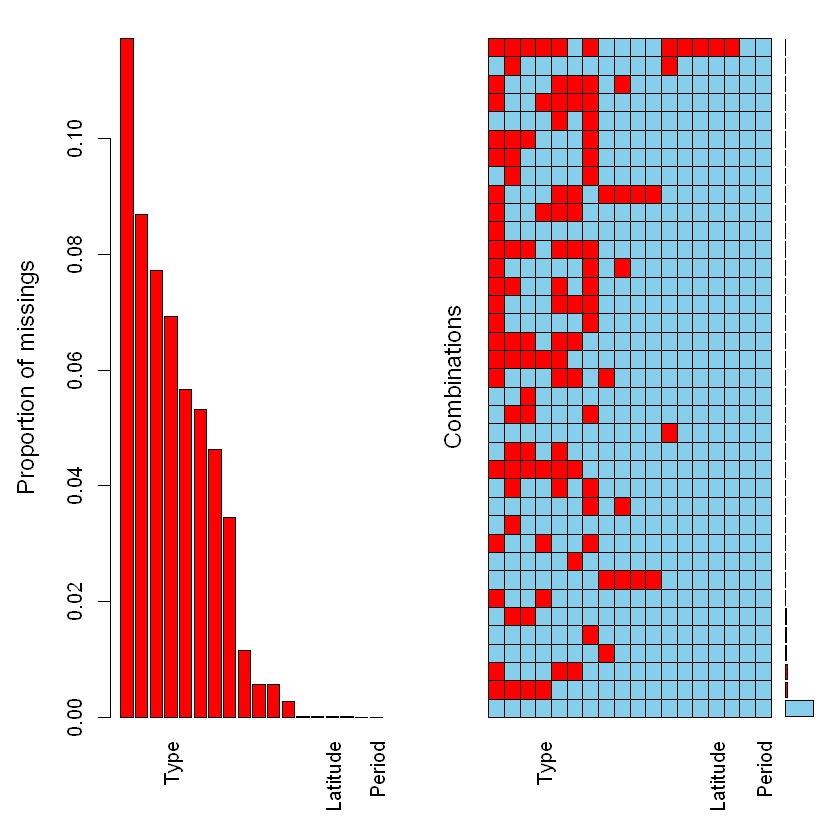

In [8]:
library(VIM)
res<-summary(aggr(energy, sortVar=TRUE))$combinations

In [9]:
library(missForest)


Attachement du package : 'missForest'


L'objet suivant est masqué depuis 'package:VIM':

    nrmse




In [10]:
energyImp=missForest(energy)

In [11]:
energyImp <- energyImp$ximp
class(energyImp)
summary(energyImp)
str(energyImp)

[1] "data.frame"

 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   : 1.119                          Min.   : 0.000                   
 1st Qu.: 7.690                          1st Qu.: 5.089                   
 Median : 9.913                          Median : 9.230                   
 Mean   : 8.604                          Mean   : 7.351                   
 3rd Qu.:10.000                          3rd Qu.:10.000                   
 Max.   :10.000                          Max.   :10.000                   
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   :0.000                                                   
 1st Qu.:2.588                                                   
 Median :4.882                                                   
 Mean   :4.922                                                   
 3rd Qu.:7.390                                                   
 Max.   :9.800                                                   
 Electricity.

'data.frame':	3649 obs. of  18 variables:
 $ Access.to.electricity....of.population.                         : num  1.27 2.02 3.07 3.84 4.48 ...
 $ Access.to.clean.fuels.for.cooking                               : num  2.49 2.68 2.86 3.08 3.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.71 6.75 6.15 6.05 6.65 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.4 0.3 0.361 0.557 0.574 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.557 0.707 0.748 0.794 0.748 ...
 $ Low.carbon.electricity....electricity.                          : num  8.12 9.21 9.01 8.19 7.93 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  17.4 15.4 14.5 15.2 14.3 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_c

In [12]:
any_miss <- any(is.na(energyImp))
any_miss
sum(is.na(energyImp) == TRUE)

[1] FALSE

[1] 0

In [13]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(energyImp) # nombre de lignes
nvar <- ncol(energyImp) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 
### pour CO2 emissions
datappr <- energyImp[appri, -c(4)] 
# construction de l'échantillon test
datestr <- energyImp[testi, -c(4)] 
# vérification
str(datappr)
str(datestr)

'data.frame':	2919 obs. of  17 variables:
 $ Access.to.electricity....of.population.                         : num  1.27 2.02 3.07 4.48 5.04 ...
 $ Access.to.clean.fuels.for.cooking                               : num  2.49 2.68 2.86 3.3 3.49 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.71 6.75 6.15 6.65 5.82 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.557 0.707 0.748 0.748 0.768 ...
 $ Low.carbon.electricity....electricity.                          : num  8.12 9.21 9.01 7.93 7.96 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  17.4 15.4 14.5 14.3 15.9 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.2 1.41 1.5 1.53 1.94 2.46 3.23 ...
 $ Value_co2_emissions_kt_by_country                               : num  6.63 6.59 6.94 6.94 7.35 ...
 $ gdp_gro

In [14]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 20)+ylim(-1.1, 1.1)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [14]:
library(e1071)

In [15]:
svm.reg.poly.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Type - Period, type = "eps-regression", data = datappr, kernel = "poly", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5), coef0 = -5:5, gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0 cost
  0.04     5    3

- best performance: 0.03832001 

- Detailed performance results:
    gamma coef0 cost        error   dispersion
1    0.02    -5  1.0 2.129996e+05 3.926332e+04
2    0.04    -5  1.0 3.342936e+06 5.571769e+05
3    0.06    -5  1.0 2.253488e+07 1.238262e+07
4    0.08    -5  1.0 6.040102e+07 1.145786e+07
5    0.10    -5  1.0 1.532877e+08 2.992280e+07
6    0.02    -4  1.0 1.625173e+05 8.605268e+04
7    0.04    -4  1.0 2.620796e+06 1.464703e+06
8    0.06    -4  1.0 1.448654e+07 8.721145e+06
9    0.08    -4  1.0 4.021899e+07 7.792393e+06
10   0.10    -4  1.0 1.023312e+08 1.960504e+07
11   0.02    -3  1.0 7.484060e+04 1.272994e+04
12   0.04    -3  1.0 1.553504e+06 9.434141e+05
13   0.06    -3  1.0 7.111074e+06 1.398886e+06
14   0.08    -3  1.0 2.376561e+07 4.527901e+06
15   0.10    -3  1.0 7.003838e+07 3.854508e+07
16   0.02    -2  1.0 4.142977e+04 2.141078e+04
17   

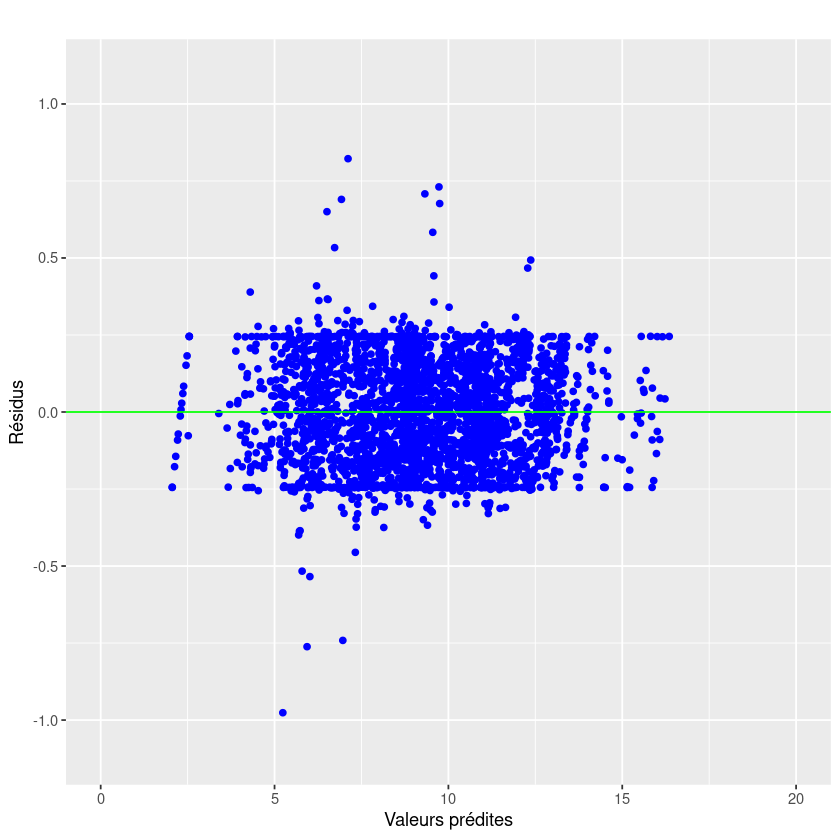

In [16]:
fit.svmr=svm.reg.poly.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [17]:
pred.svmr.poly.tune = predict(svm.reg.poly.tune$best.model, newdata = datestr)
paste("Tuned polynomial kernel:",sum((pred.svmr.poly.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")

[1] "Tuned polynomial kernel: 0.0464030460556976"

In [65]:
library(randomForest)

In [66]:
rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datappr,xtest=datestr[,-9],ytest=datestr[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01723     0.29 |  0.01458     0.24 |
 100 |  0.01511     0.25 |  0.01337     0.22 |
 150 |  0.01472     0.25 |  0.01325     0.22 |
 200 |  0.01394     0.23 |  0.01311     0.22 |
 250 |  0.01362     0.23 |  0.01307     0.22 |
 300 |  0.01345     0.22 |  0.01308     0.22 |
 350 |  0.01324     0.22 |  0.01302     0.22 |
 400 |    0.013     0.22 |  0.01296     0.22 |
 450 |  0.01301     0.22 |  0.01287     0.22 |
 500 |  0.01293     0.22 |  0.01283     0.21 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


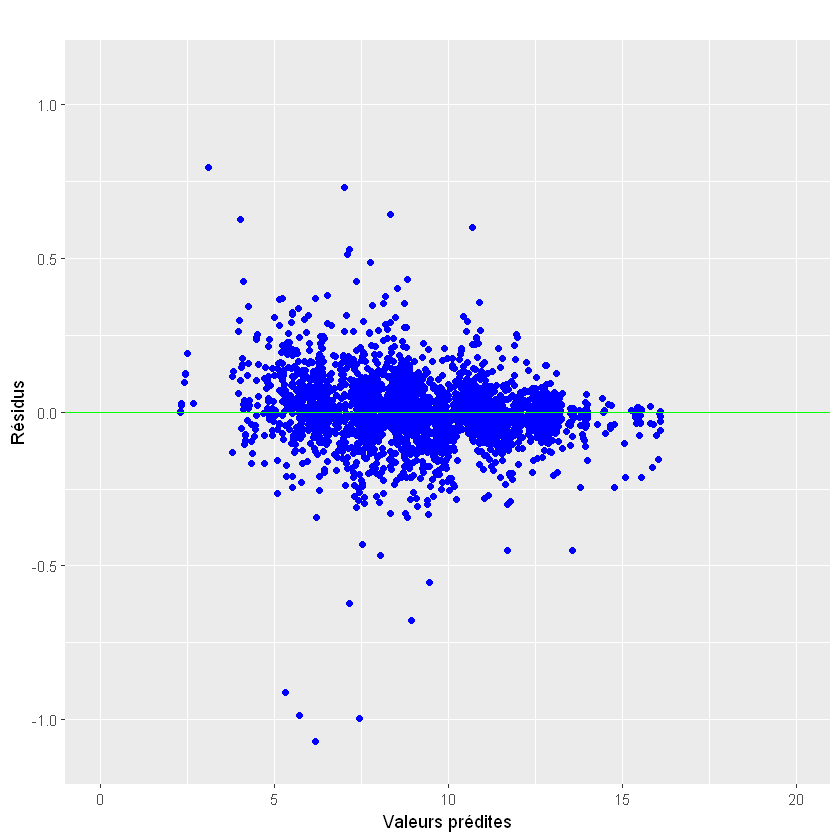

In [67]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.rfr,res.rfr,titre="")

Type 
                                                           49.82 
                                                          Period 
                                                           39.19 
                                                Density.n.P.Km2. 
                                                           37.22 
                                                       Longitude 
                                                           31.17 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                           30.03 
                                                  Land.Area.Km2. 
                                                           28.51 
                          Low.carbon.electricity....electricity. 
                                                           25.56 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                           24.79 
                                                        Latitude 
                                                           24.24 
                               Electricity.from.renewables..TWh. 
                                                           23.44 
                                                  gdp_per_capita 
                                                           20.23 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                           19.53 
                                  Electricity.from.nuclear..TWh. 
                                                           16.84 
                               Access.to.clean.fuels.for.cooking 
                                                           15.92 
                         Access.to.electricity....of.population. 
                                                           13.36 
                                                      gdp_growth 
                                                           11.50

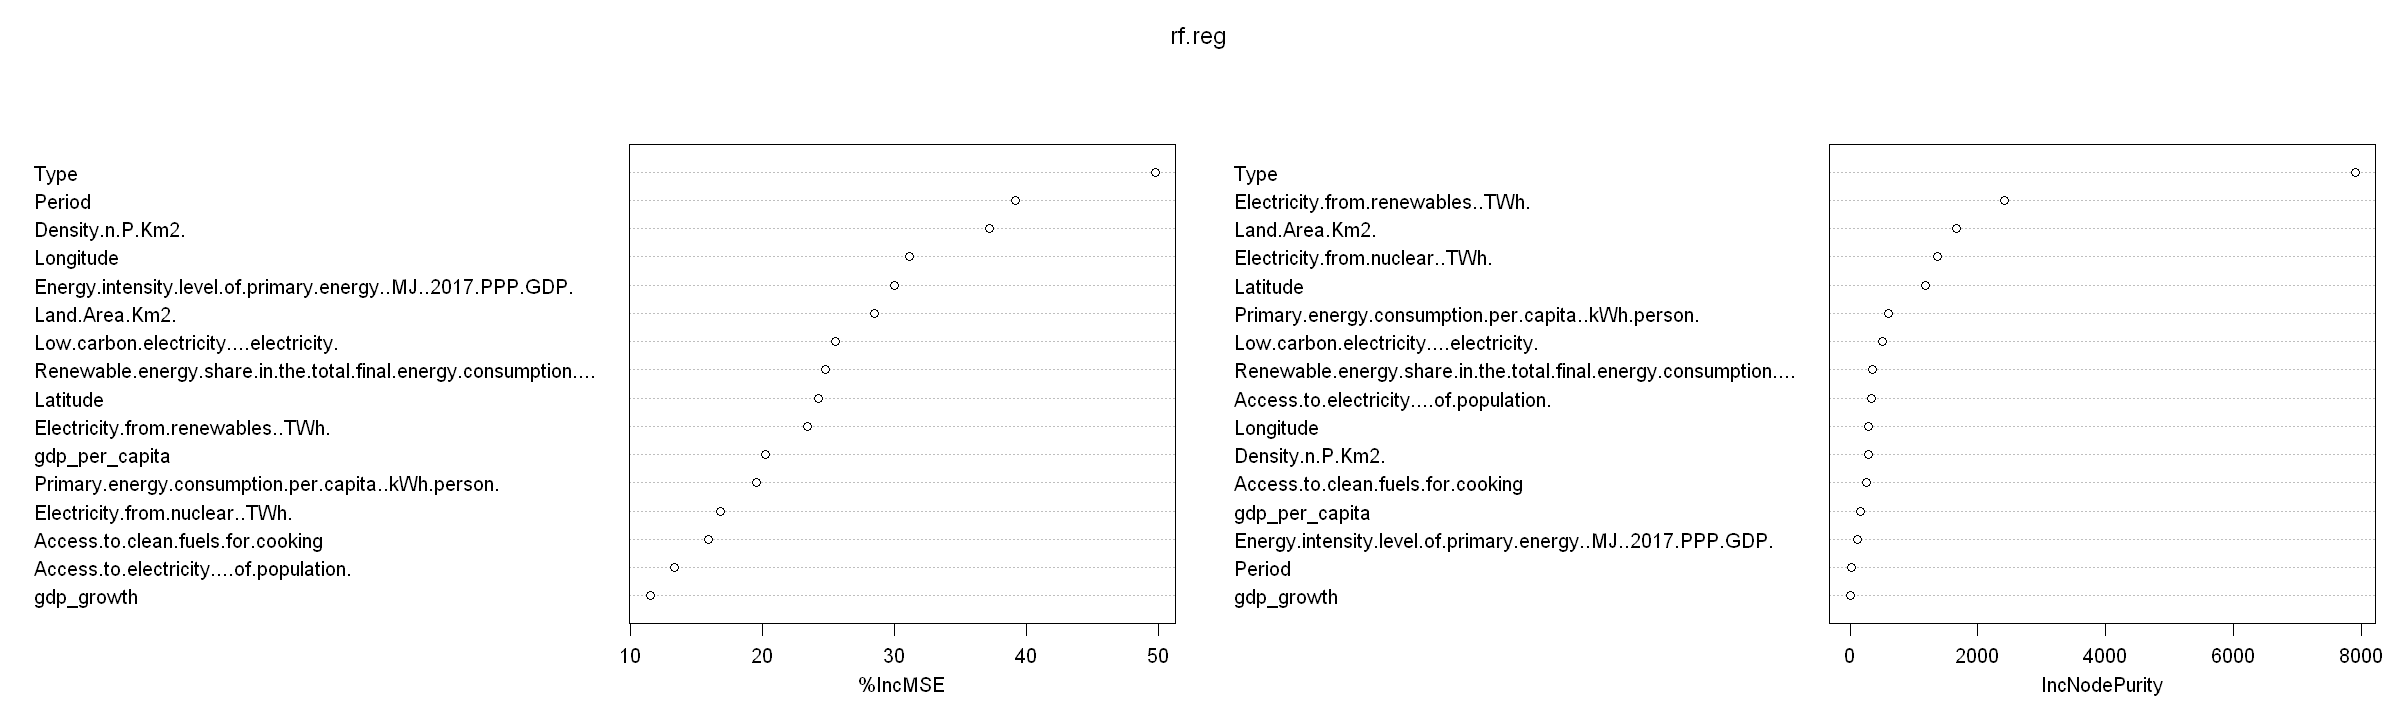

In [70]:
options(repr.plot.width = 20, repr.plot.height = 6)
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg)

Le chargement a nécessité le package : randomForestSRC


 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attachement du package : 'randomForestSRC'


L'objet suivant est masqué depuis 'package:purrr':

    partial




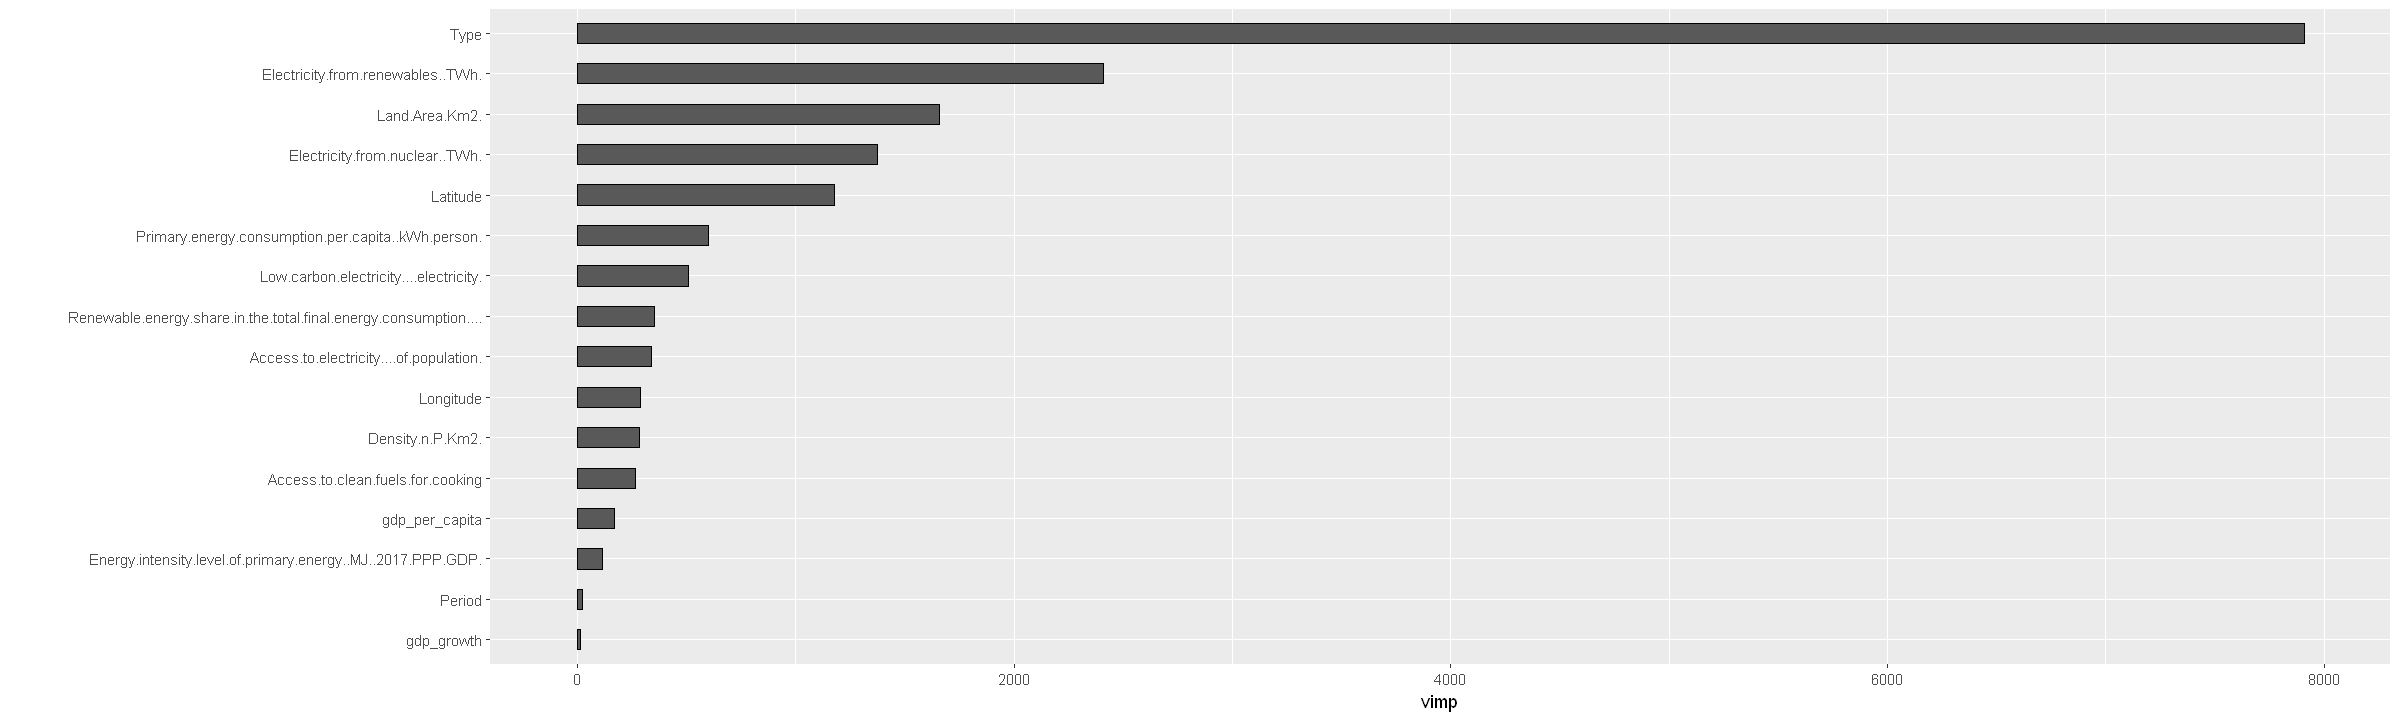

In [71]:
library(ggRandomForests)
plot(gg_vimp(rf.reg))

In [72]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.01283004

In [73]:
## encore de meilleures prédictions lors de complétion des données manquantes

In [15]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(Value_co2_emissions_kt_by_country ~ . ,data=datappr,size=10,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:plotly':

    select


L'objet suivant est masqué depuis 'package:dplyr':

    select




# weights:  231
initial  value 248066.477119 
iter  10 value 16276.279607
iter  20 value 13774.465597
iter  30 value 13414.237187
iter  40 value 13206.175957
iter  50 value 12974.311173
iter  60 value 12357.463384
iter  70 value 9185.517863
iter  80 value 7284.391669
iter  90 value 6232.992734
iter 100 value 5684.615897
iter 110 value 5327.801301
iter 120 value 5134.270859
iter 130 value 4657.597016
iter 140 value 4301.654160
iter 150 value 3763.377675
iter 160 value 3548.861811
iter 170 value 3266.705345
iter 180 value 2835.371167
iter 190 value 2632.609076
iter 200 value 2283.460783
iter 210 value 2141.671211
iter 220 value 1955.760992
iter 230 value 1794.085815
iter 240 value 1673.123166
iter 250 value 1460.139228
iter 260 value 1283.291530
iter 270 value 1151.753666
iter 280 value 980.807771
iter 290 value 887.415218
iter 300 value 781.103726
iter 310 value 677.281526
iter 320 value 562.298858
iter 330 value 503.426763
iter 340 value 455.645000
iter 350 value 407.072170
iter 360 va

a 21-10-1 network with 231 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.44    0.05   -0.07   -0.26   -0.38    0.20   -0.64   -0.04    0.06    0.01 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.27    0.45    0.08   -0.08    0.01   -0.03    0.15   -0.28   -0.05   -0.06 
i20->h1 i21->h1 
  -0.29   -0.32 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.15    0.21   -0.58   -0.39   -0.56   -0.24    0.46    0.03    0.16   -0.02 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.21   -0.22    0.14    0.07   -0.05    0.45   -0.91    1.04   -0.19    0.01 
i20->h2 i21->h2 
  -0.21   -0.27 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.03   -0.24    0.11   -0.19   -0.42   -0.41    0.26    0.11    0.08   -0.14 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15

In [ ]:
library(e1071)
neur.tune = tune.nnet(Value_co2_emissions_kt_by_country ~ . ,data=datappr,size=1:5,decay=1:3,maxit=200,linout=TRUE)
plot(neur.tune)
neur.tune$best.parameters

In [ ]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country~ .,data=datappr,size=10,decay=4,linout=TRUE,maxit=500)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.nnetr,res.nnetr,titre="")

In [ ]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)